In [26]:
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [27]:
# load the data
rank_data: dict[str, pd.DataFrame] = {}

root_folder = Path("./") if Path("./rank_samples").exists() else Path("/project")
for file in root_folder.glob("rank_samples/*.csv"):
    rank_data[file.stem] = pd.read_csv(file)

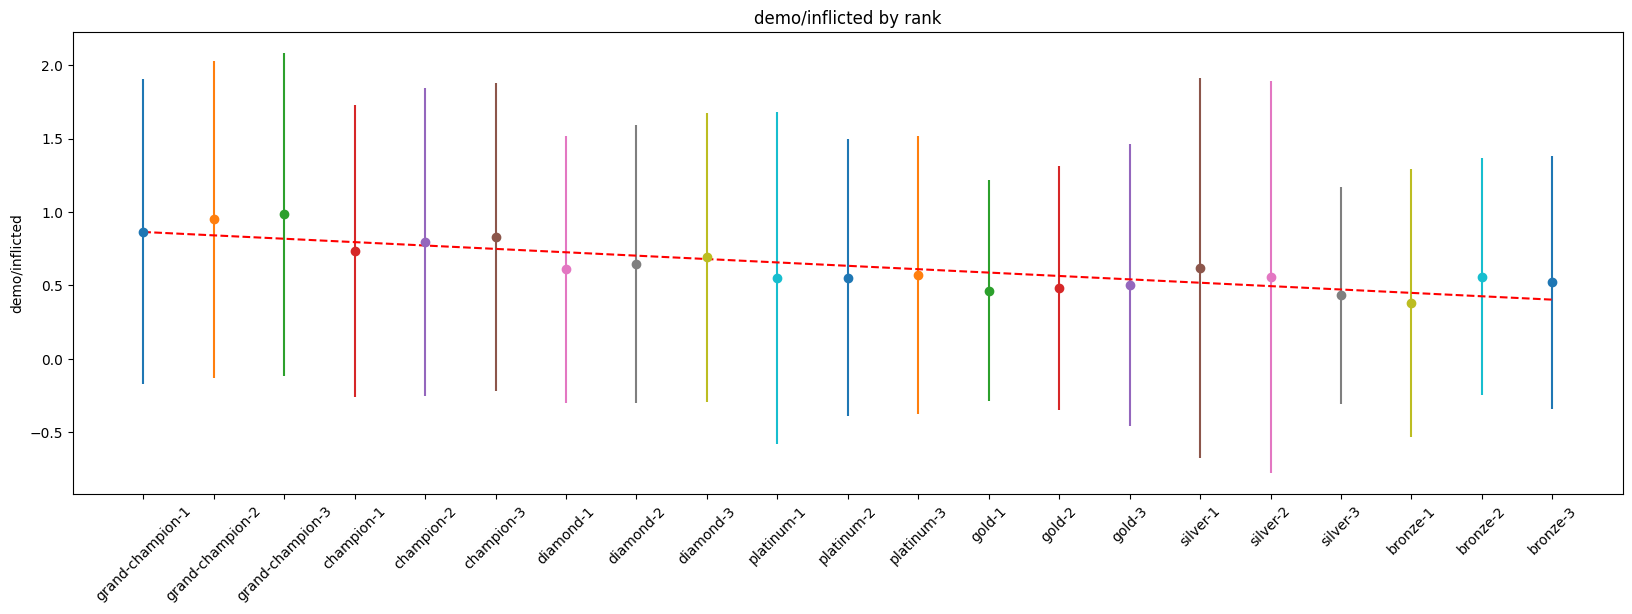

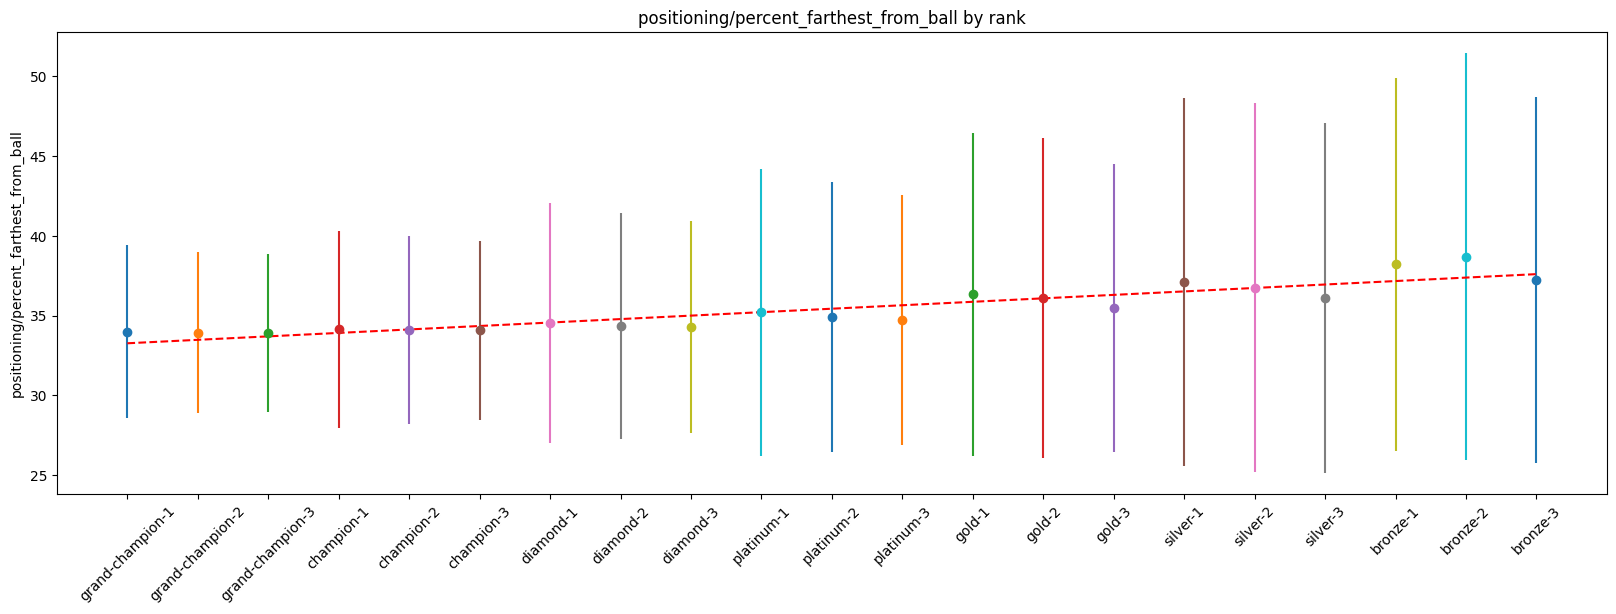

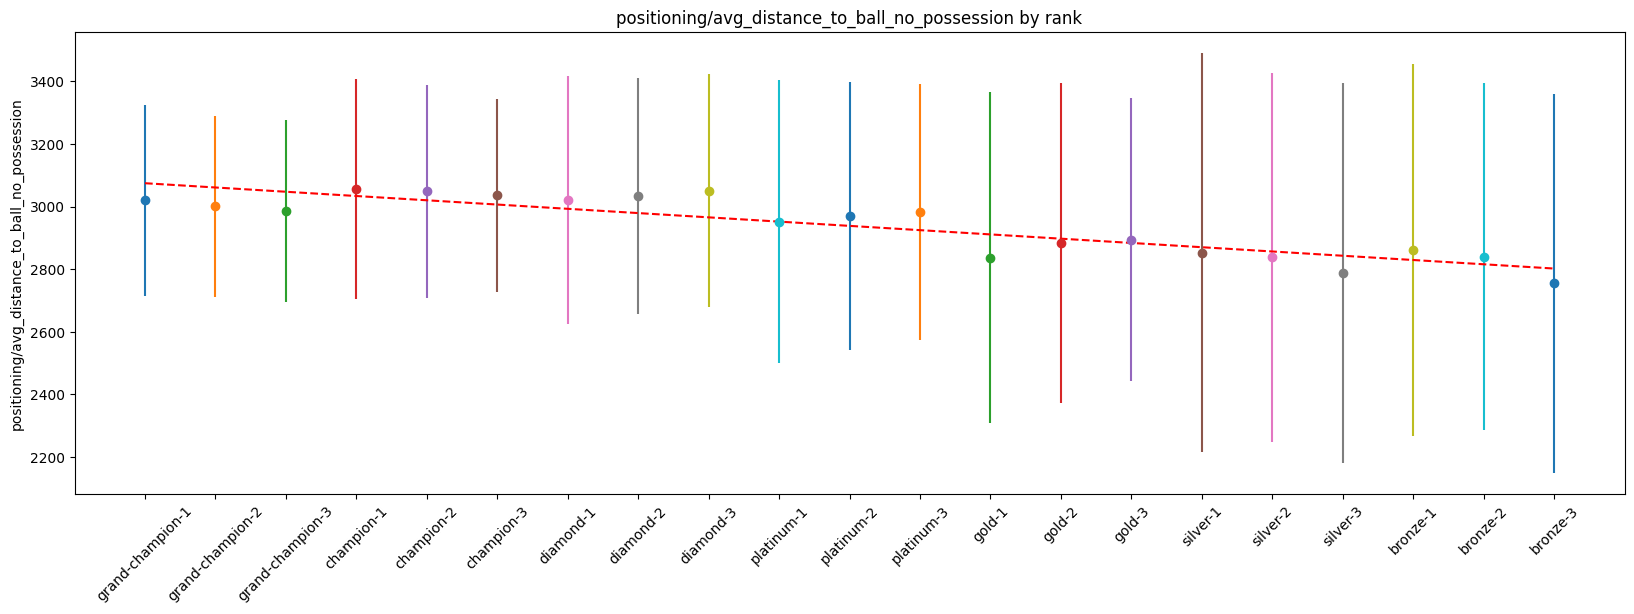

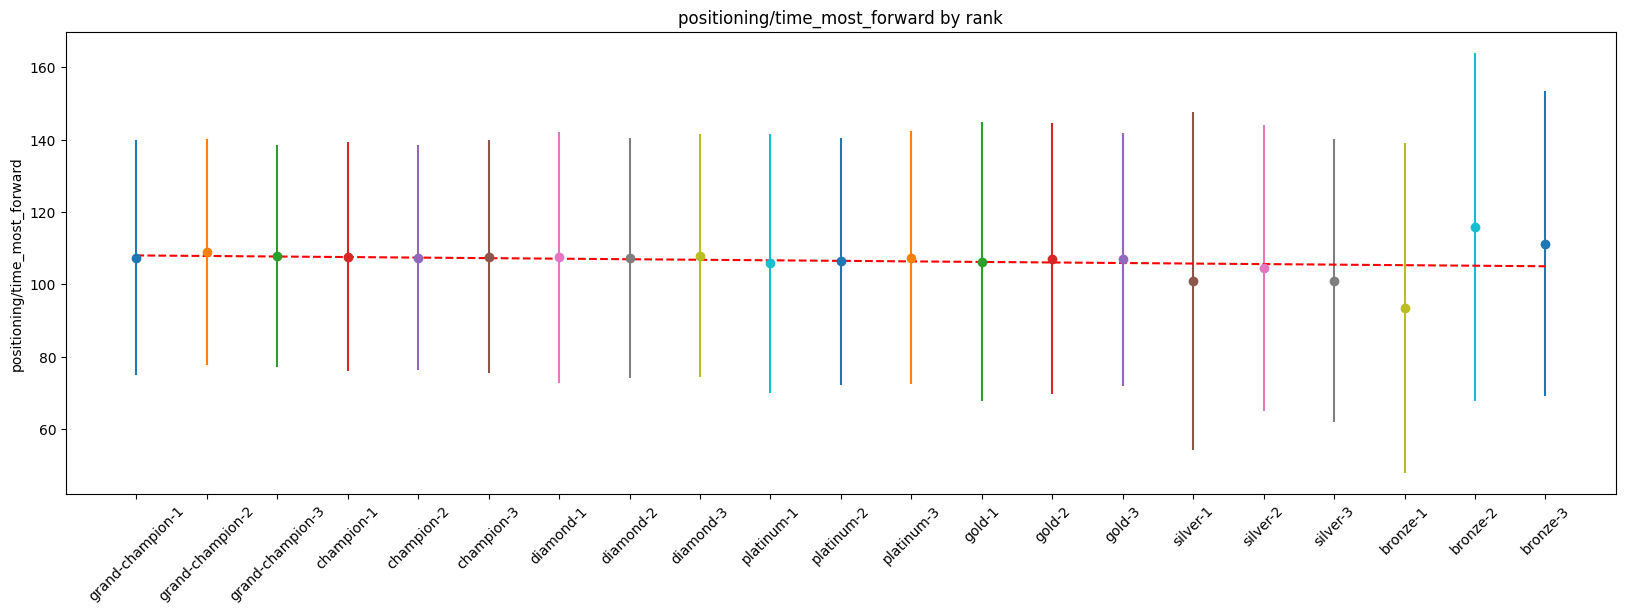

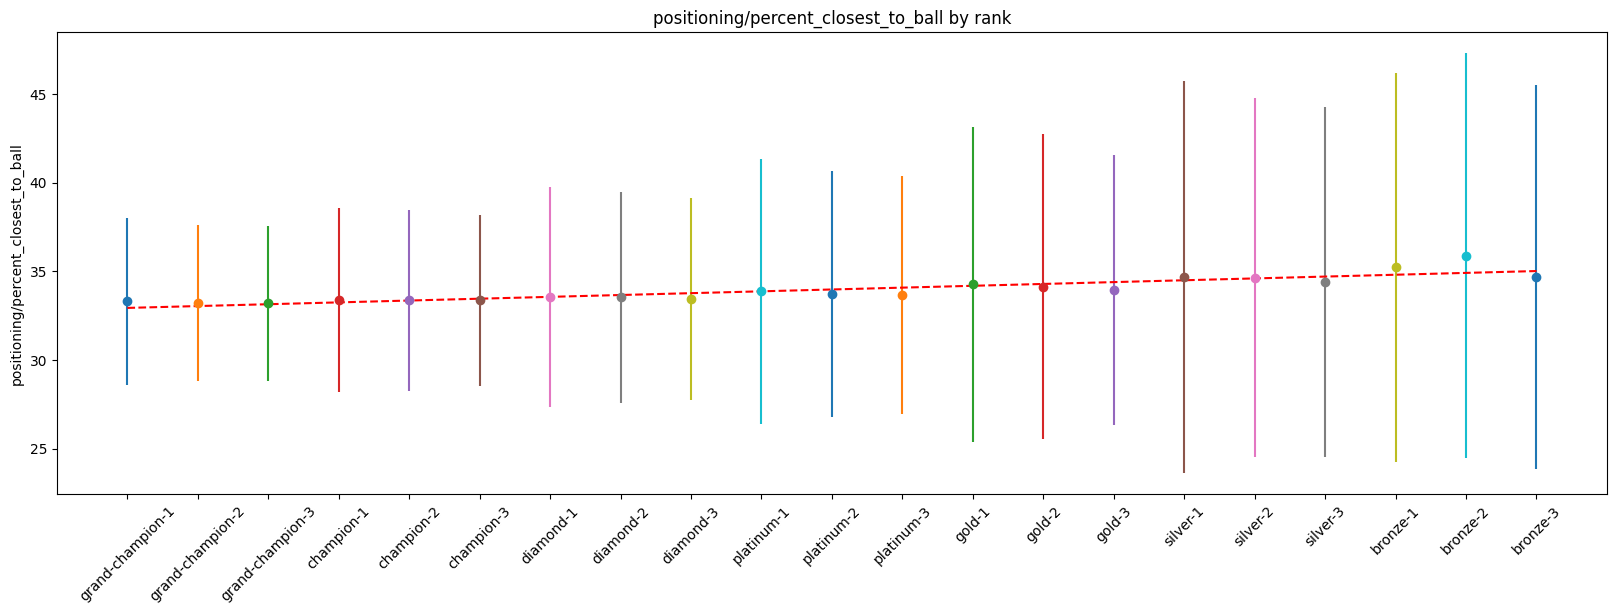

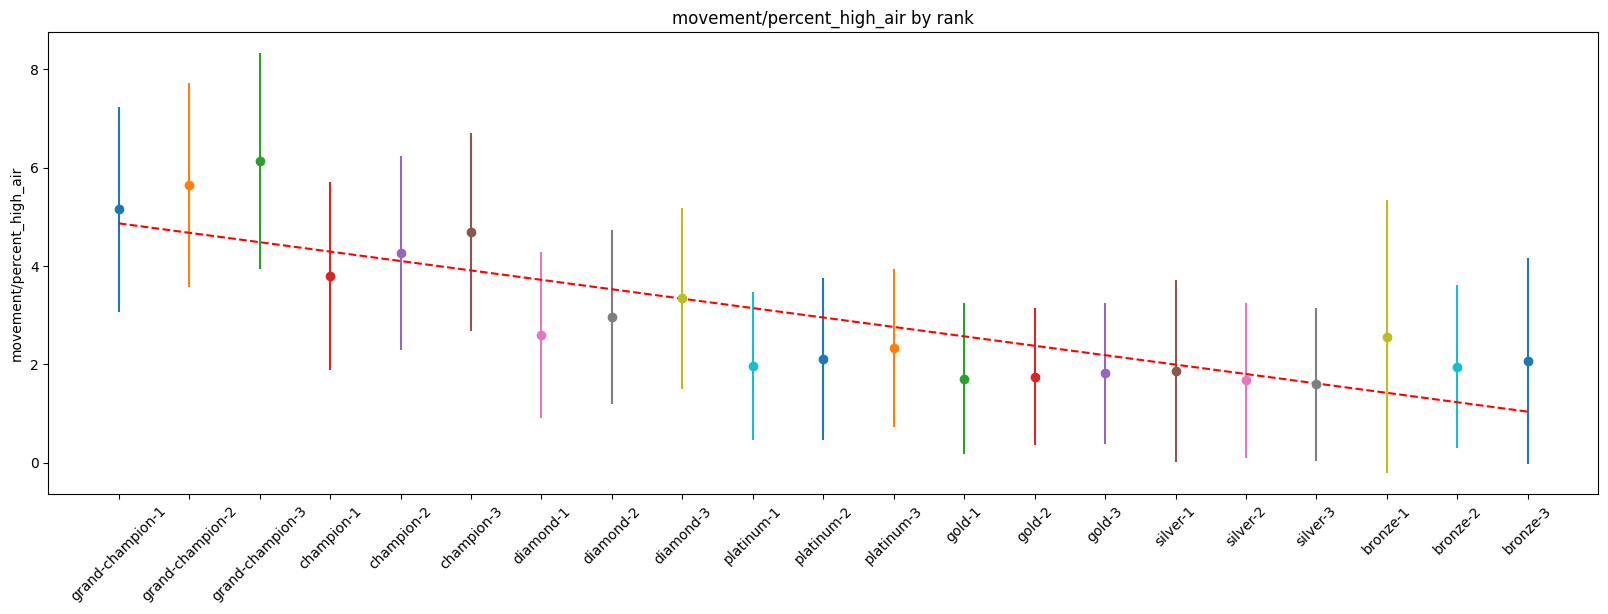

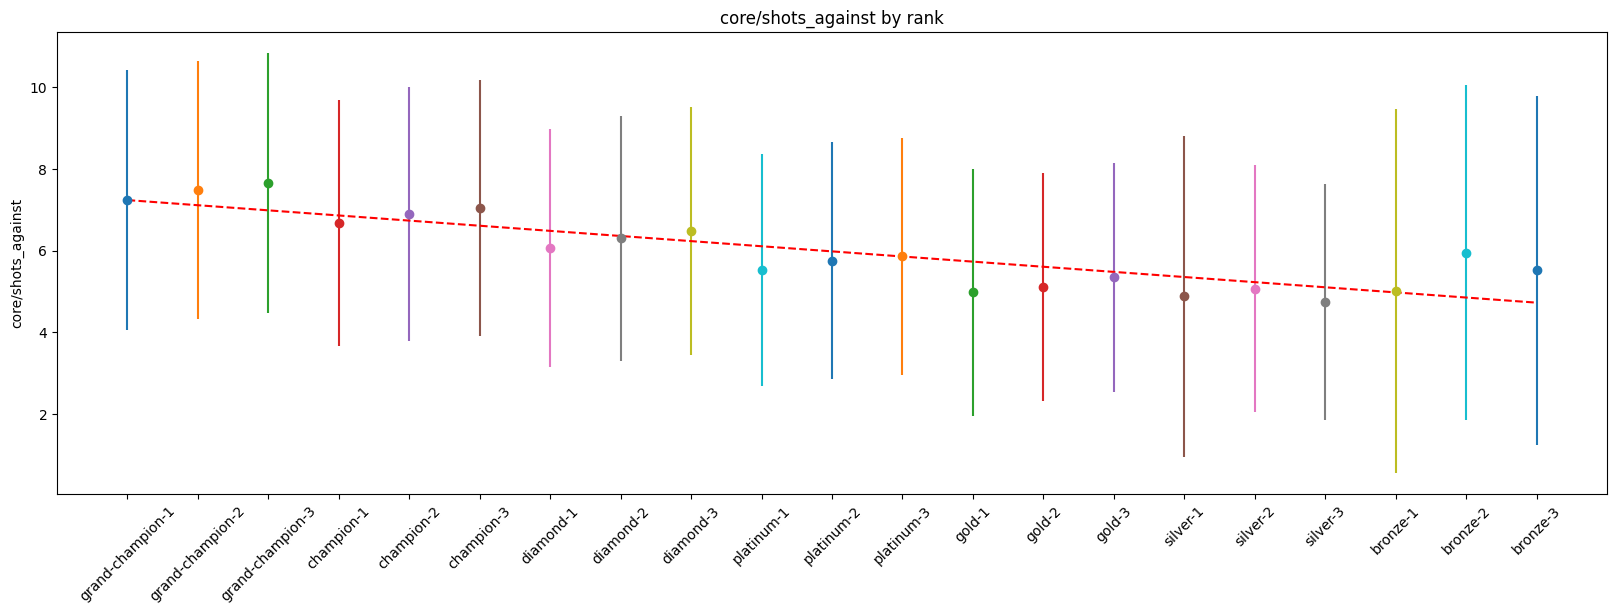

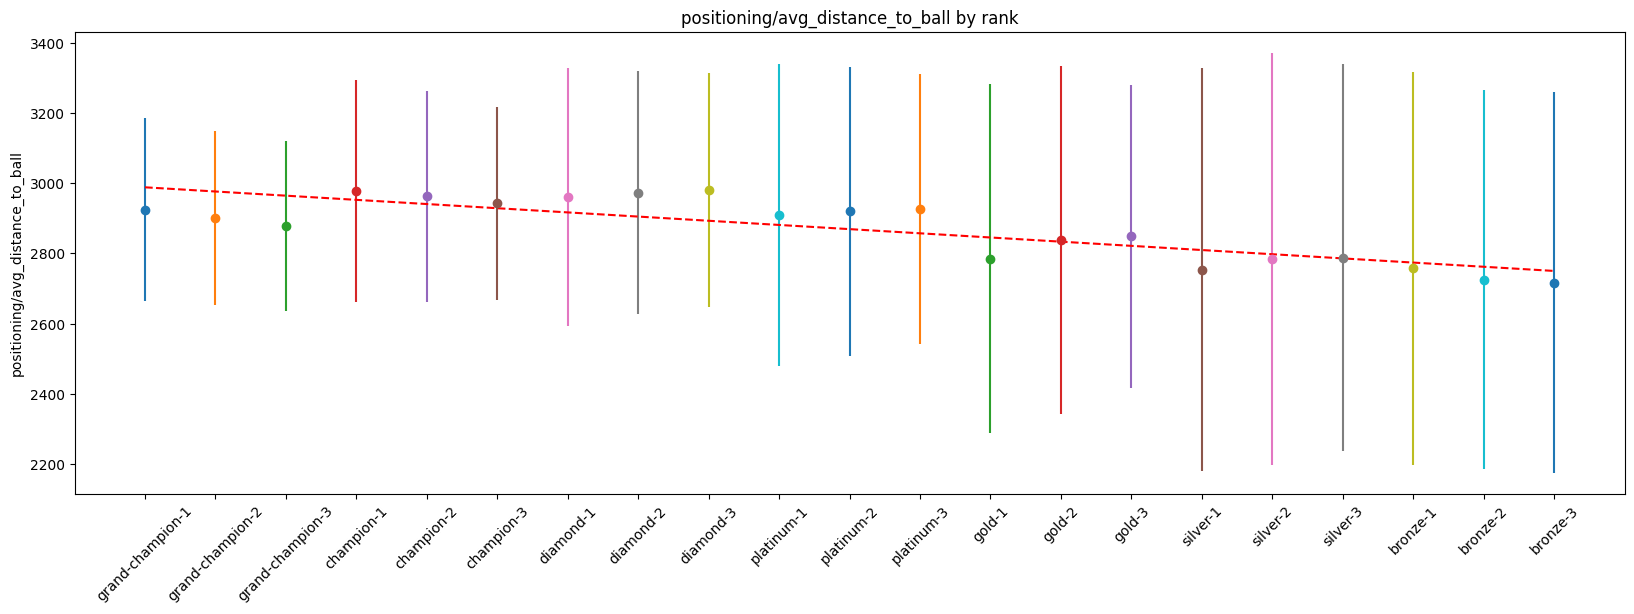

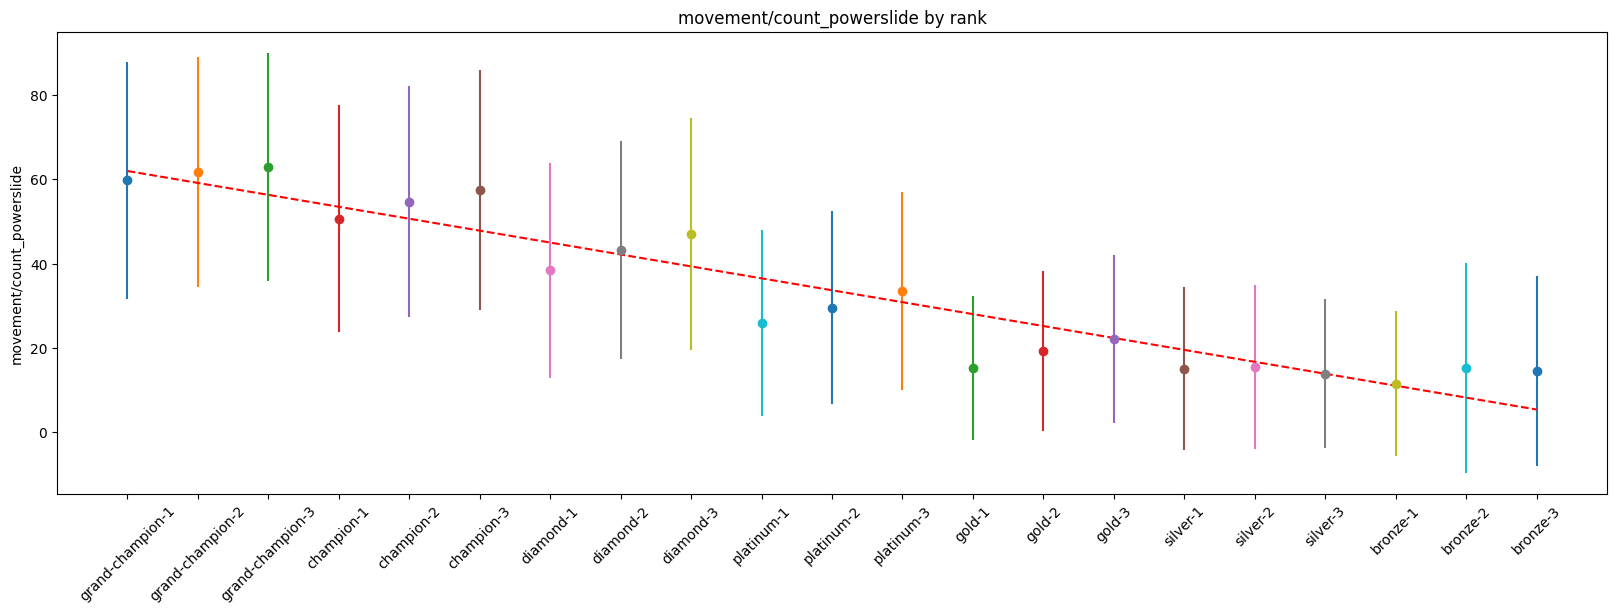

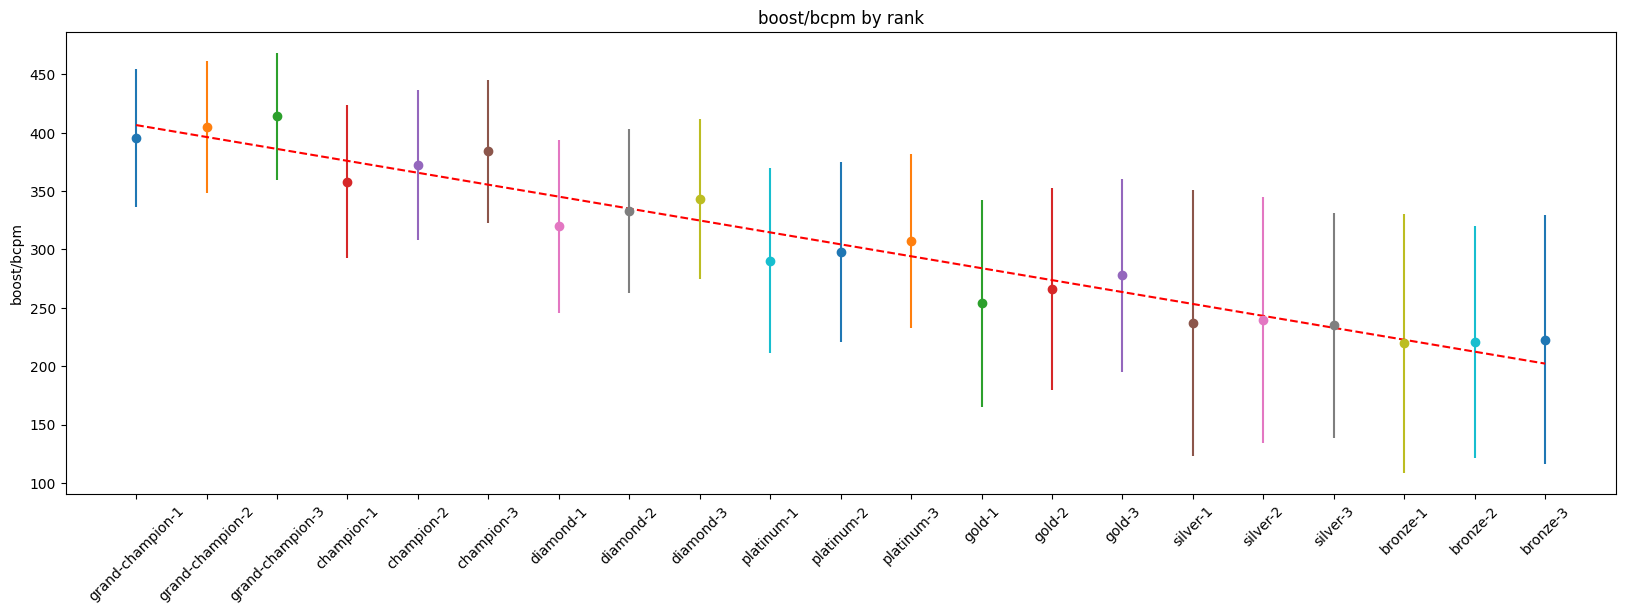

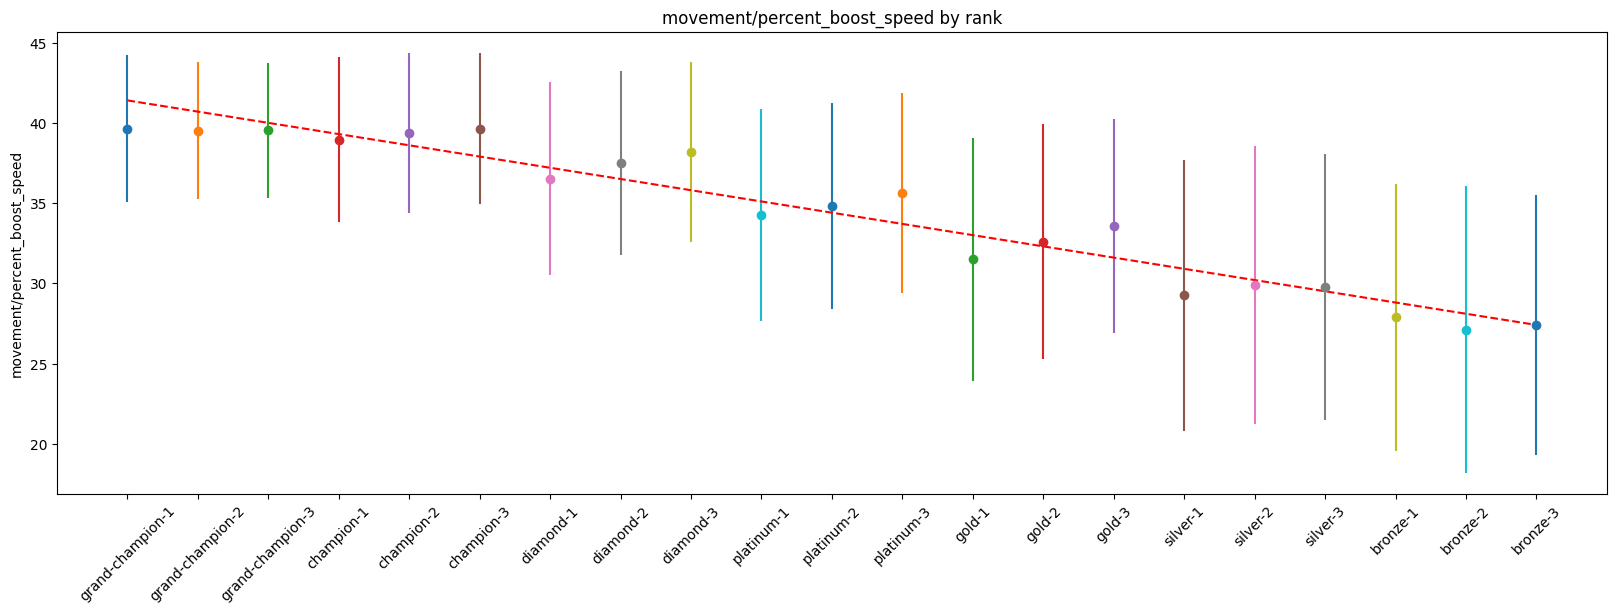

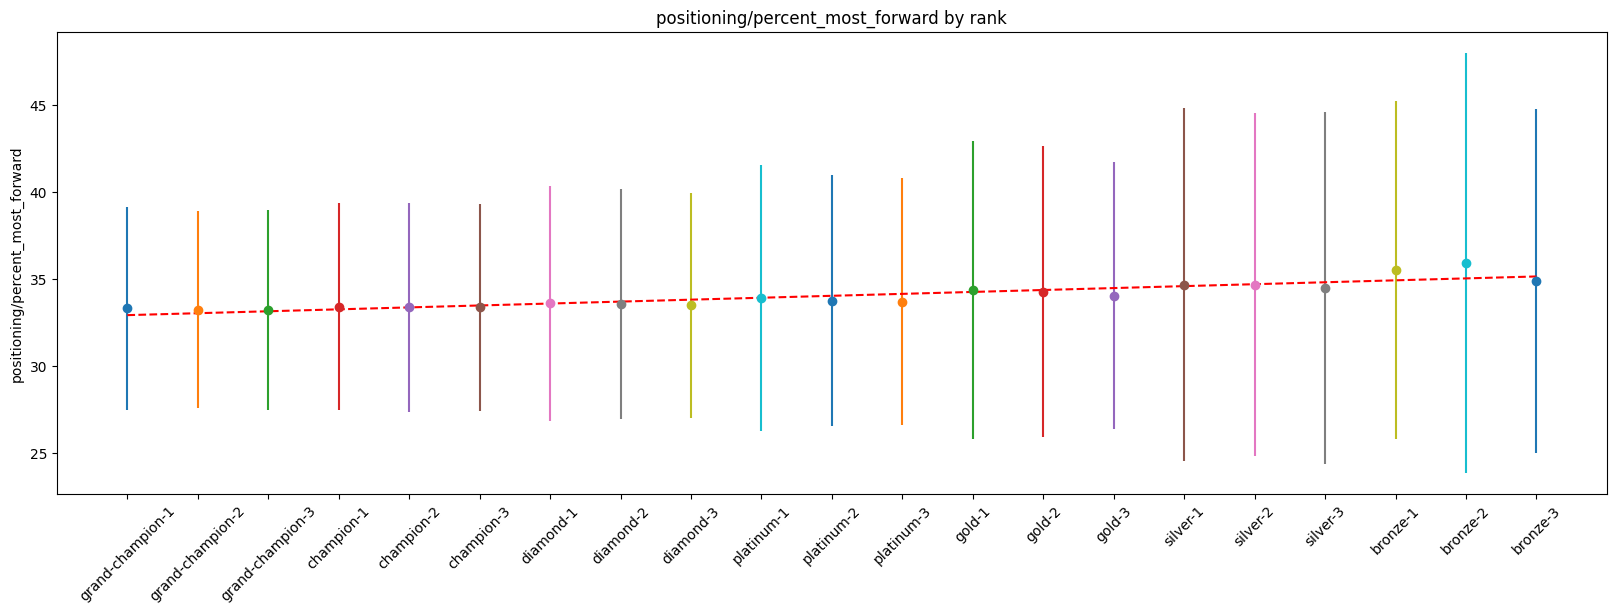

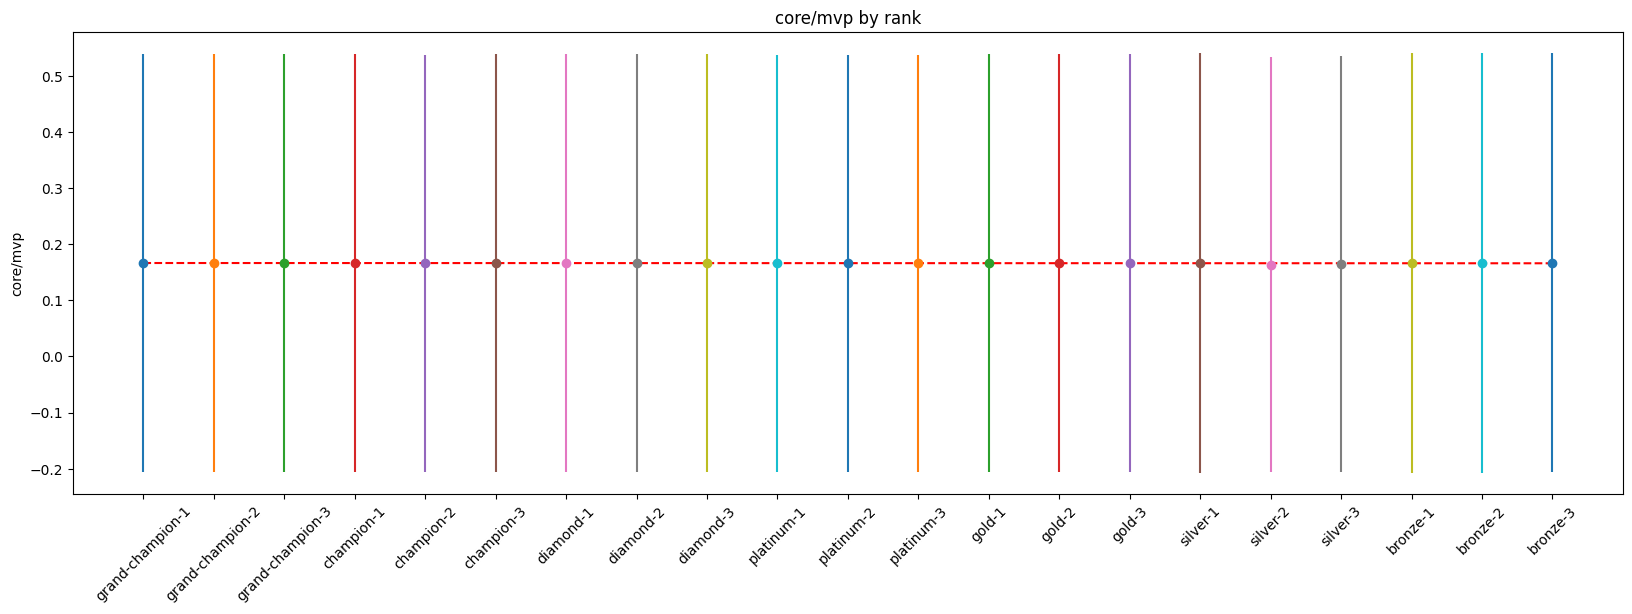

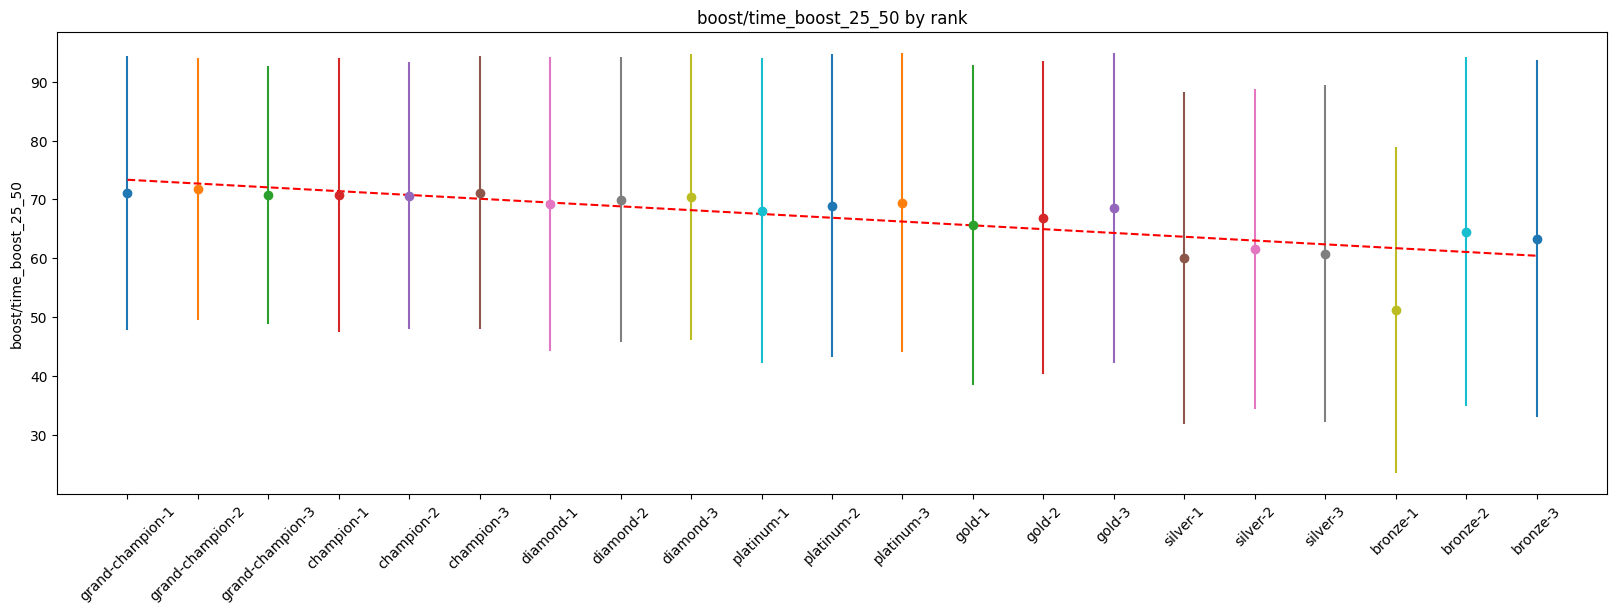

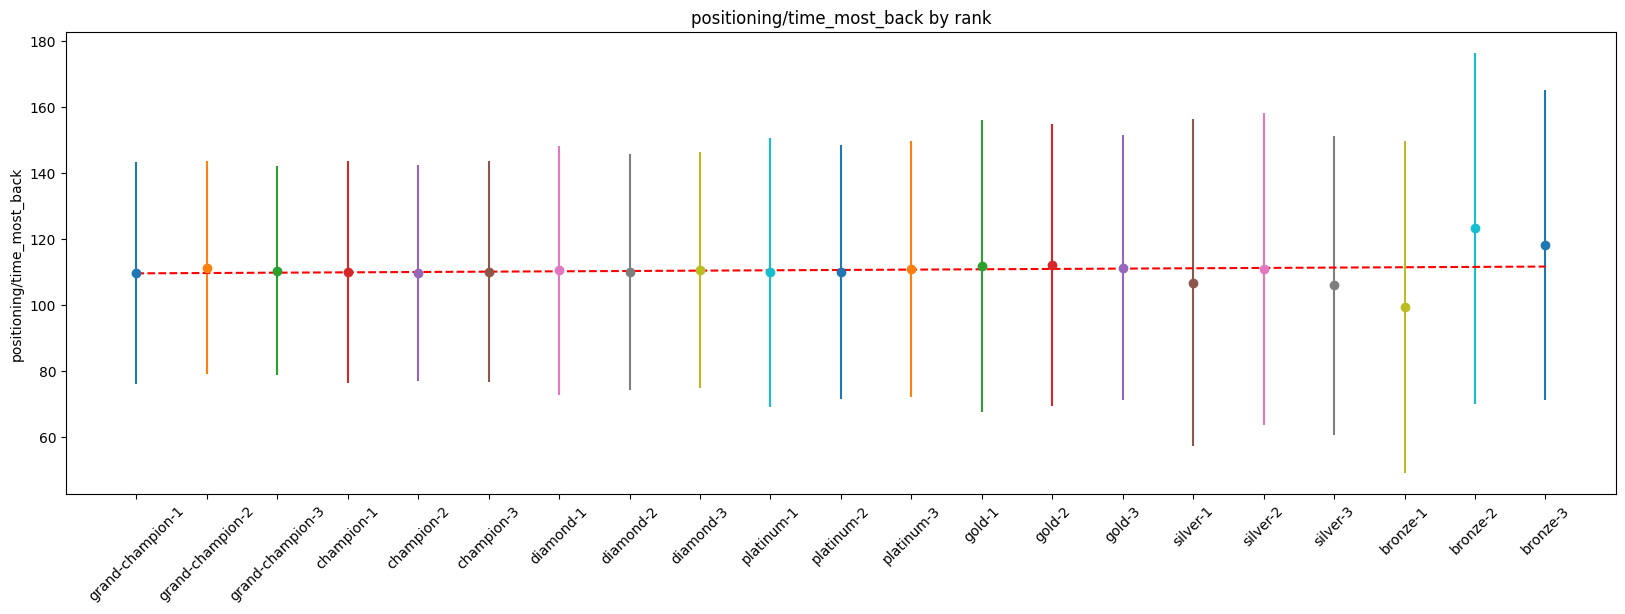

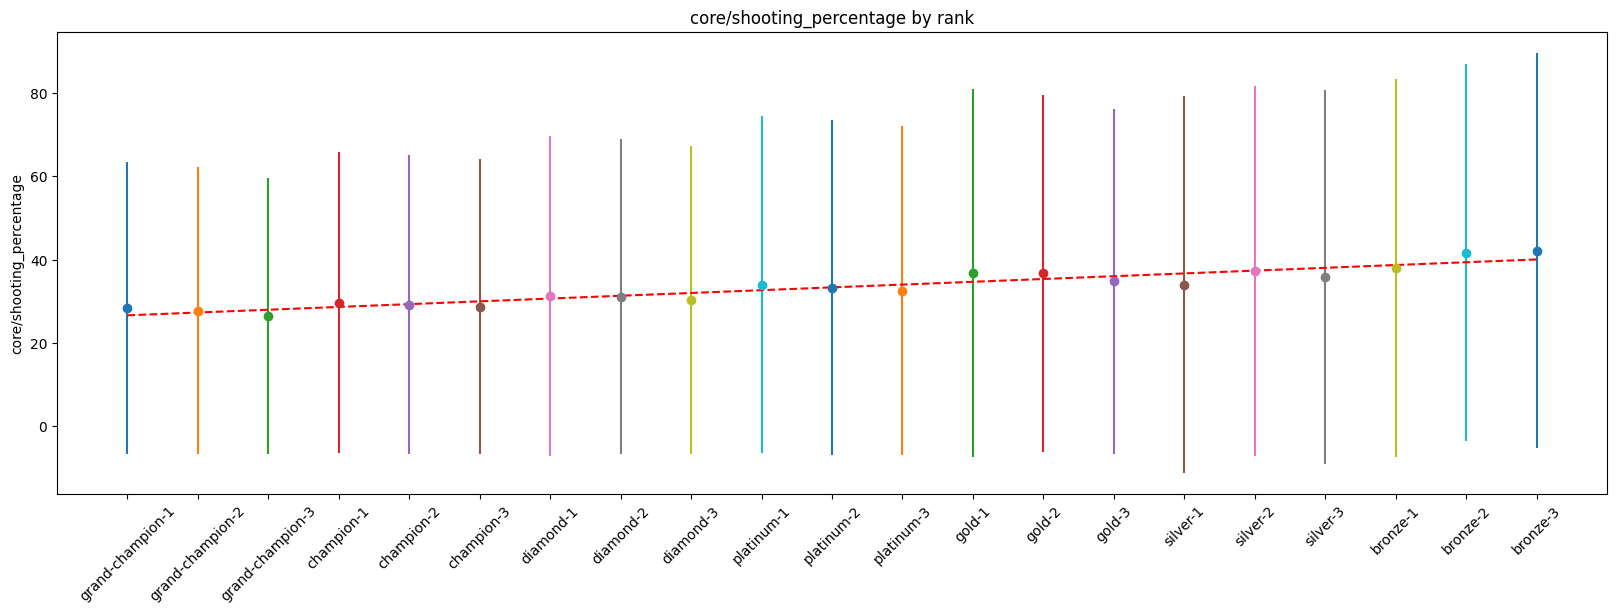

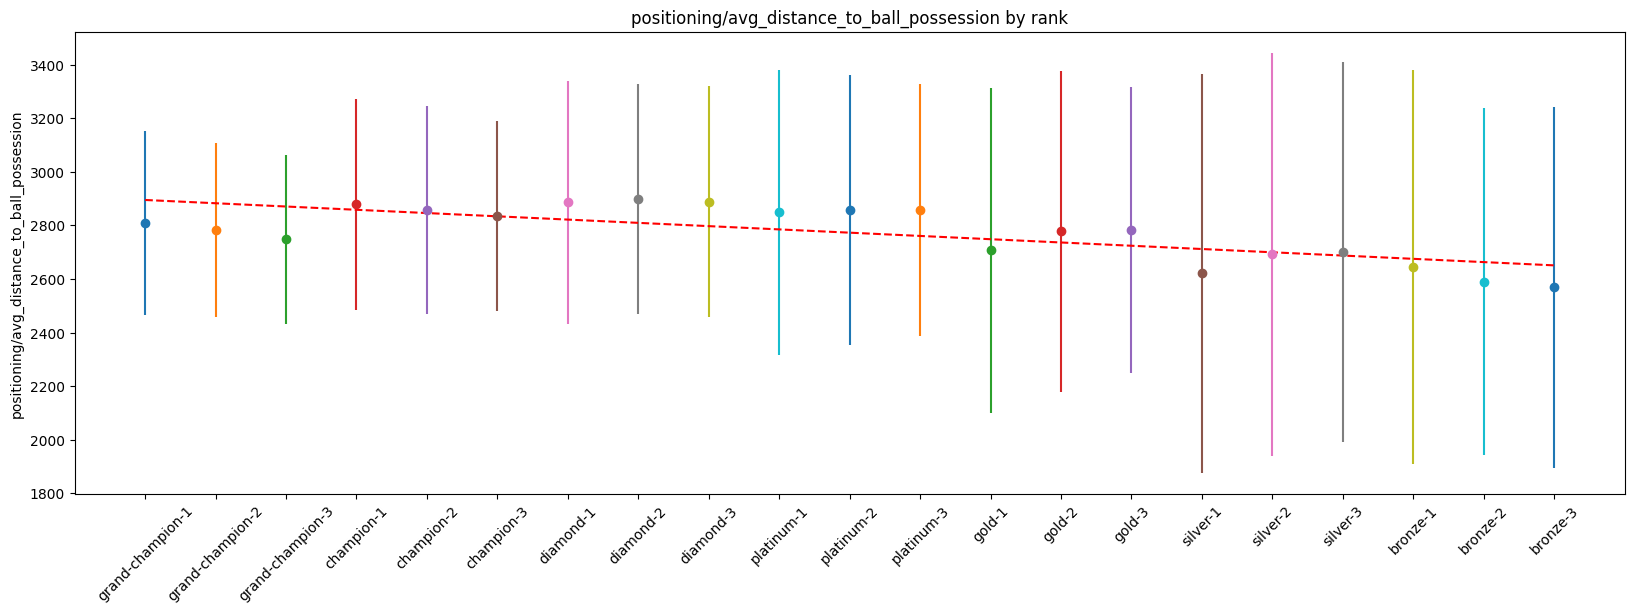

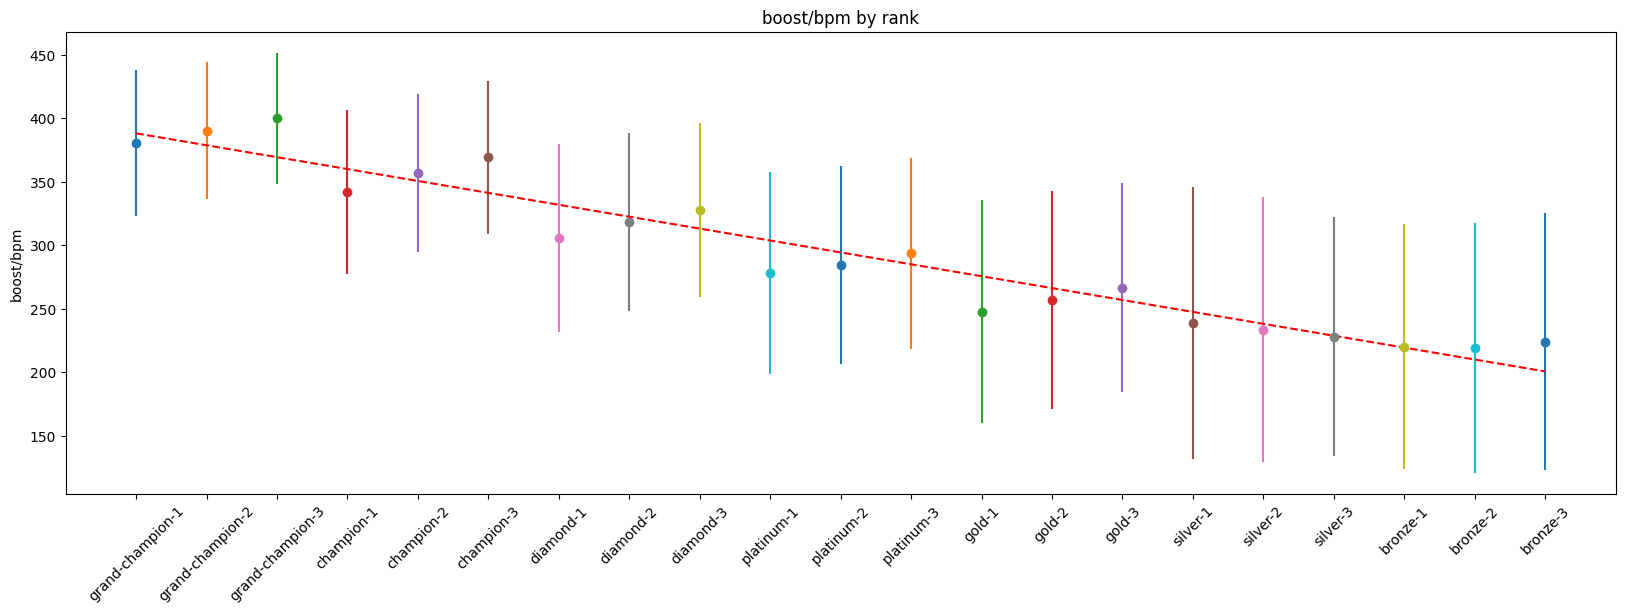

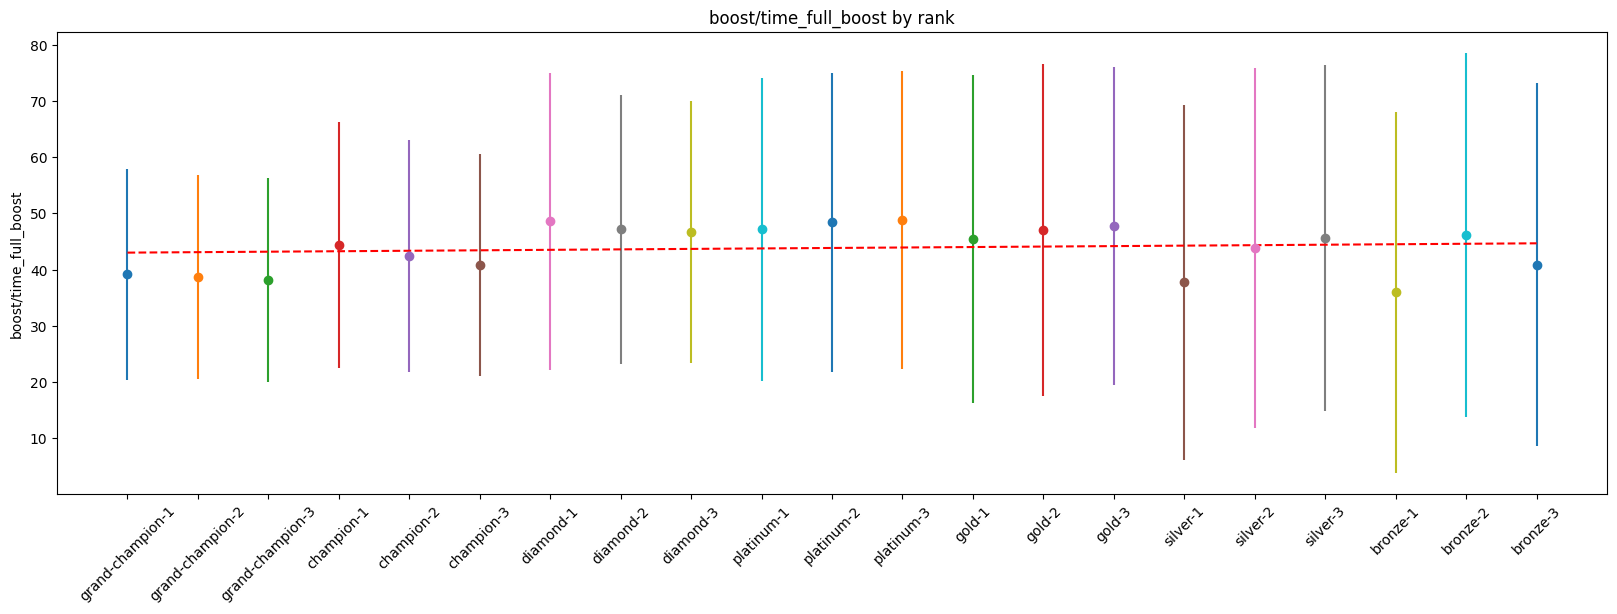

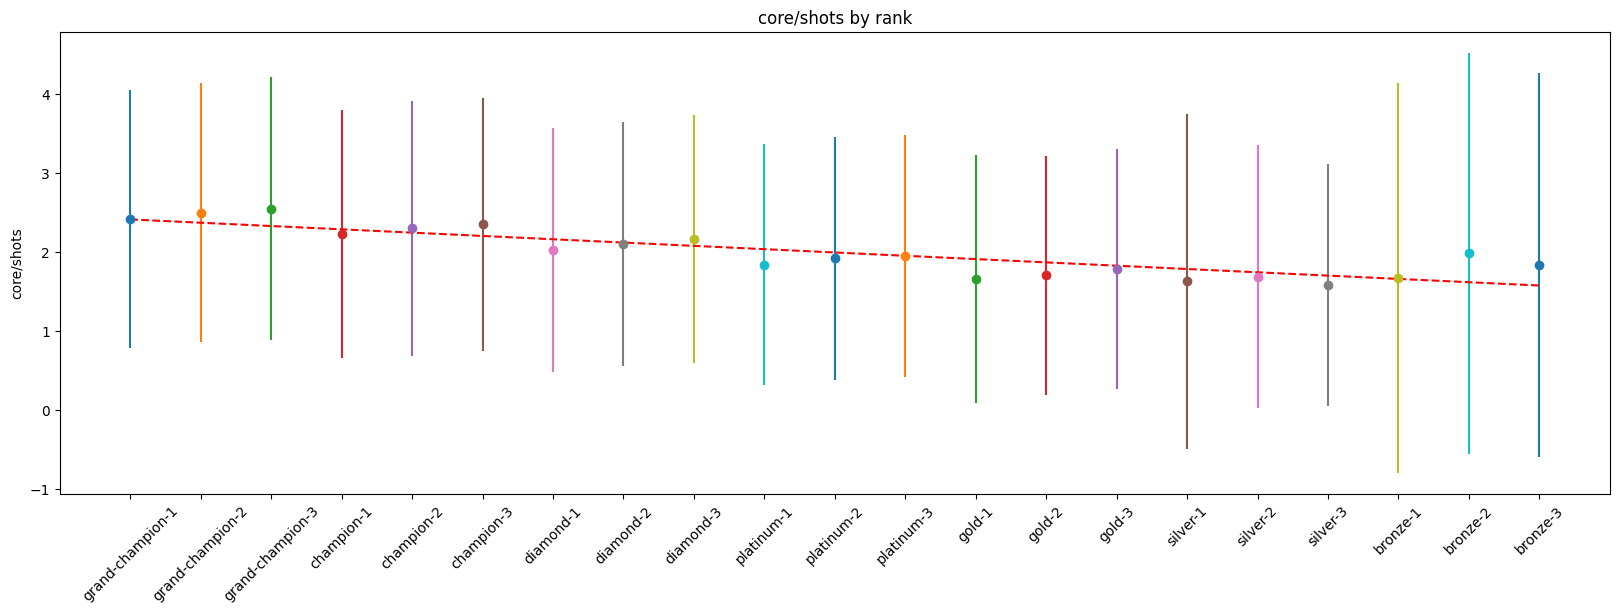

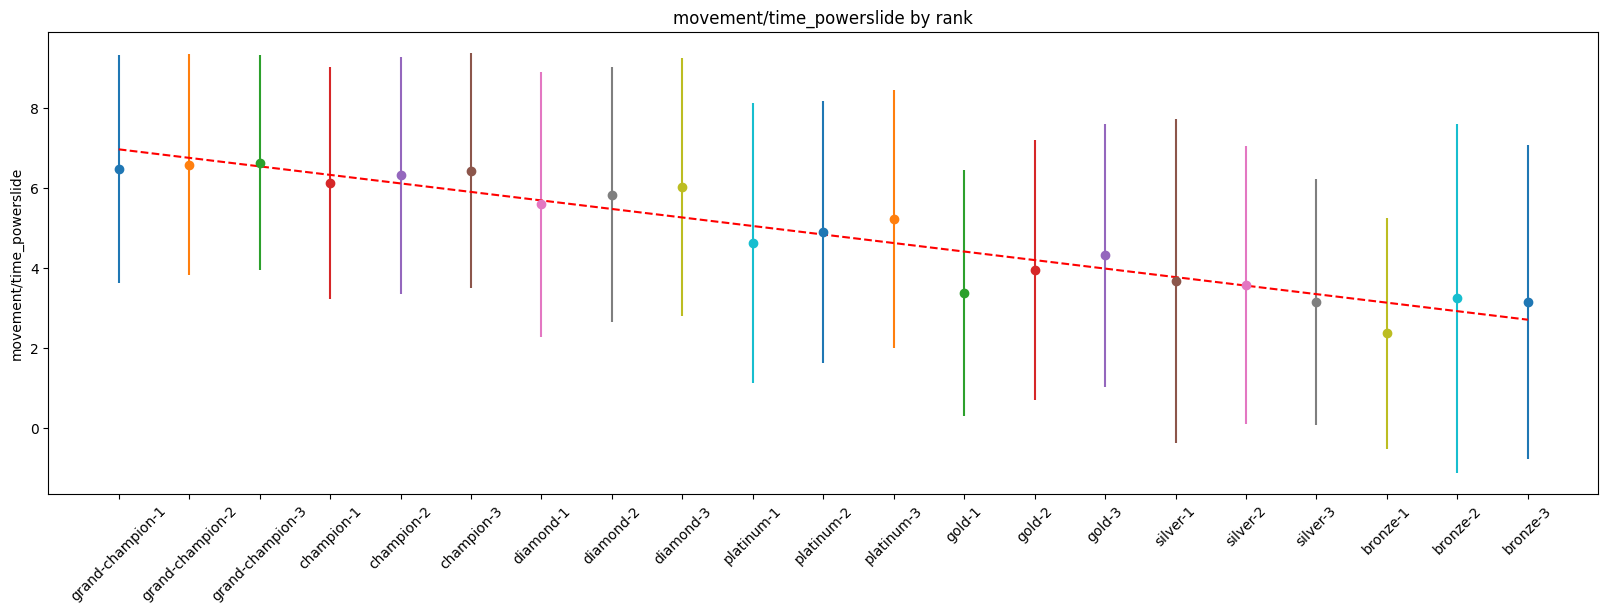

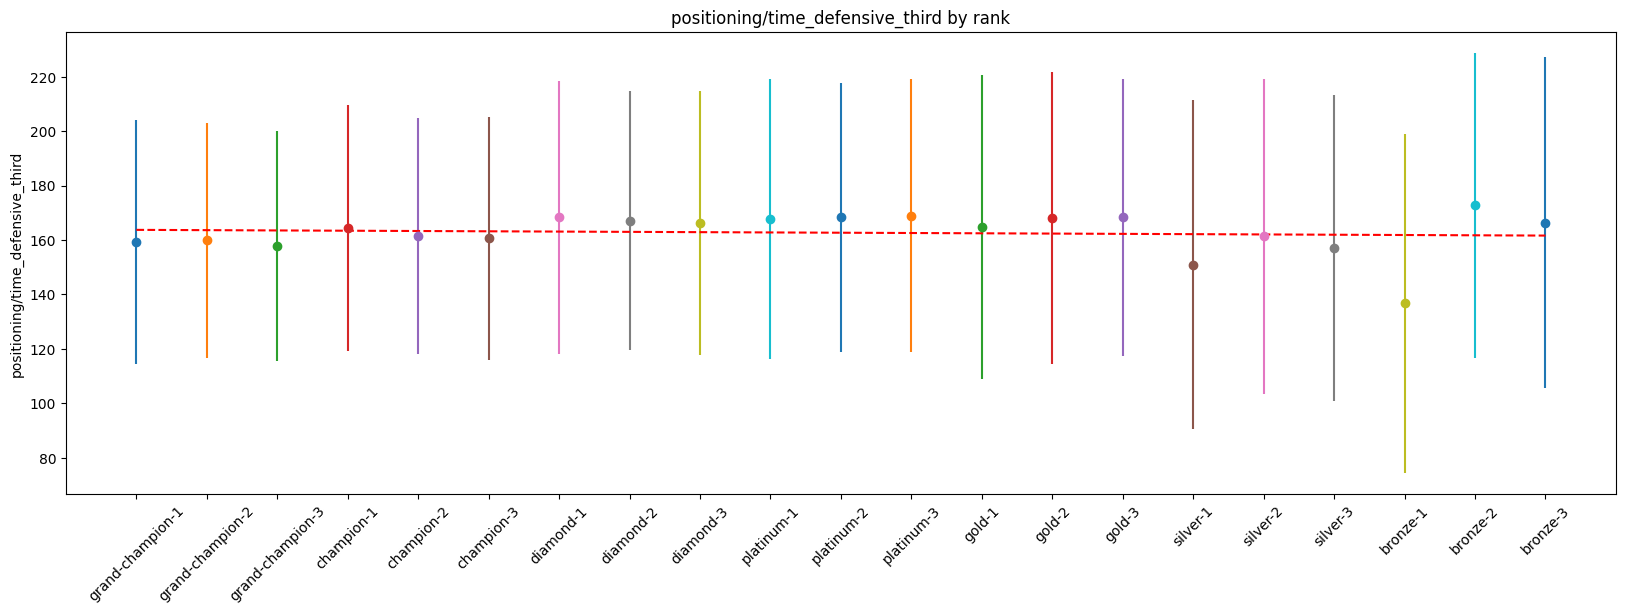

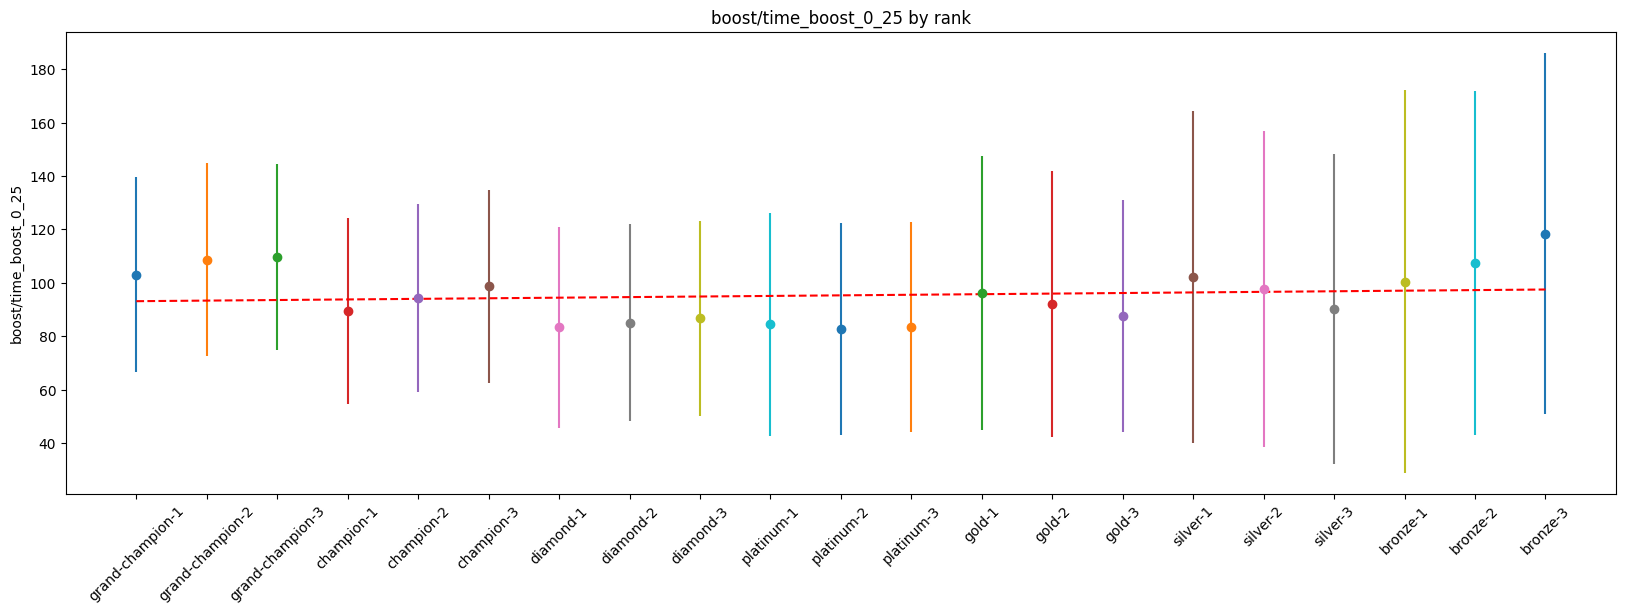

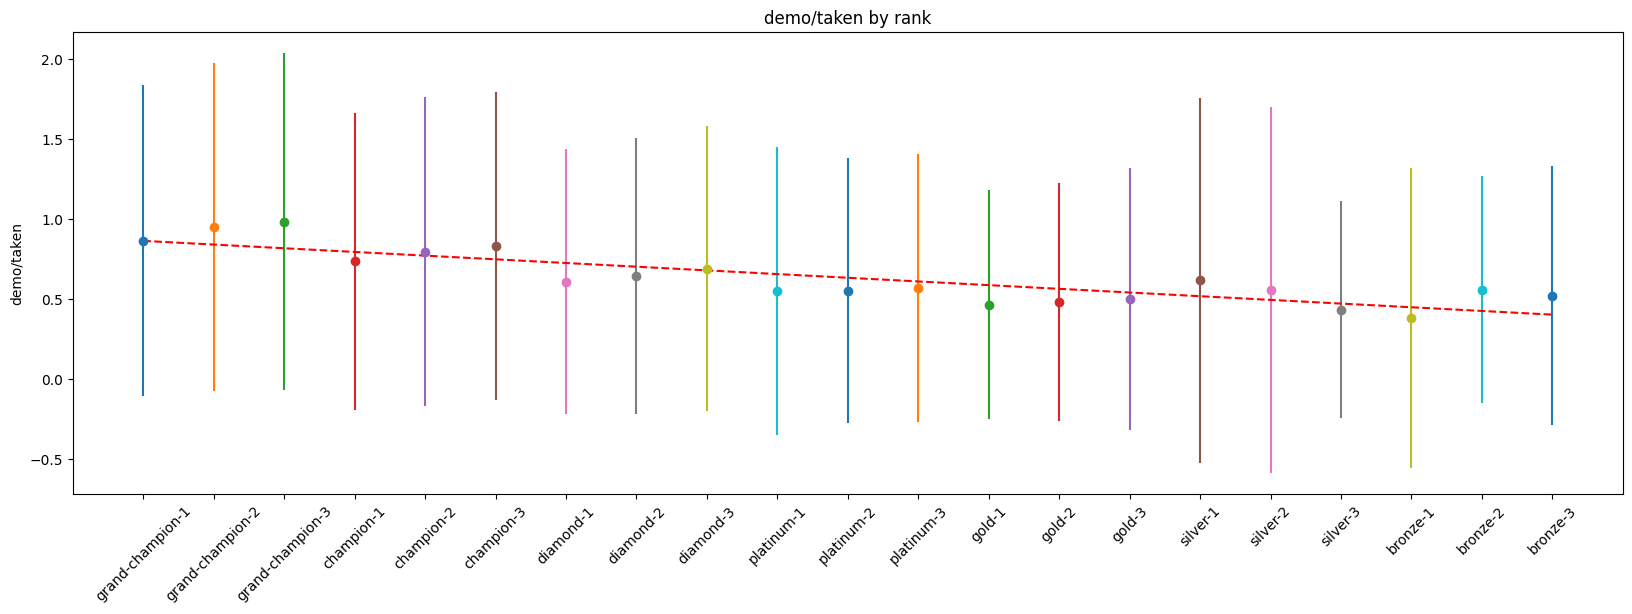

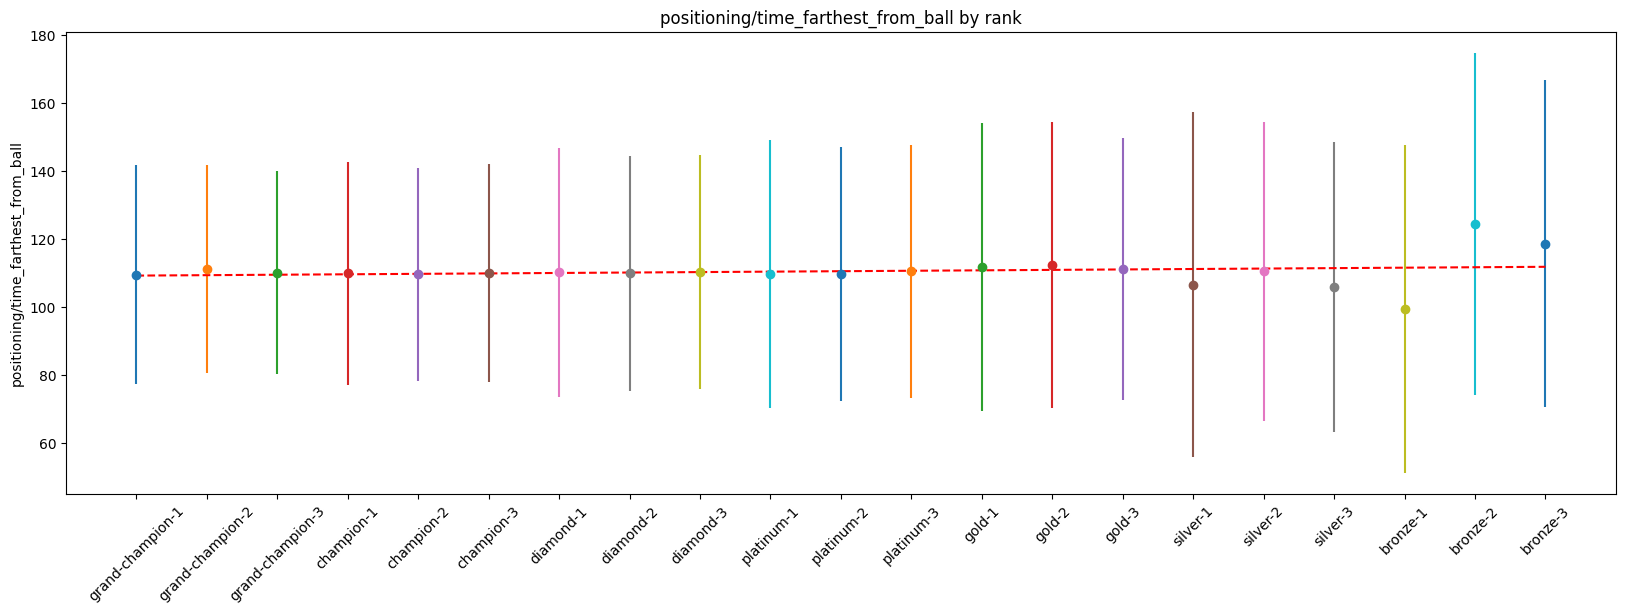

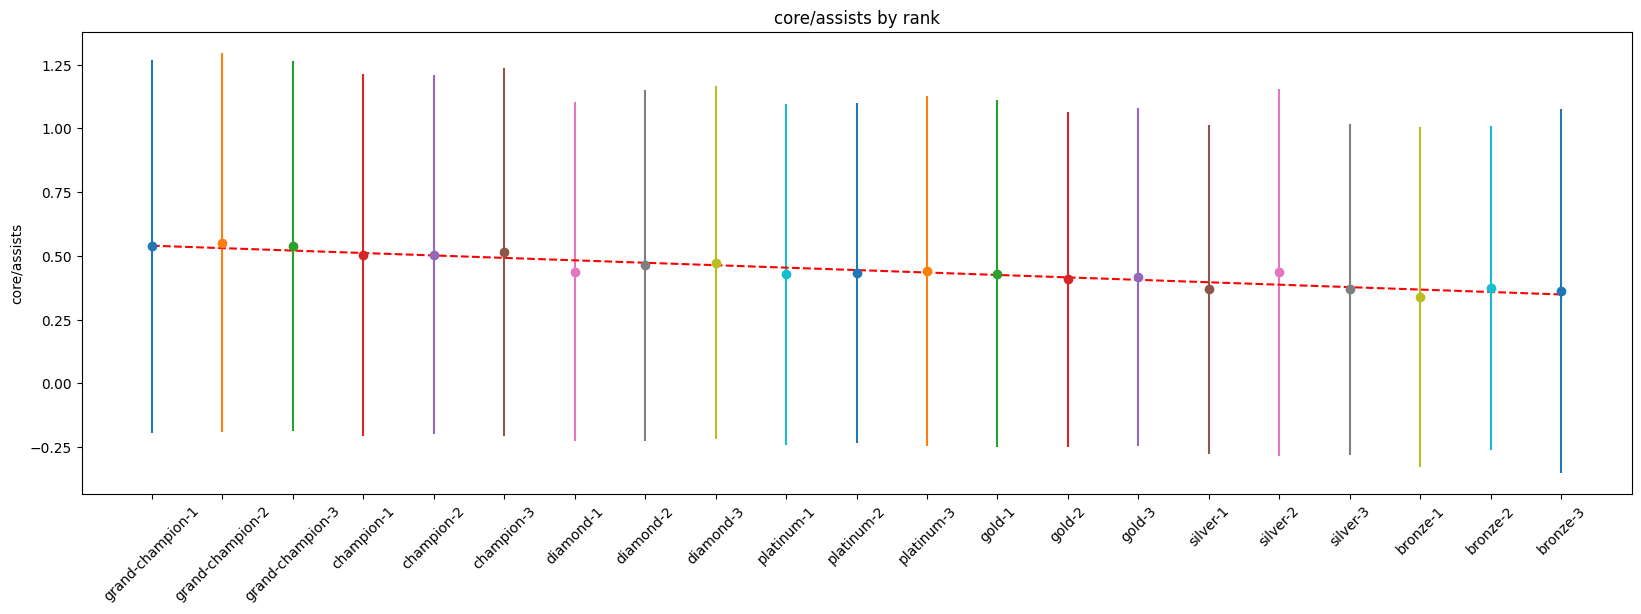

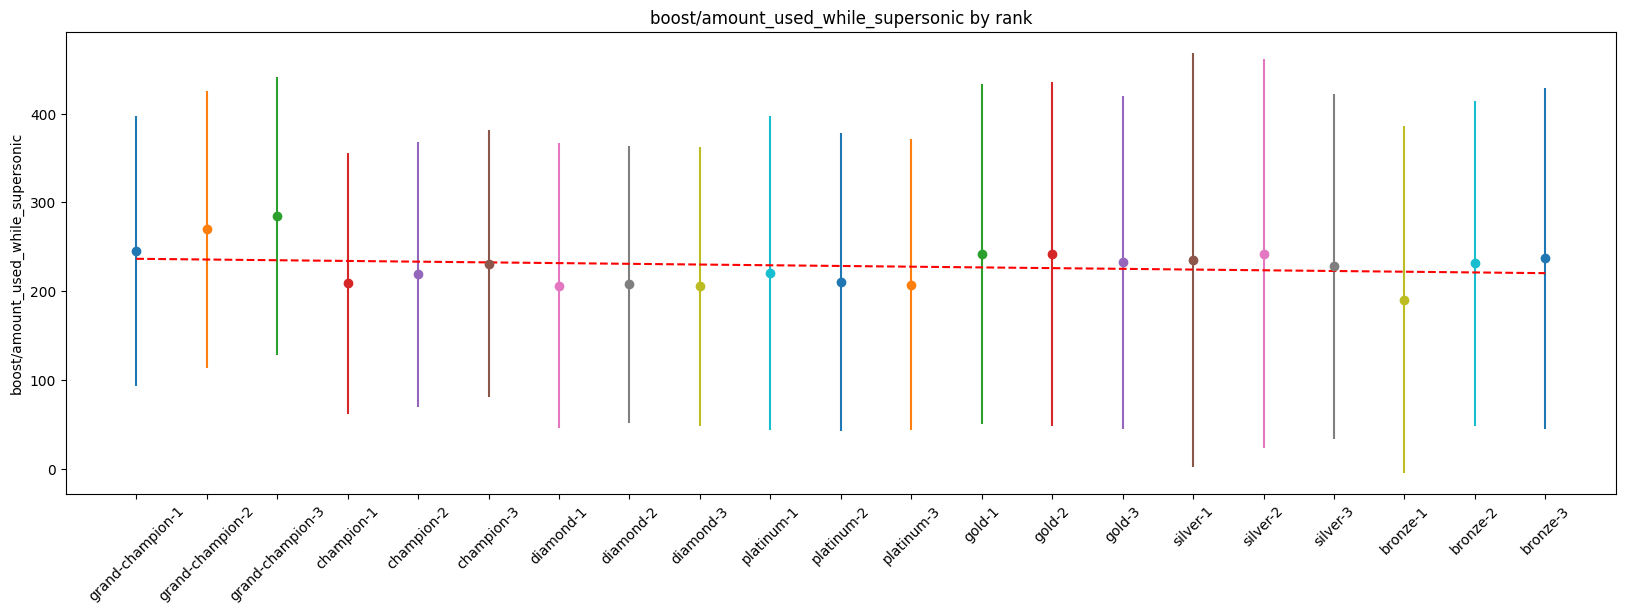

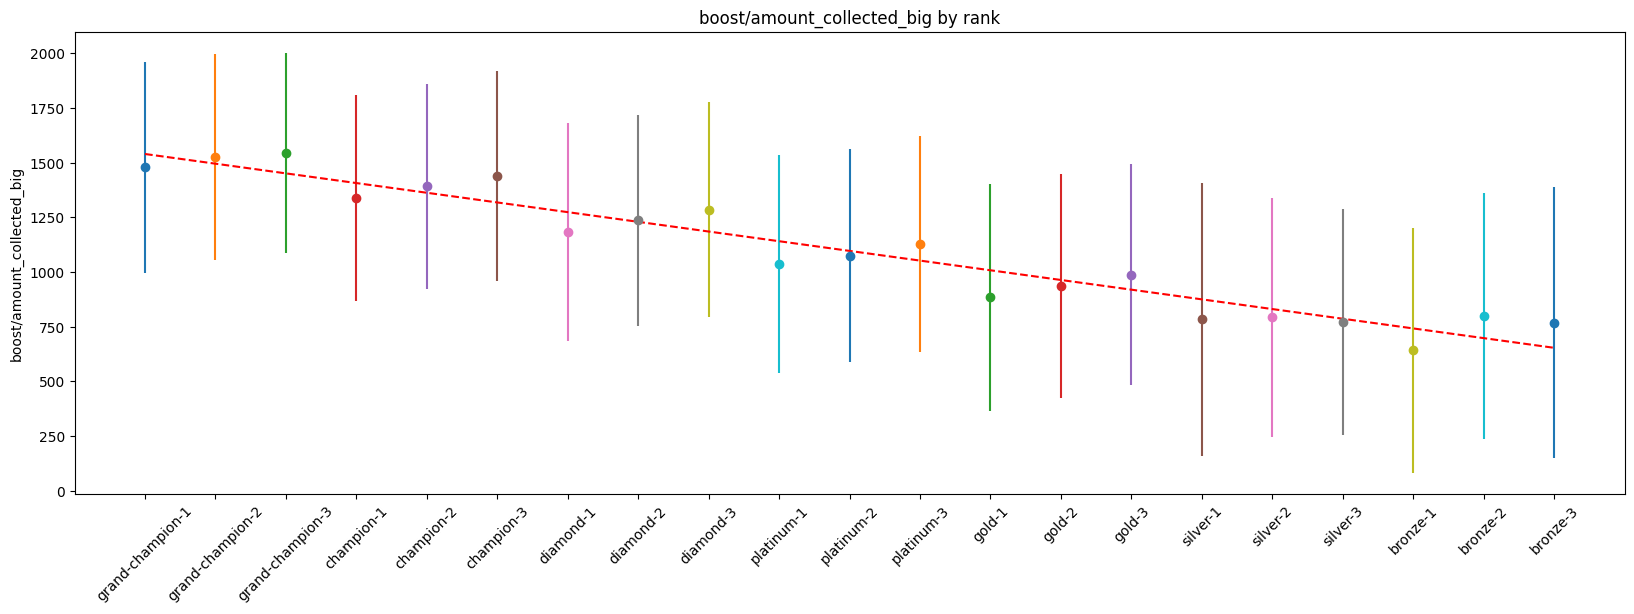

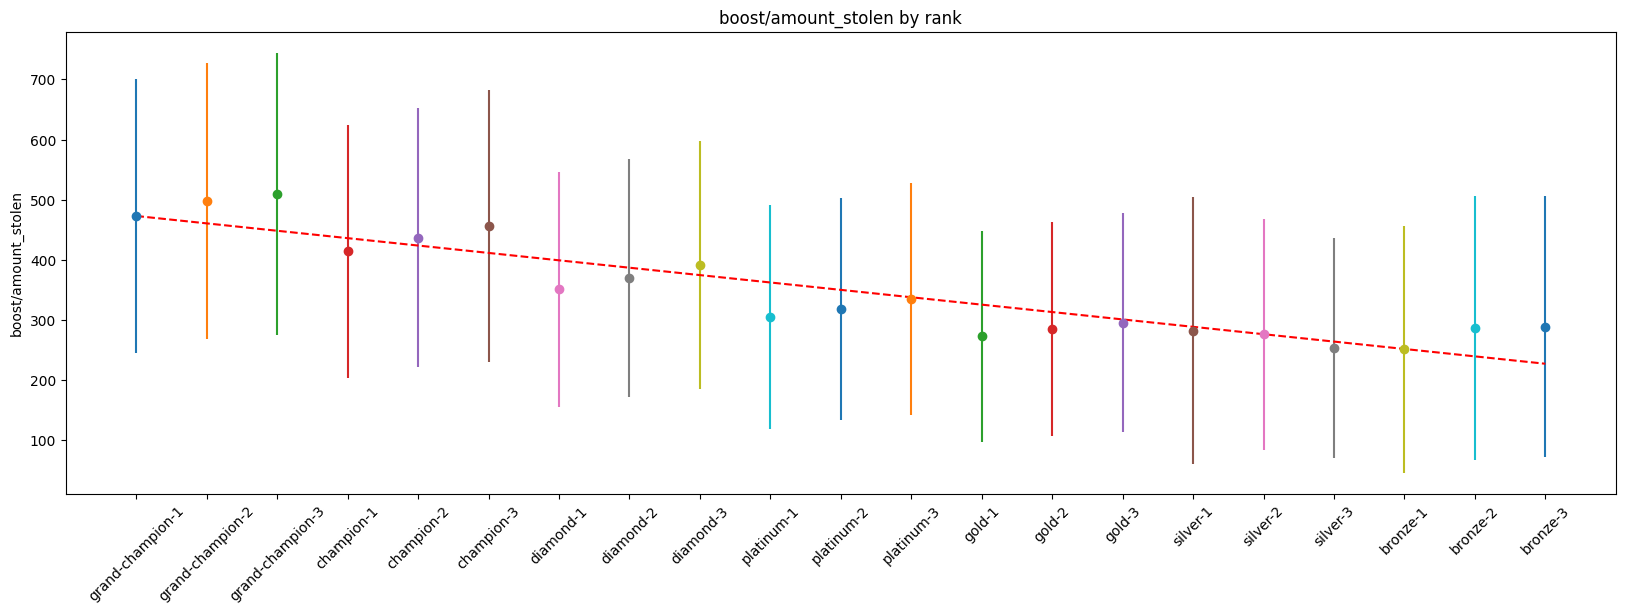

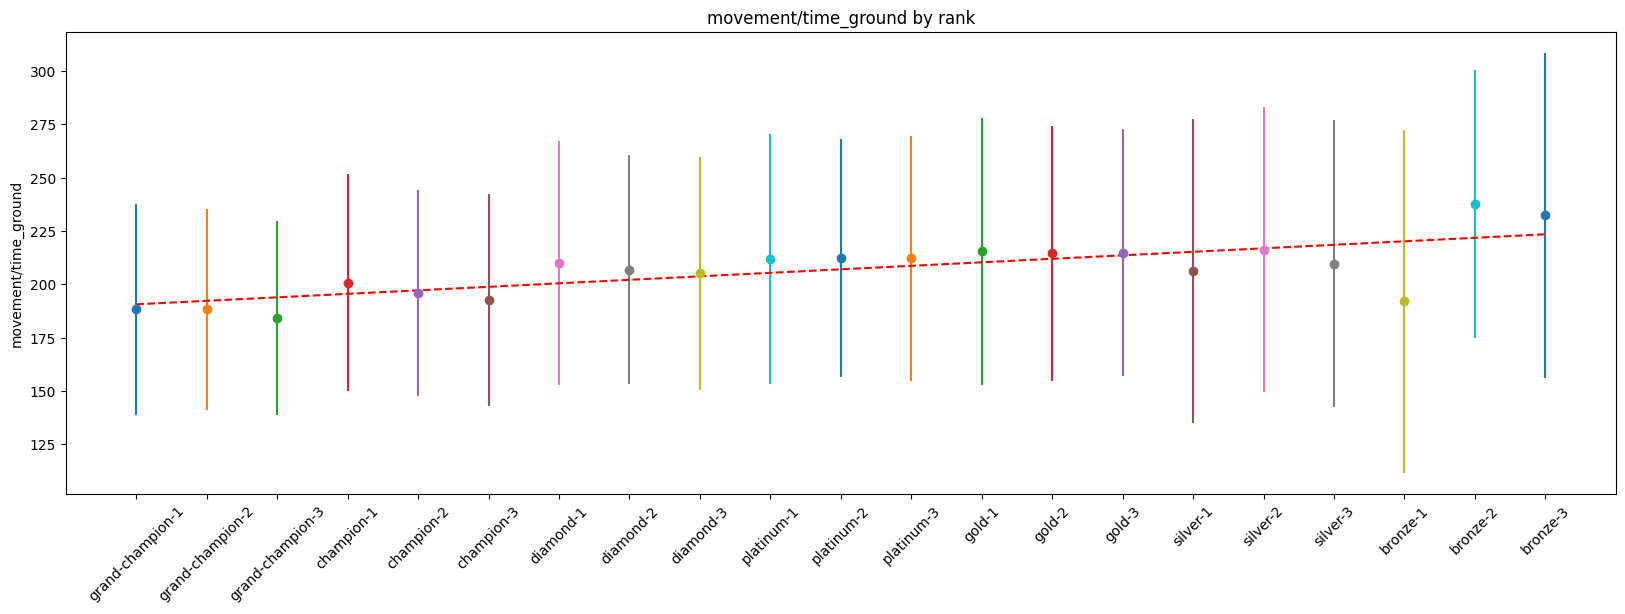

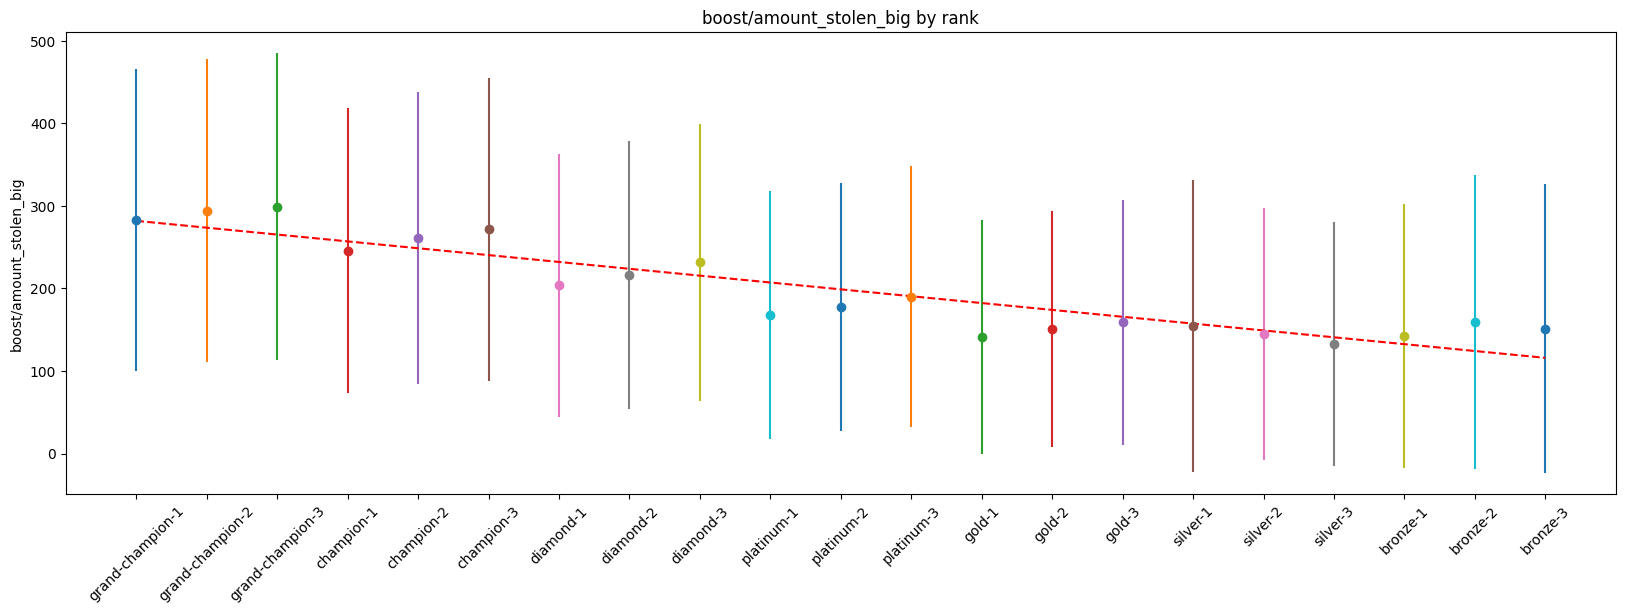

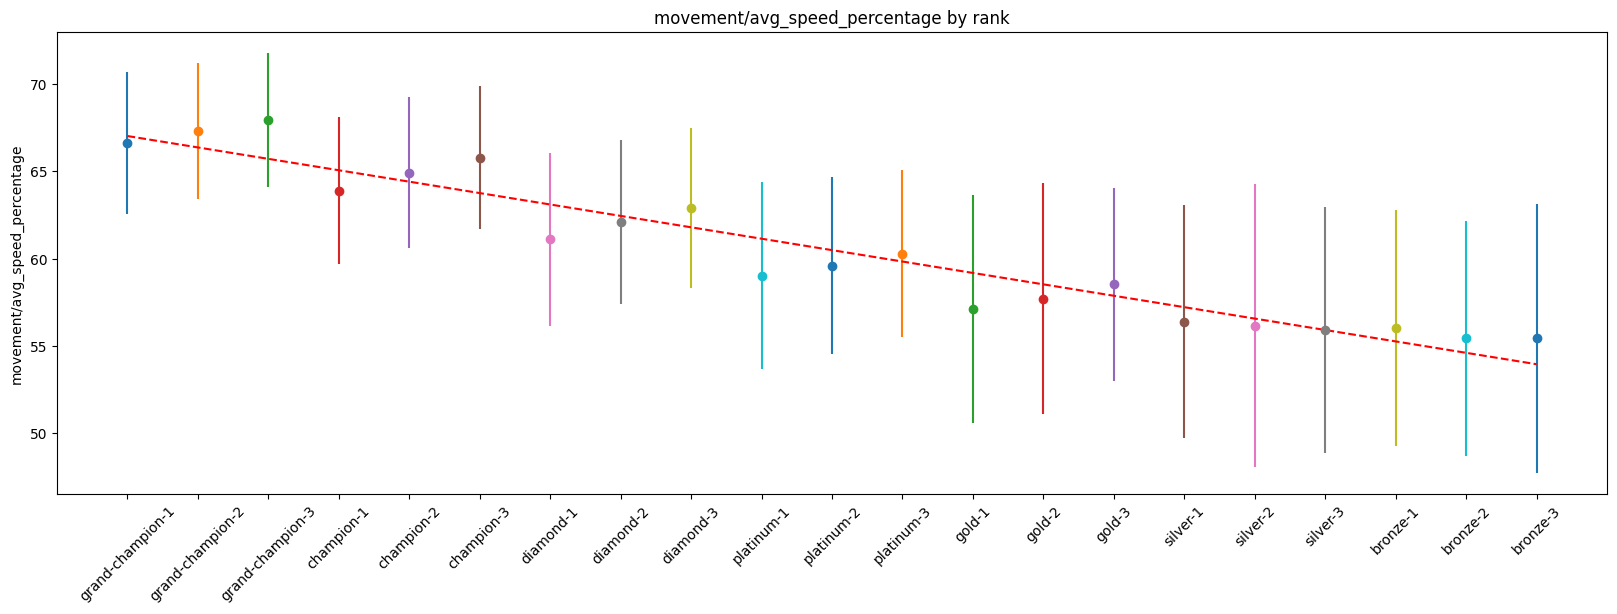

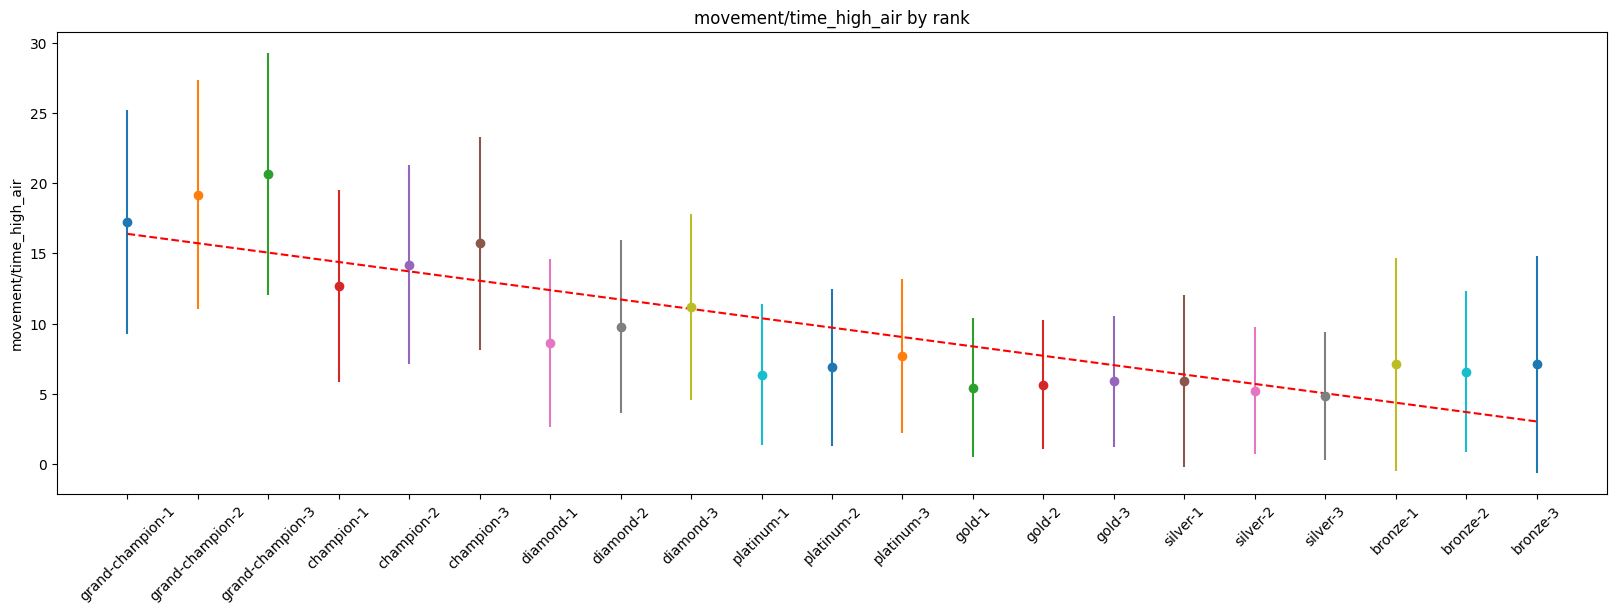

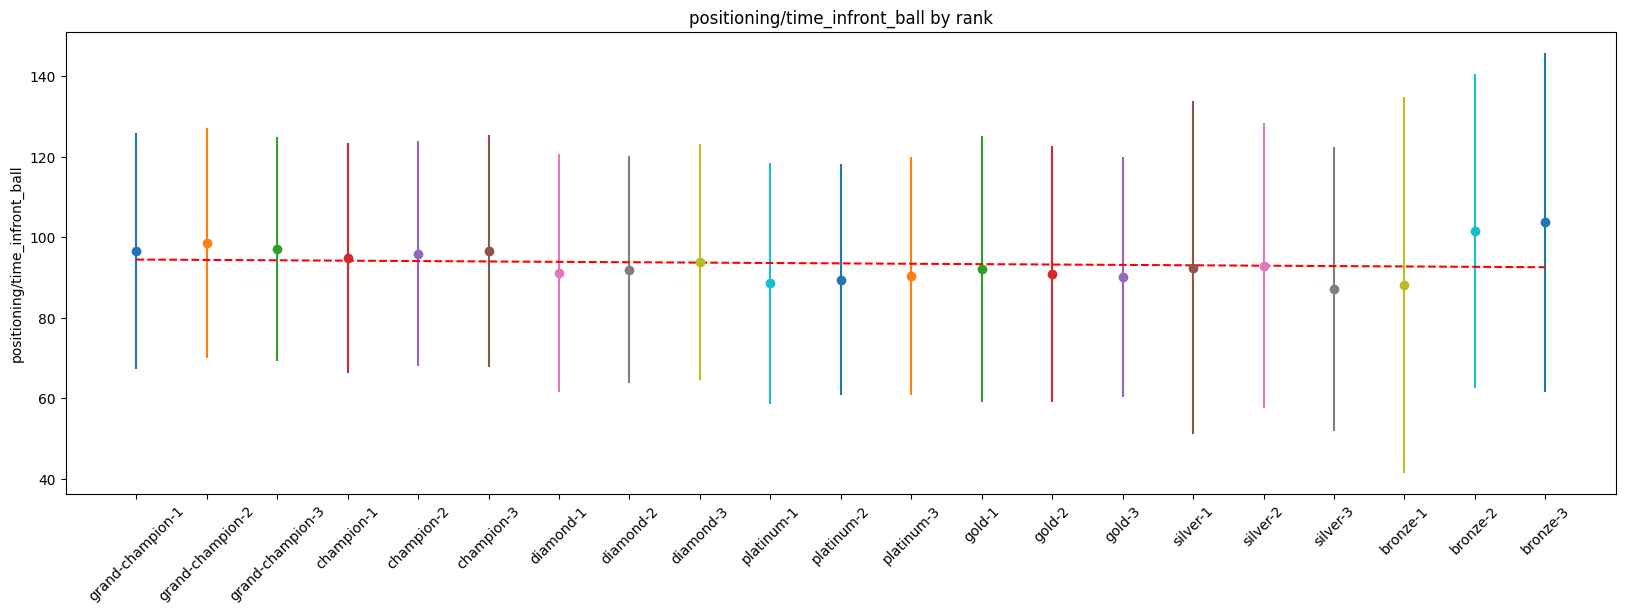

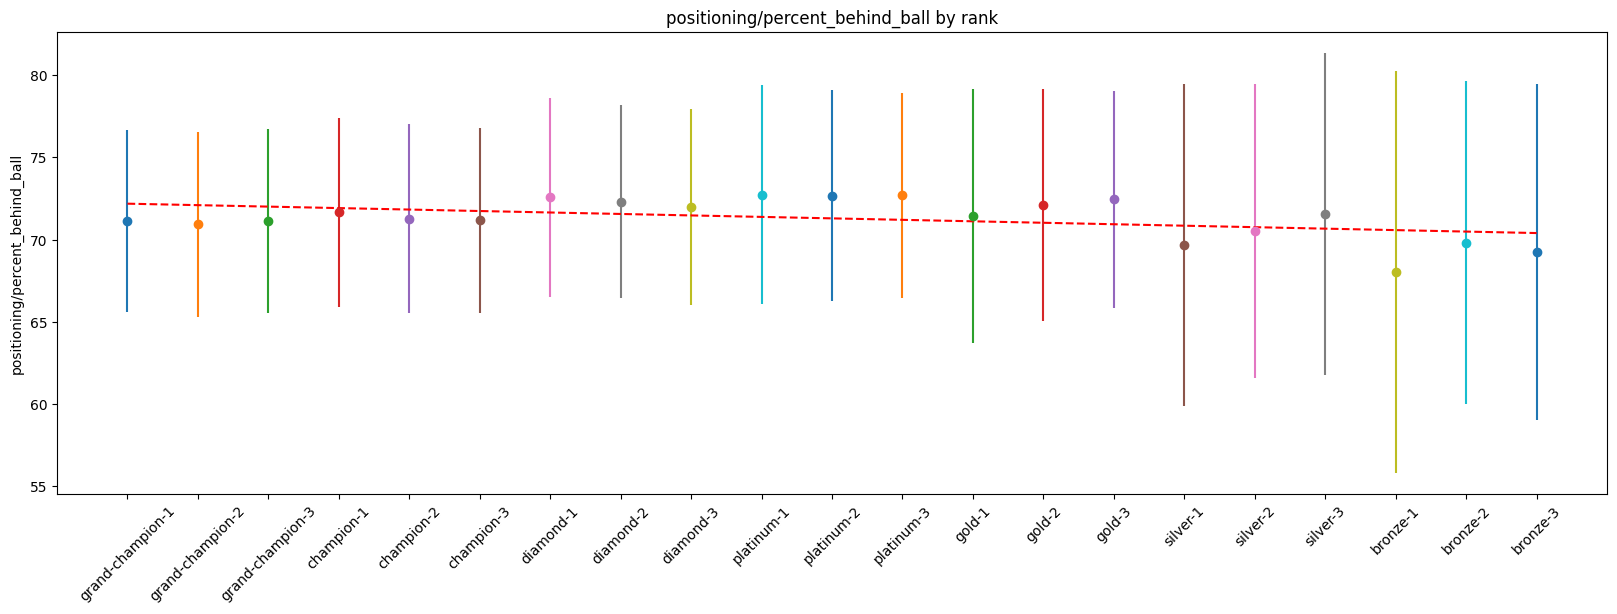

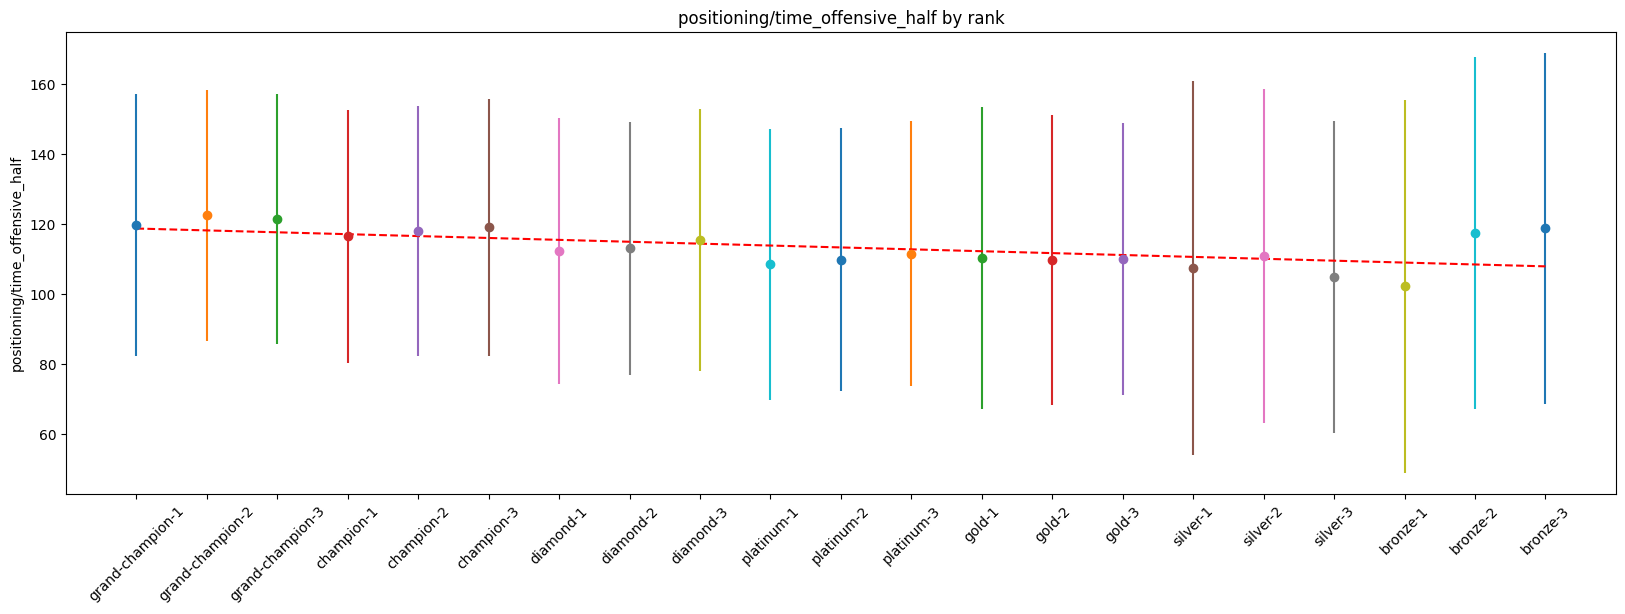

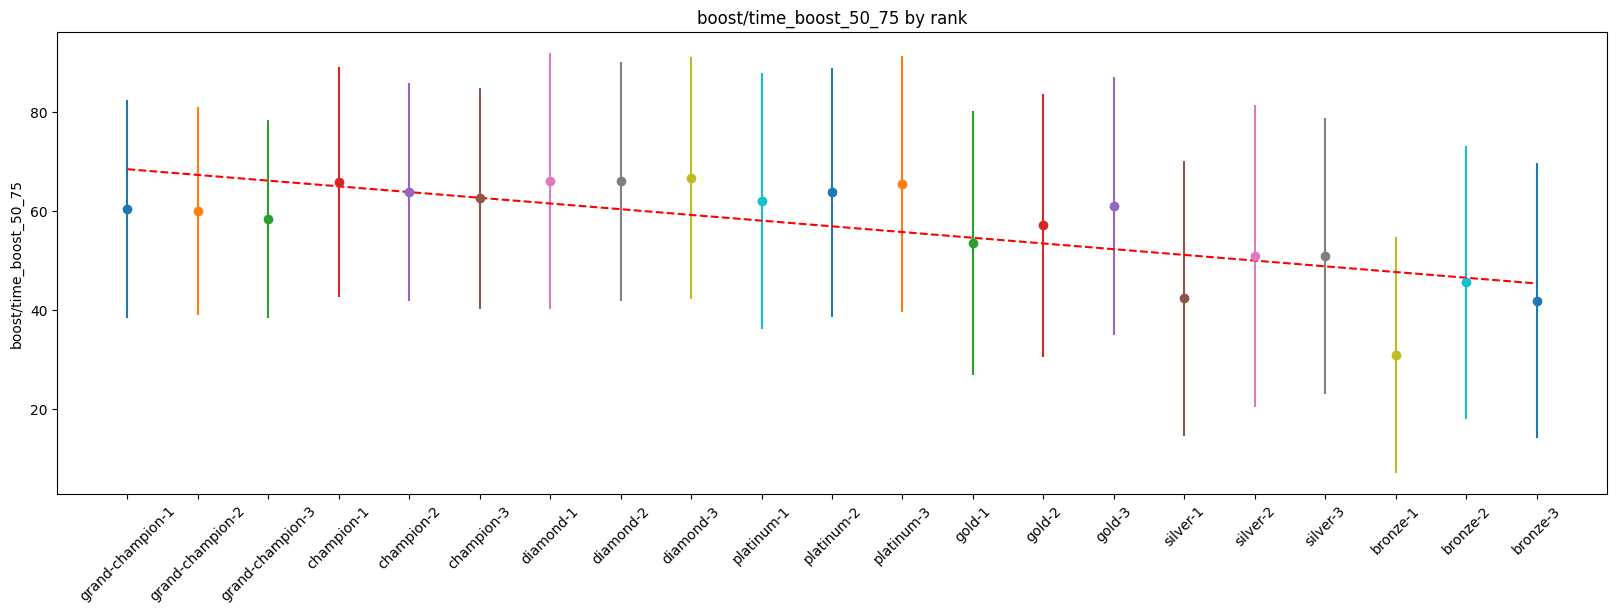

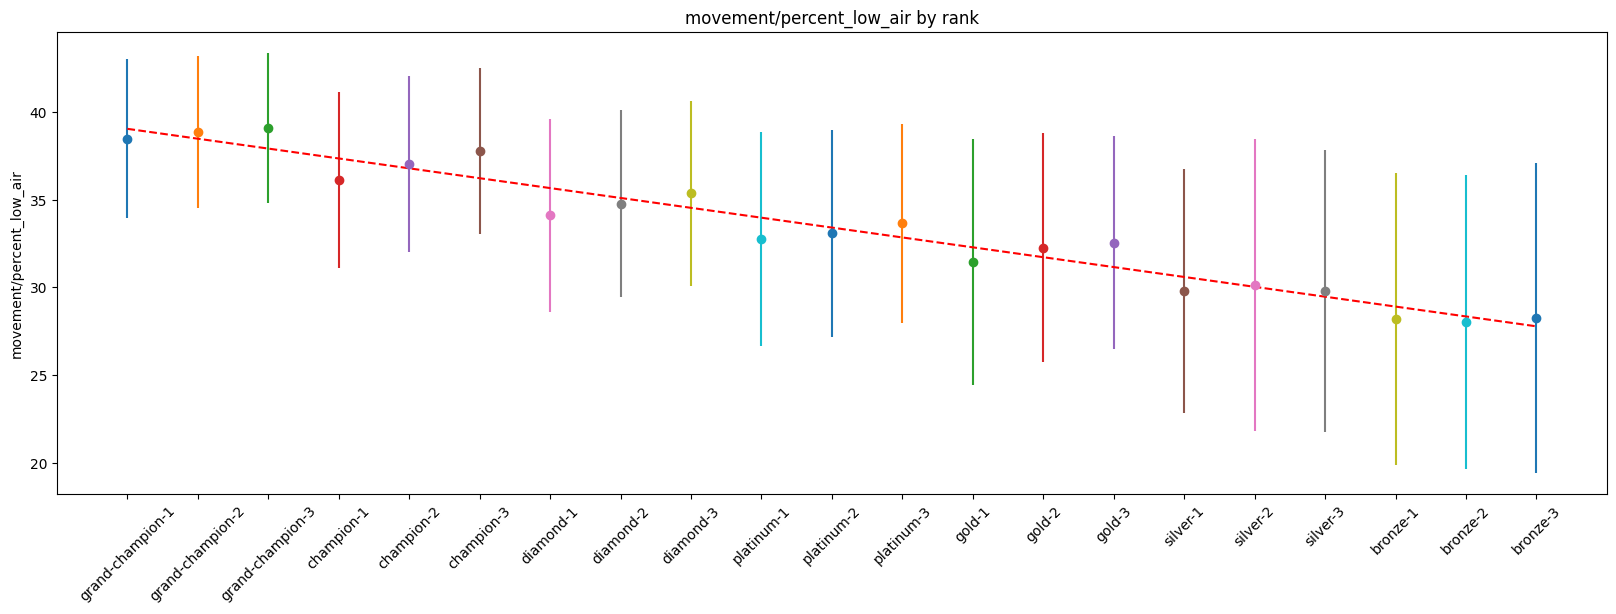

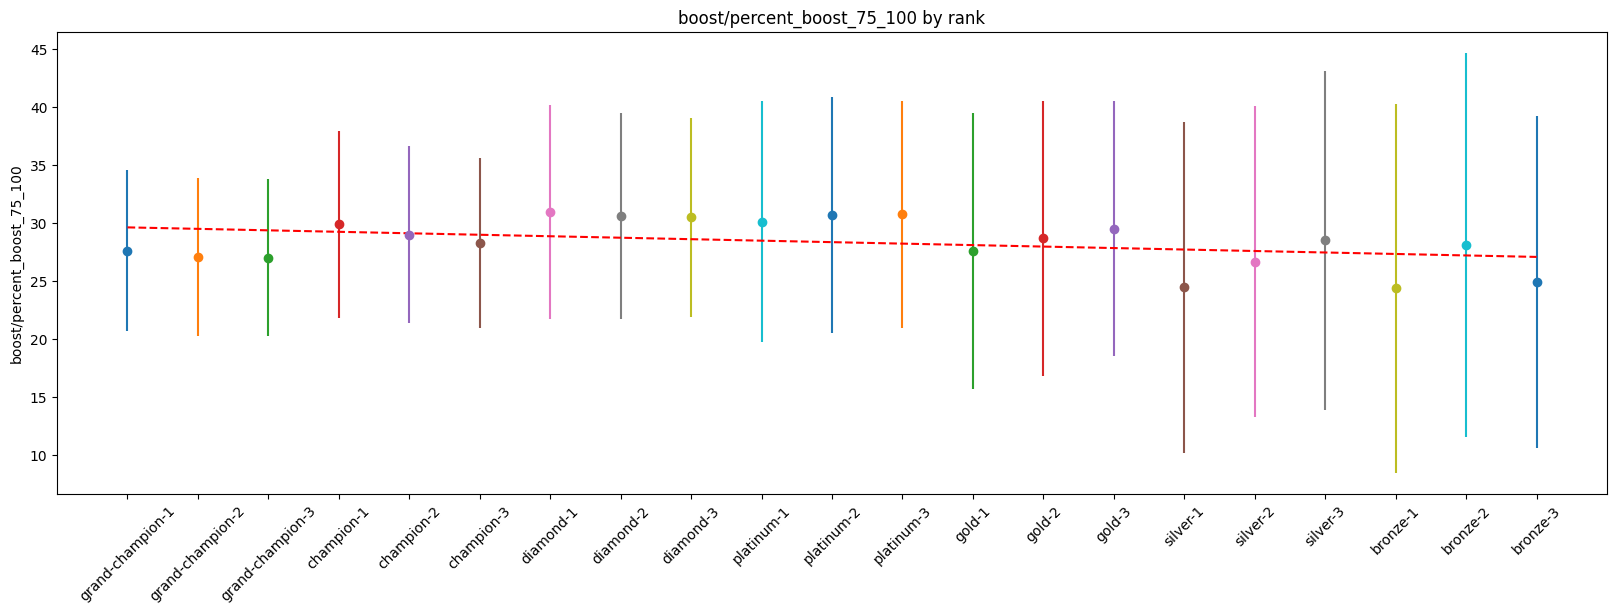

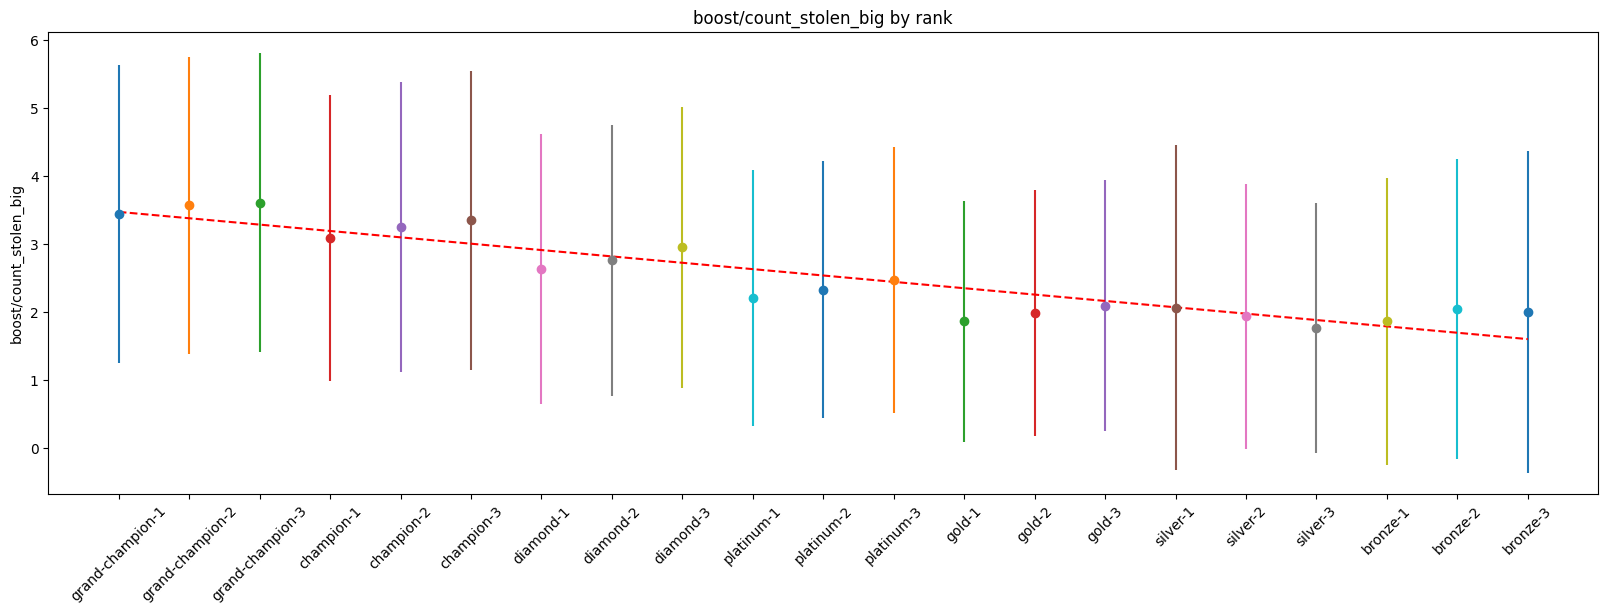

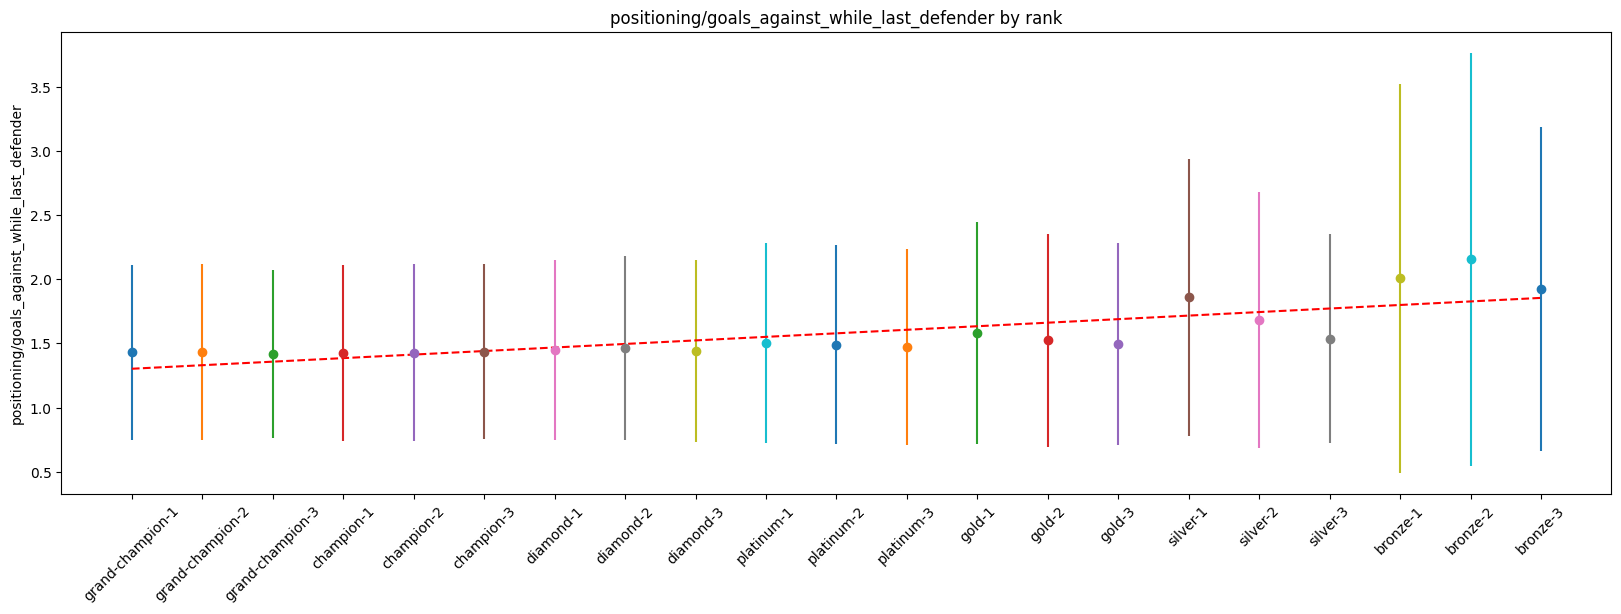

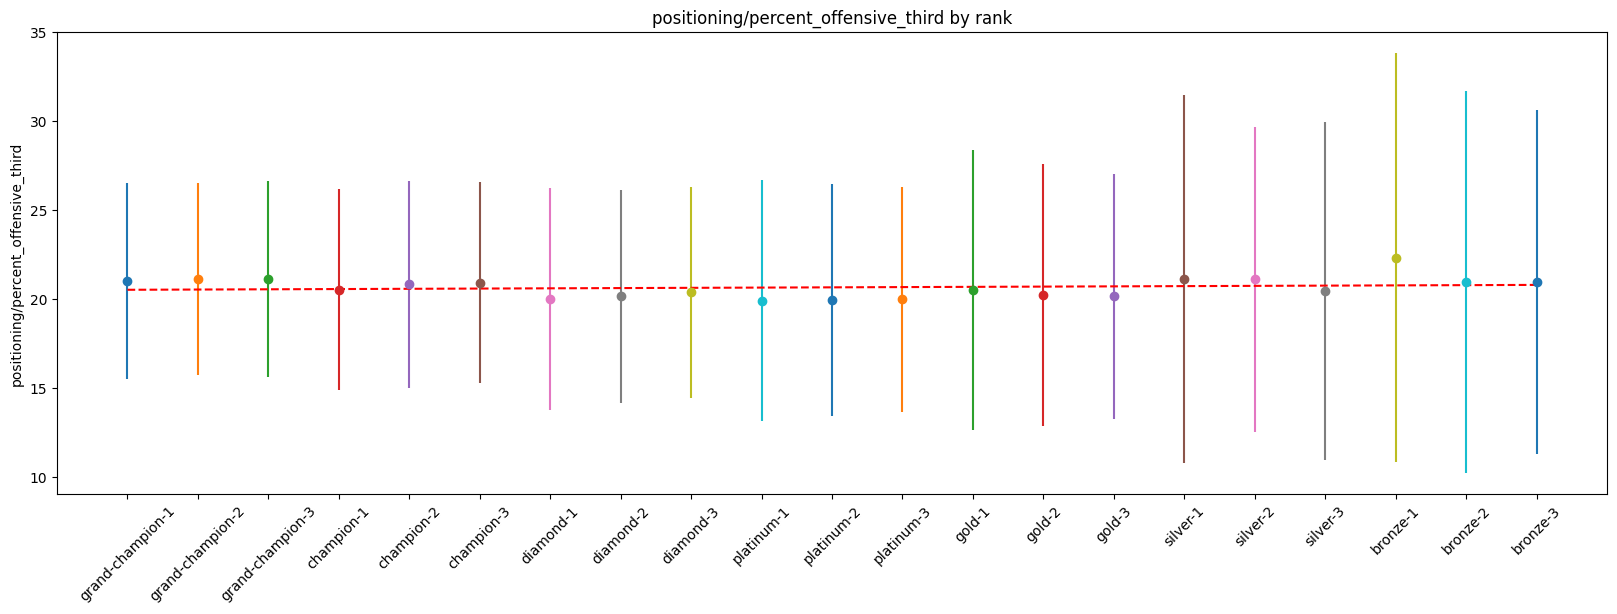

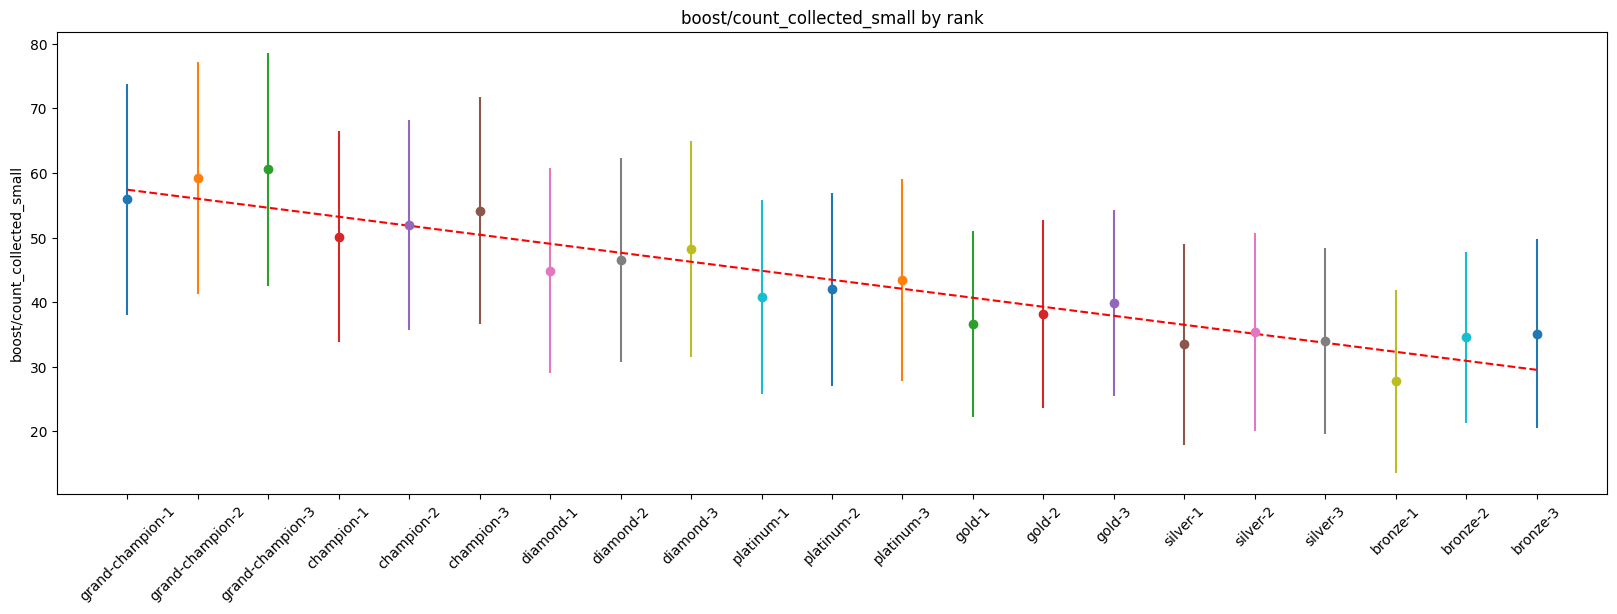

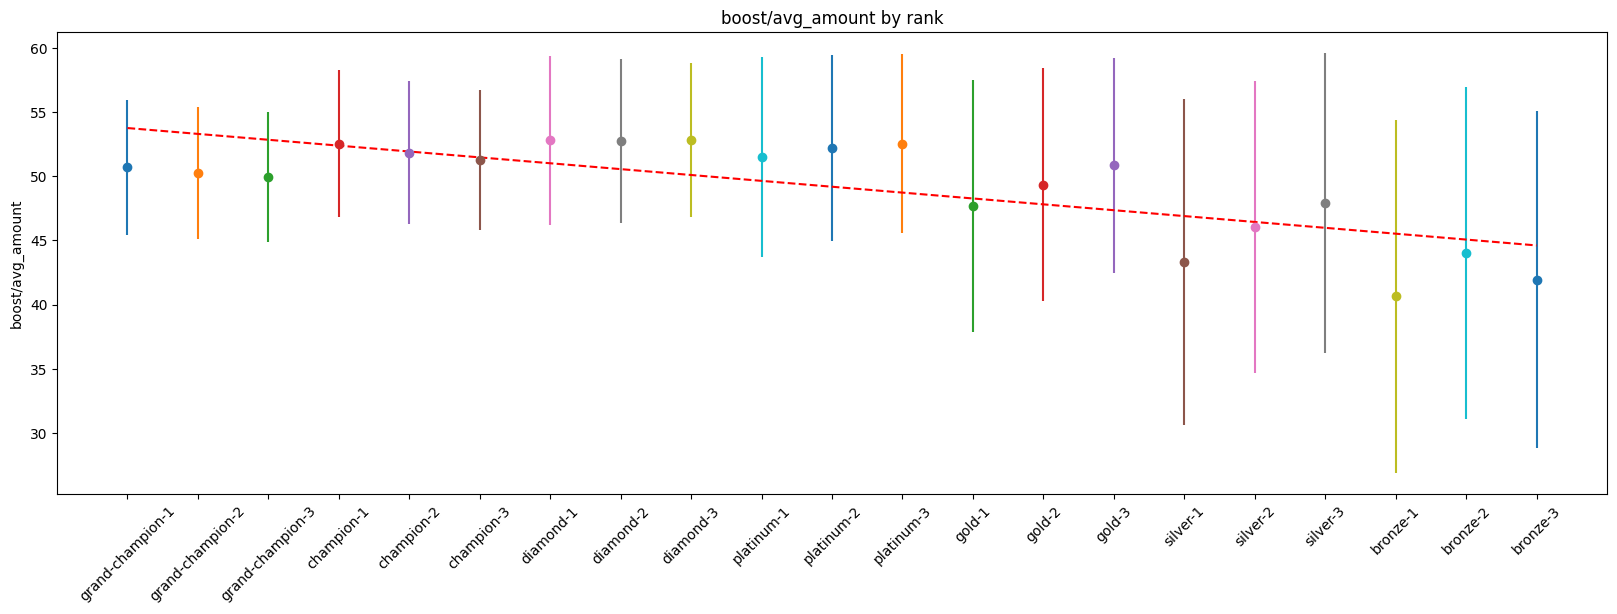

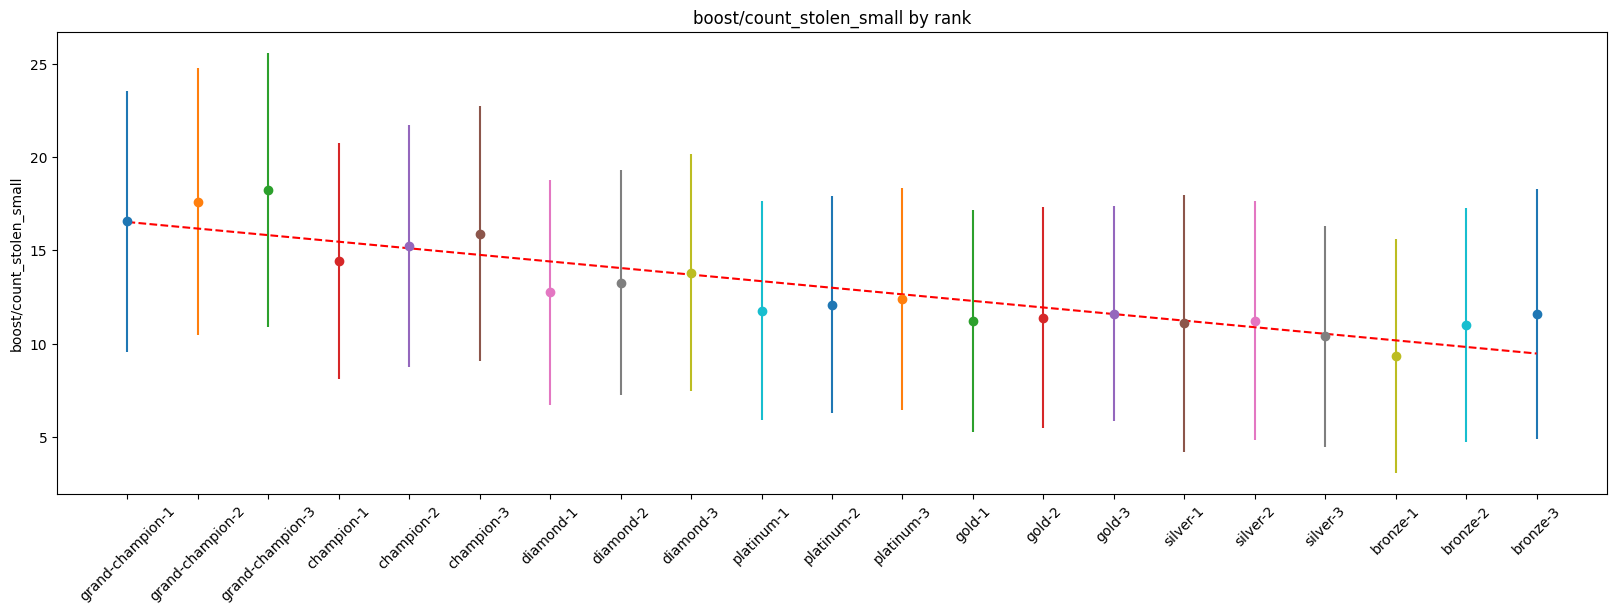

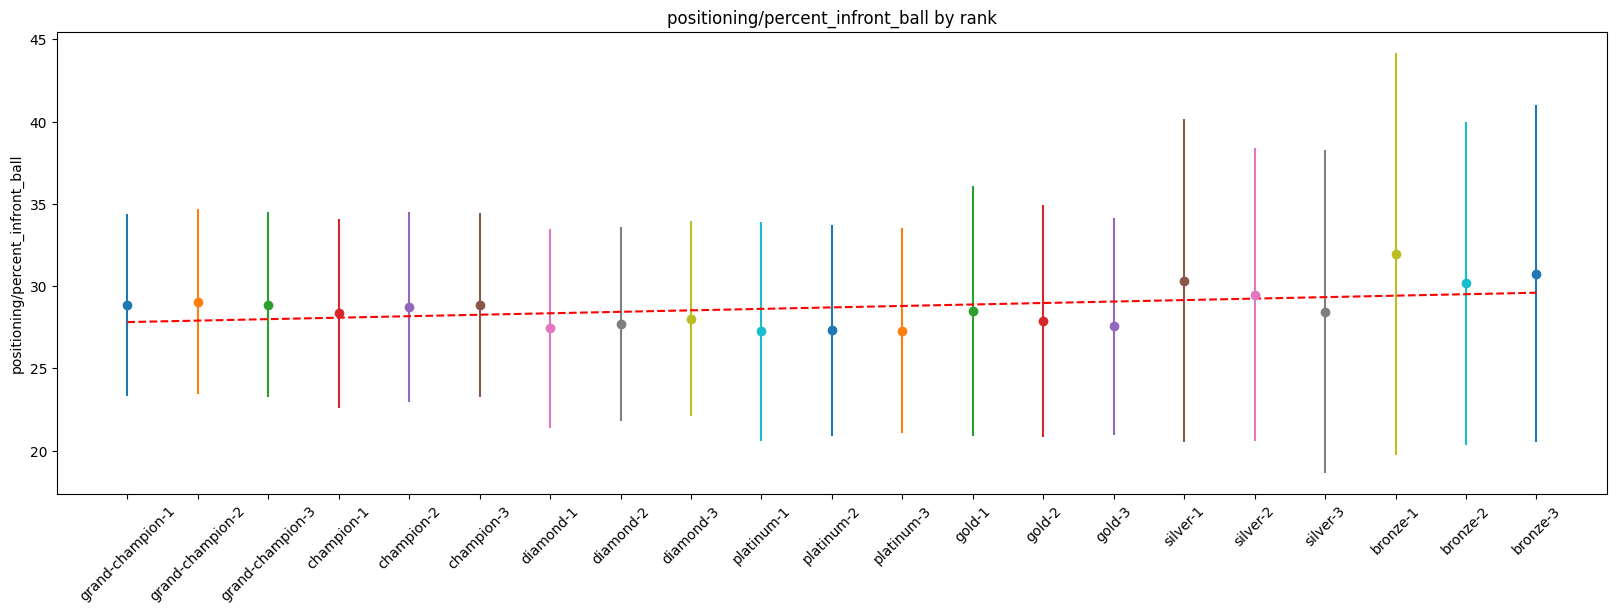

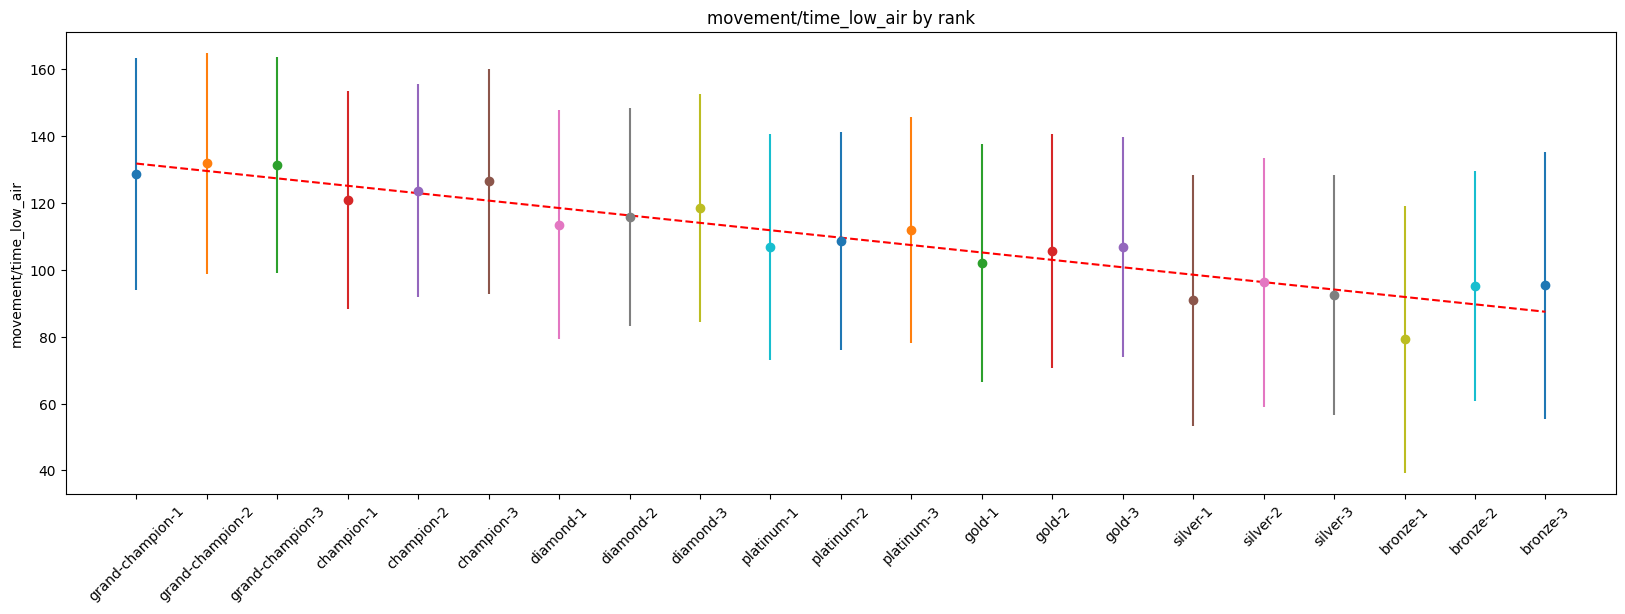

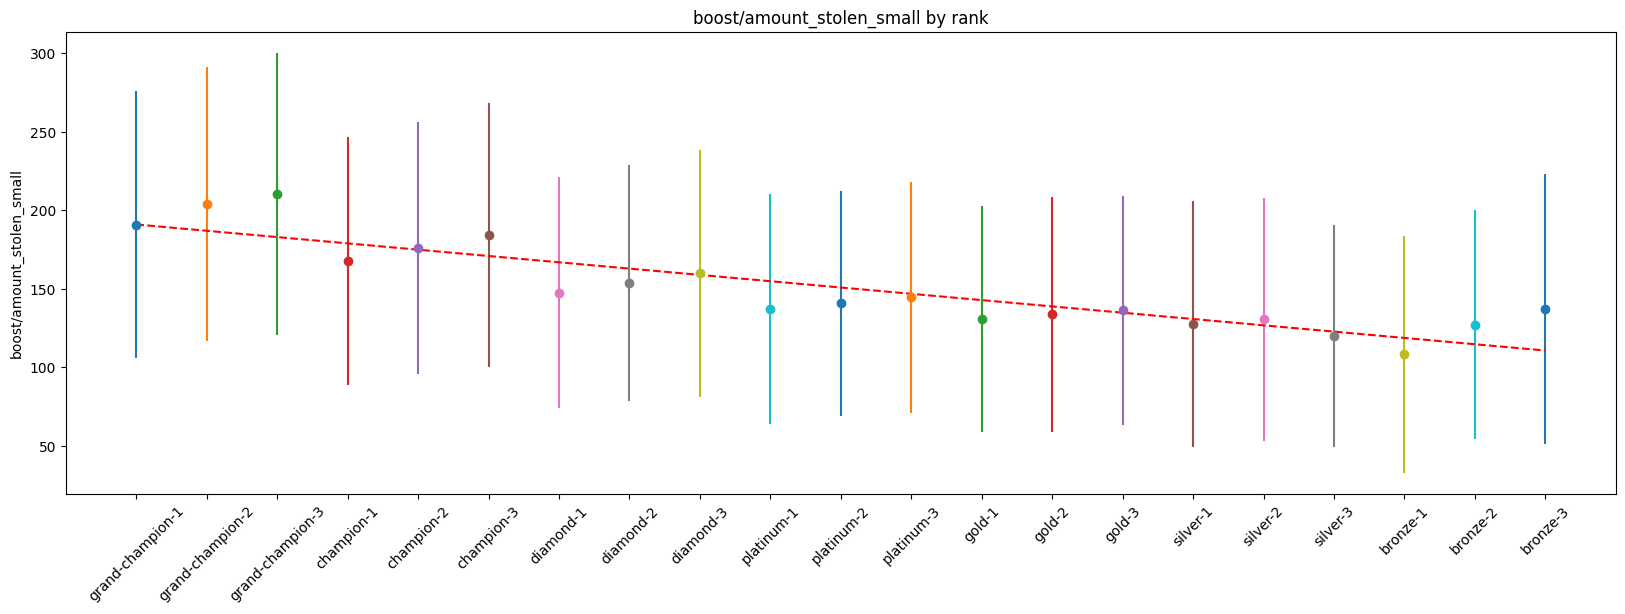

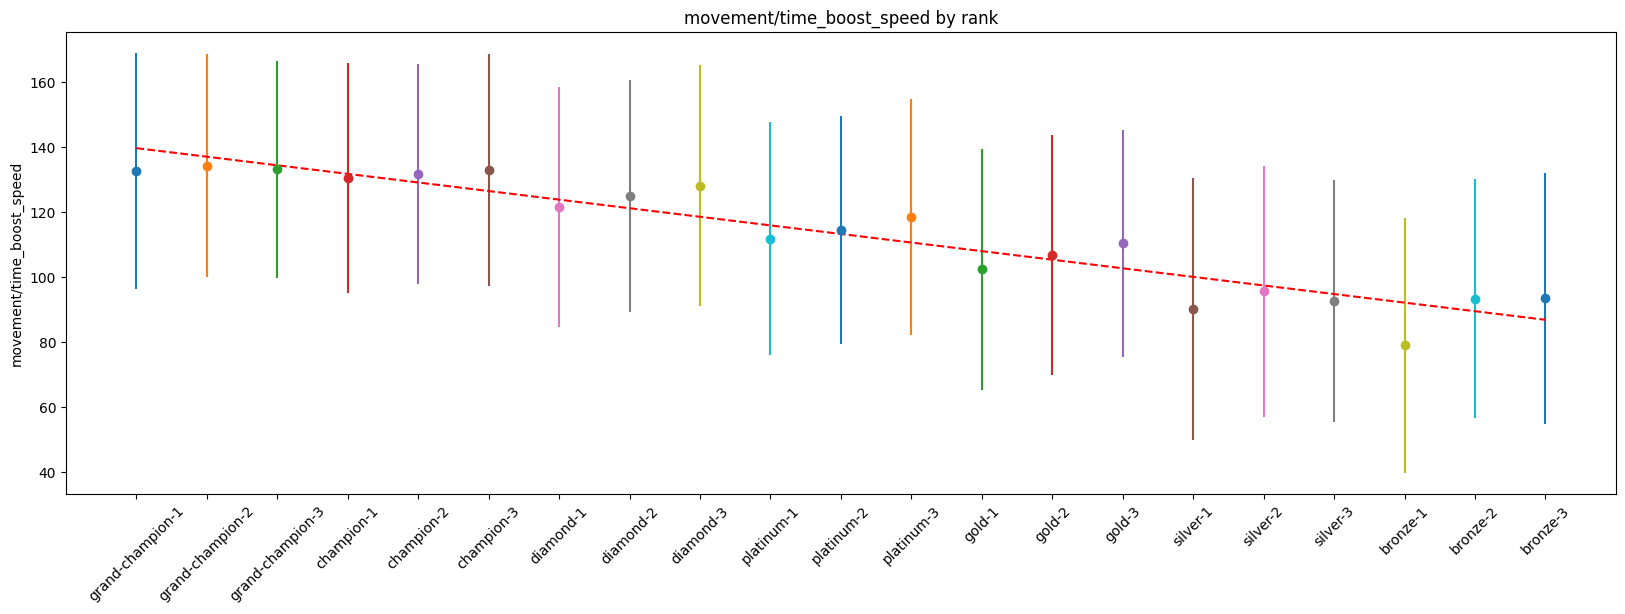

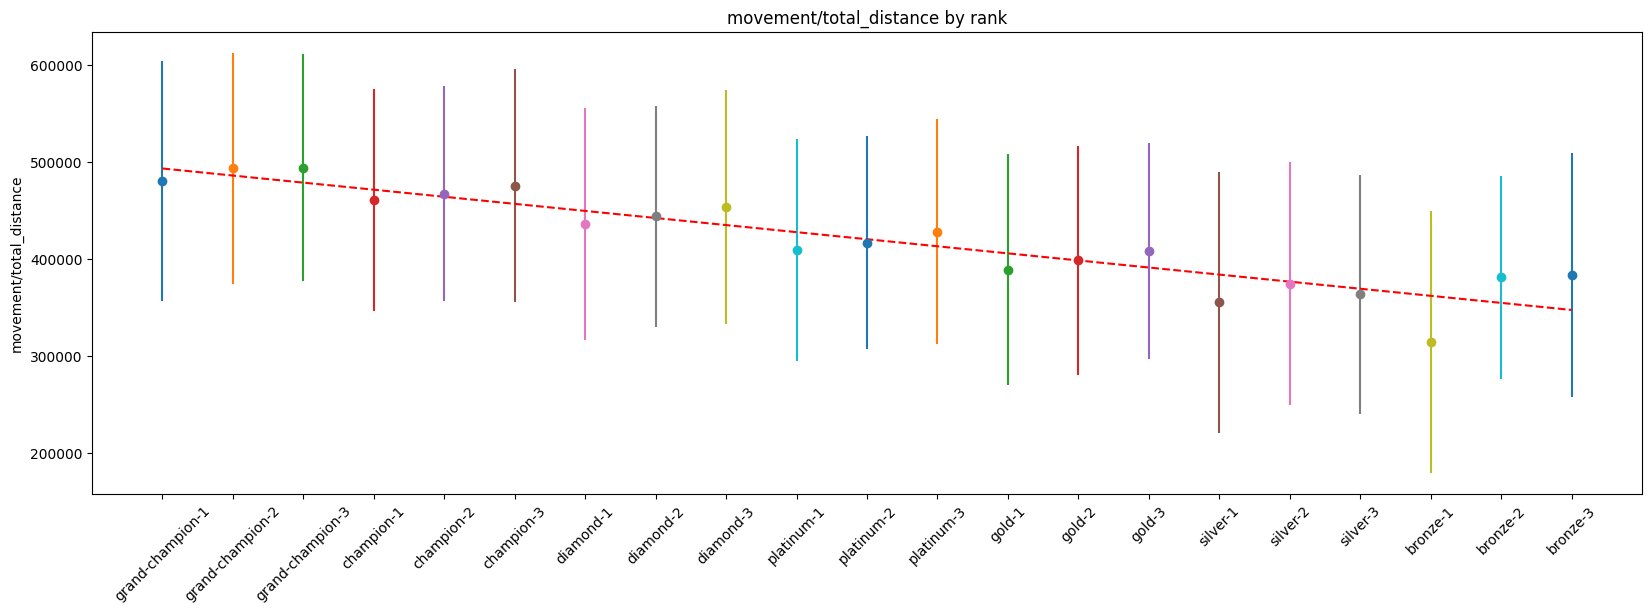

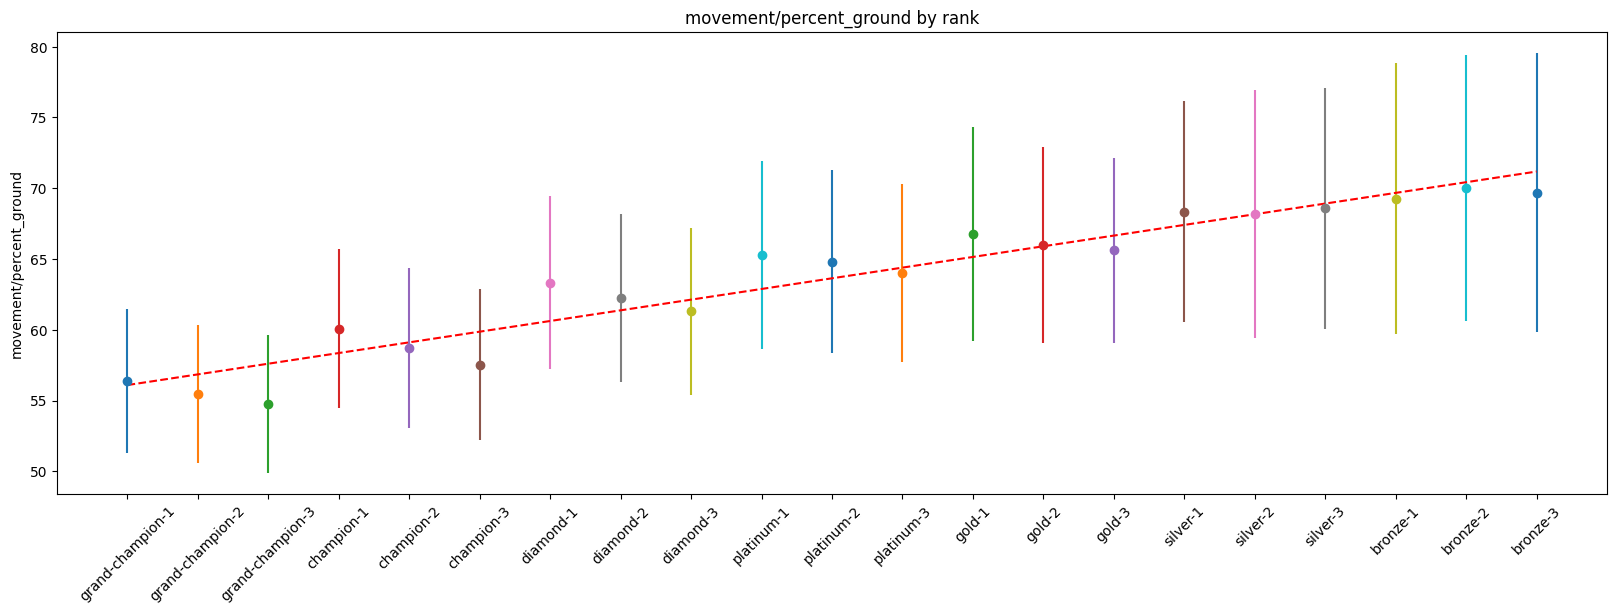

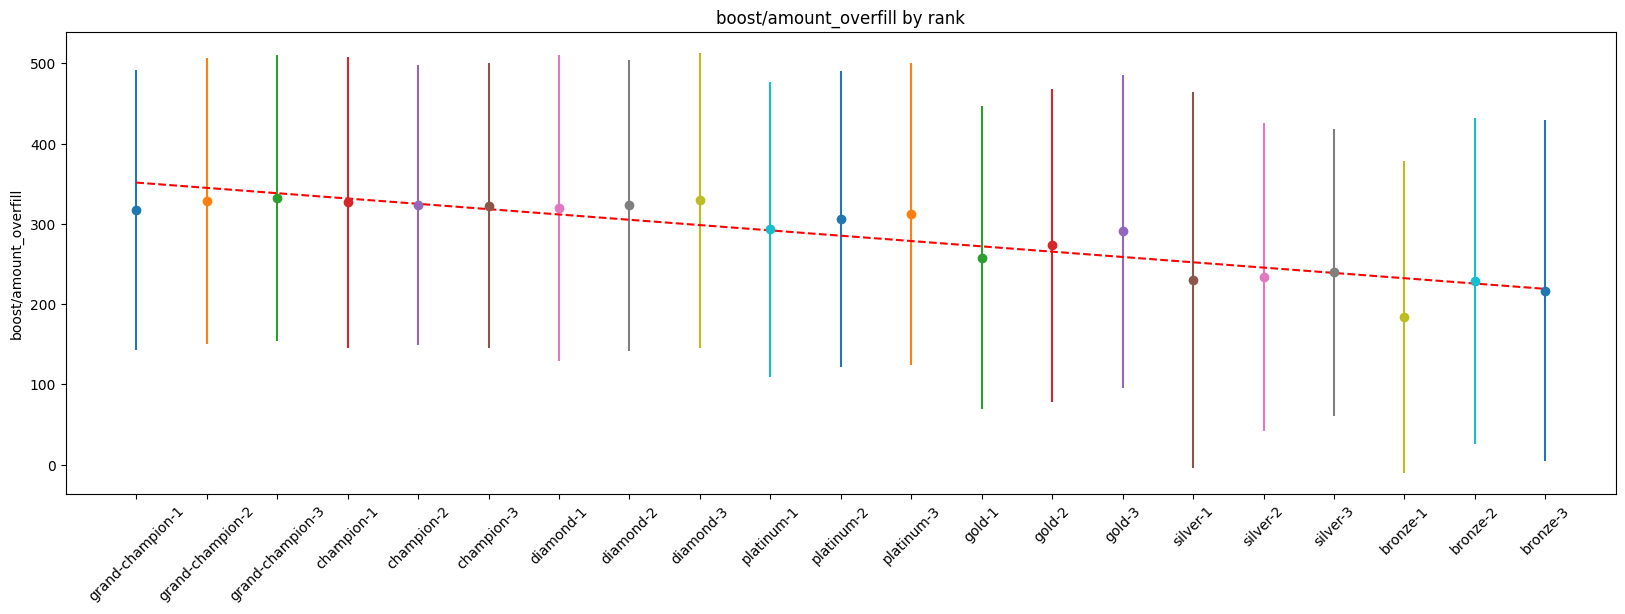

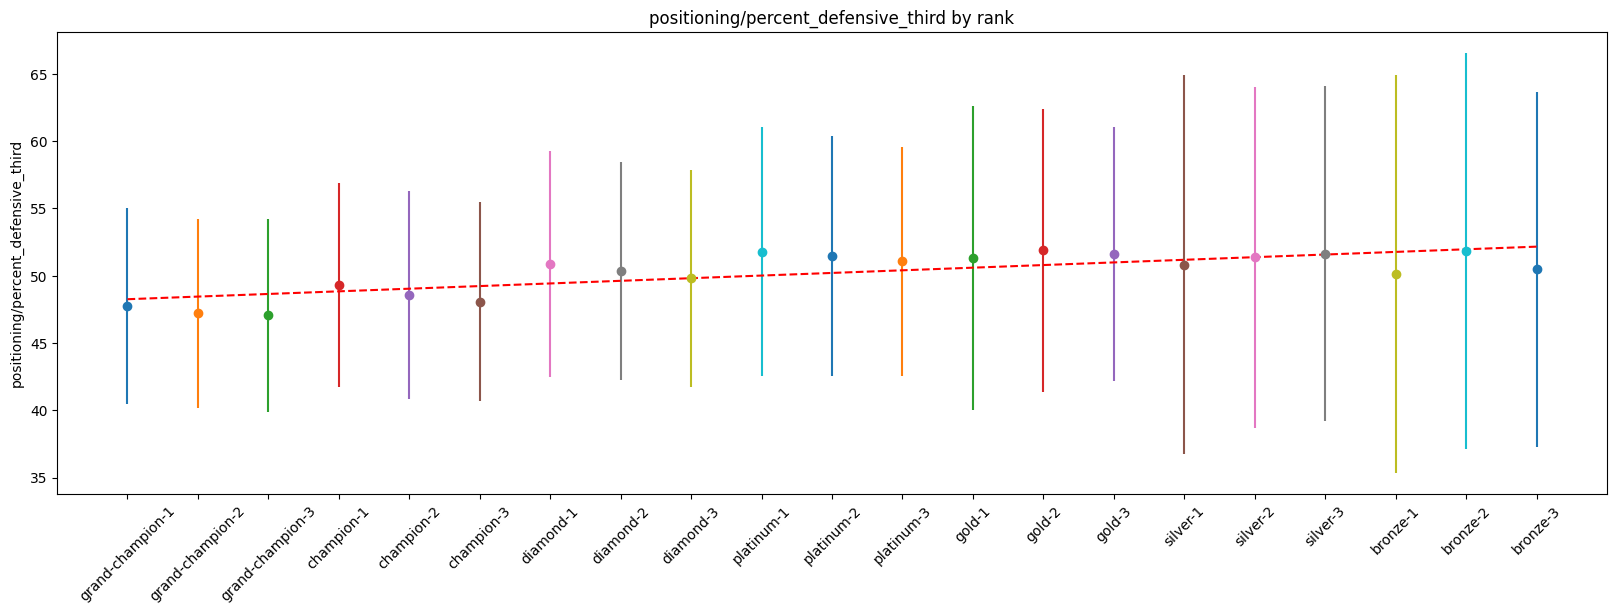

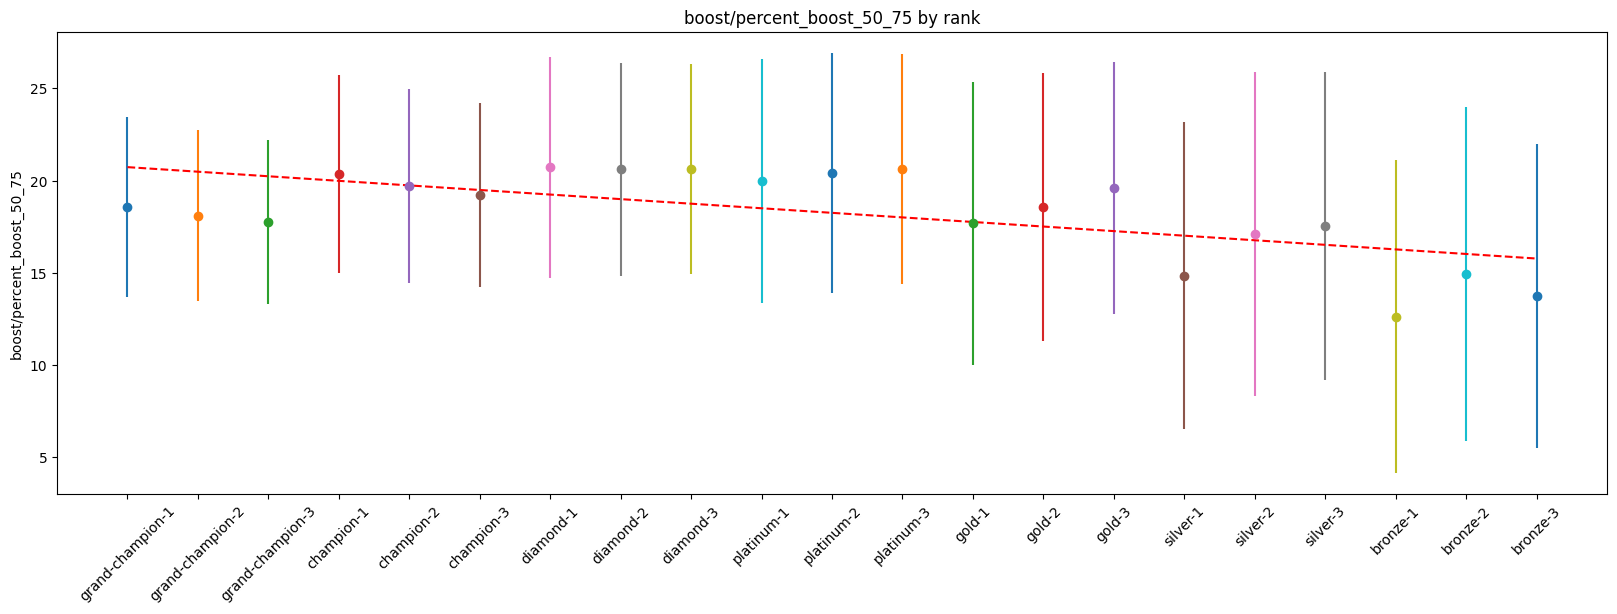

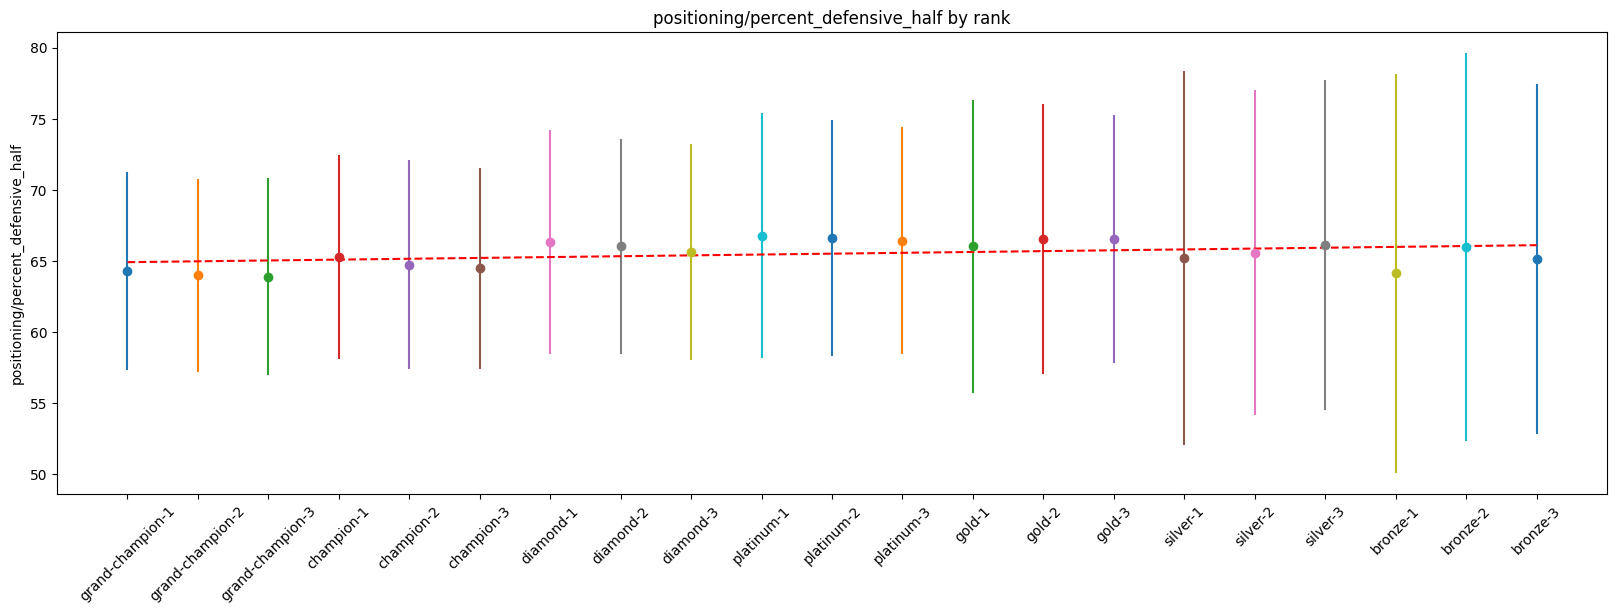

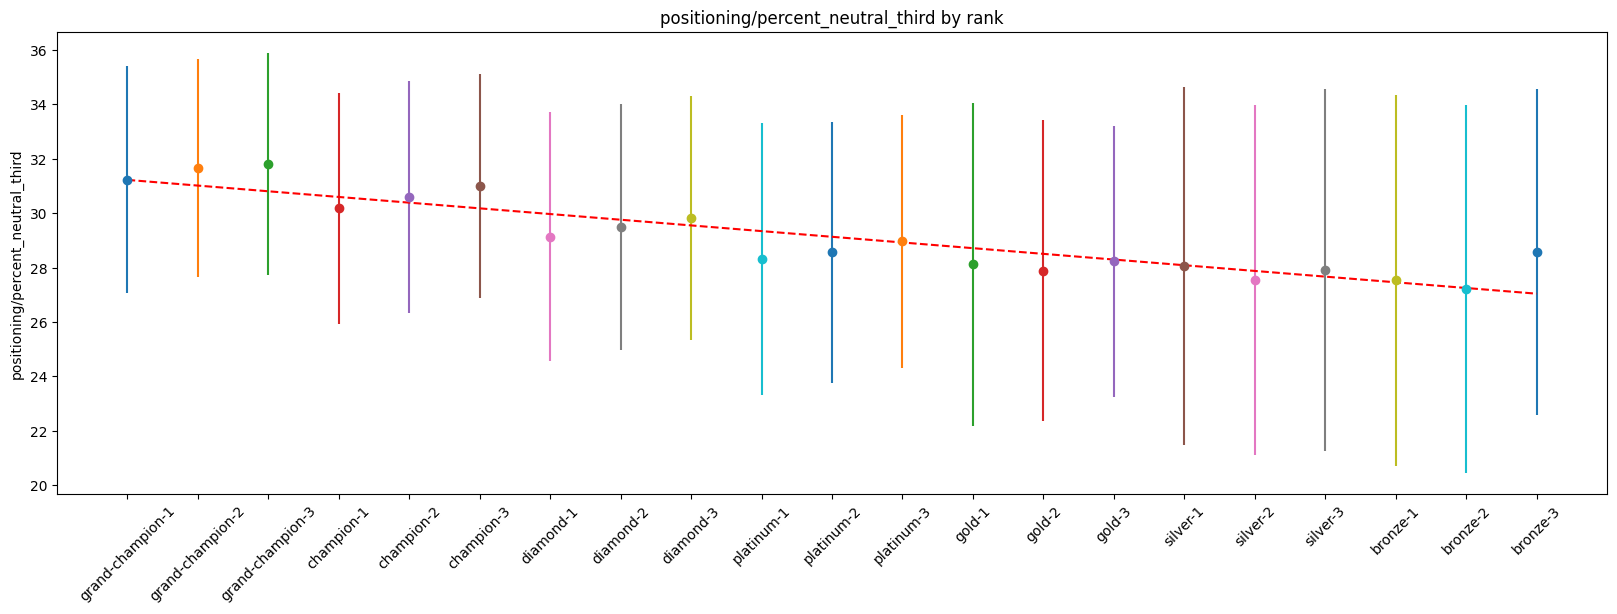

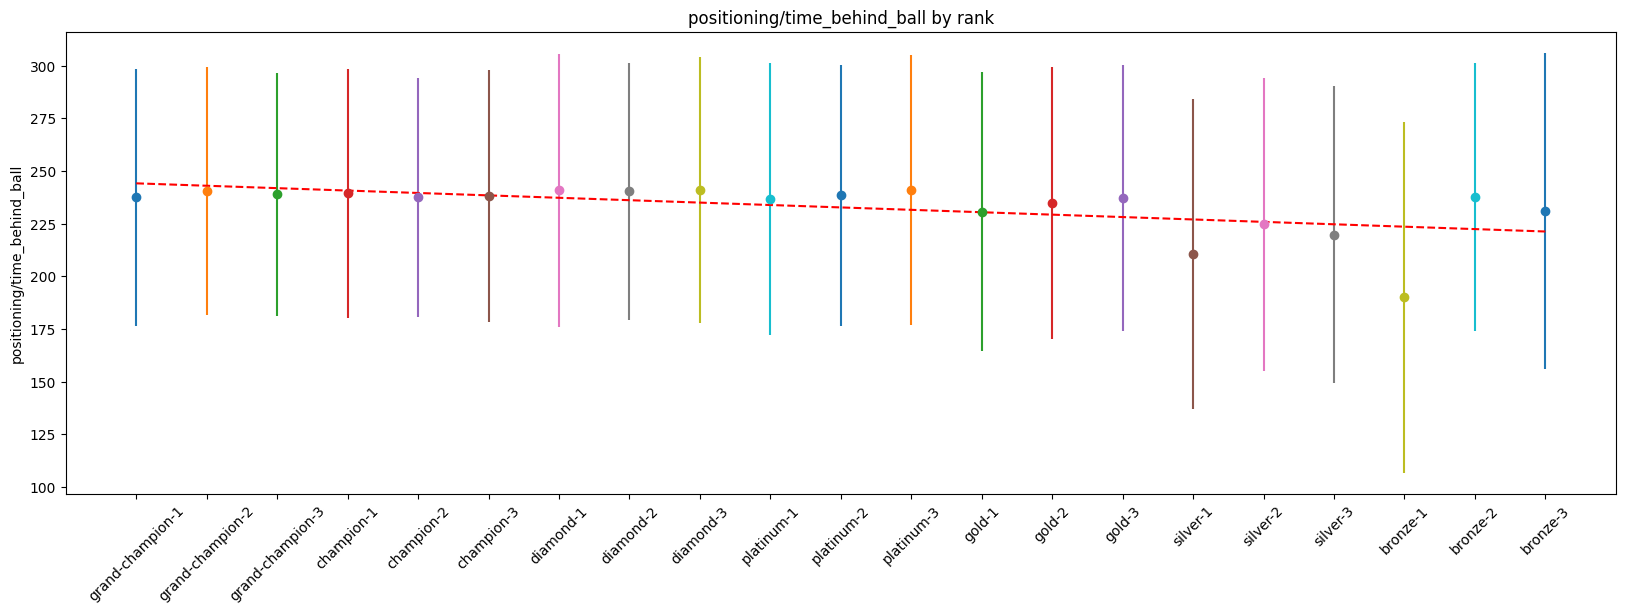

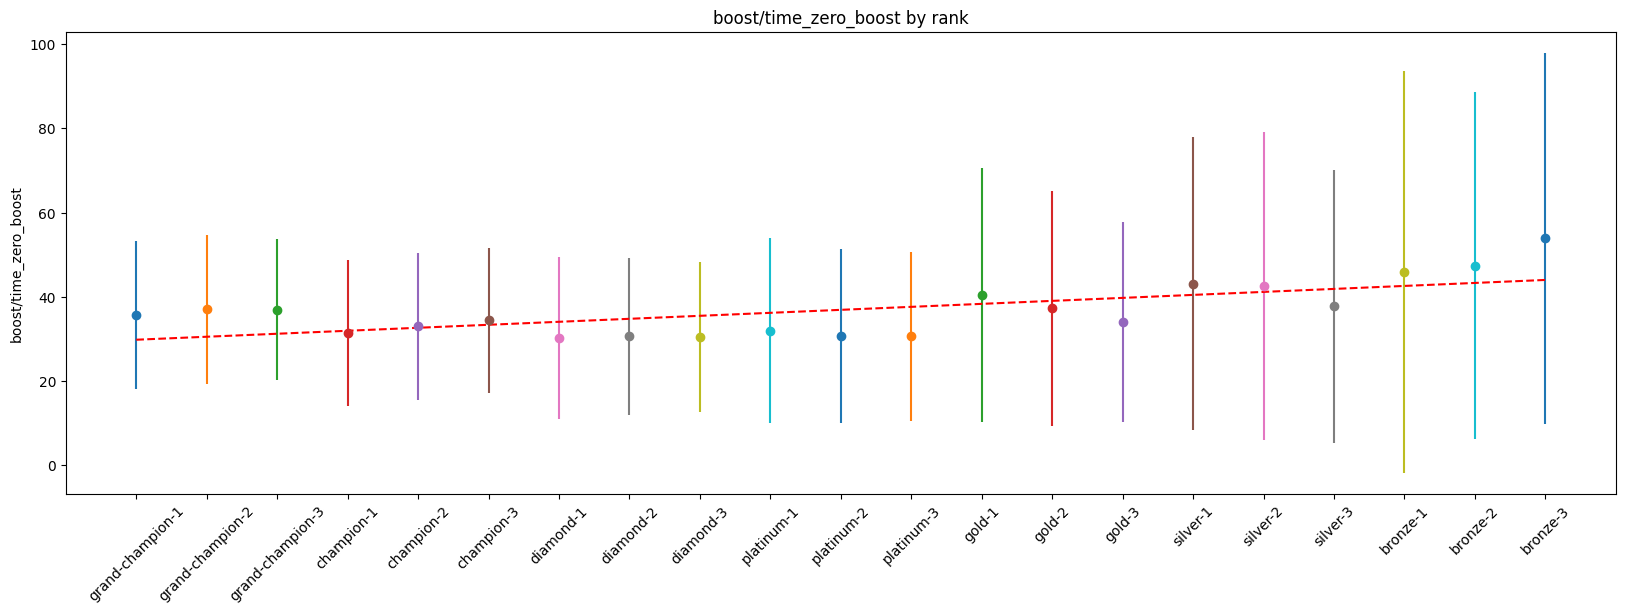

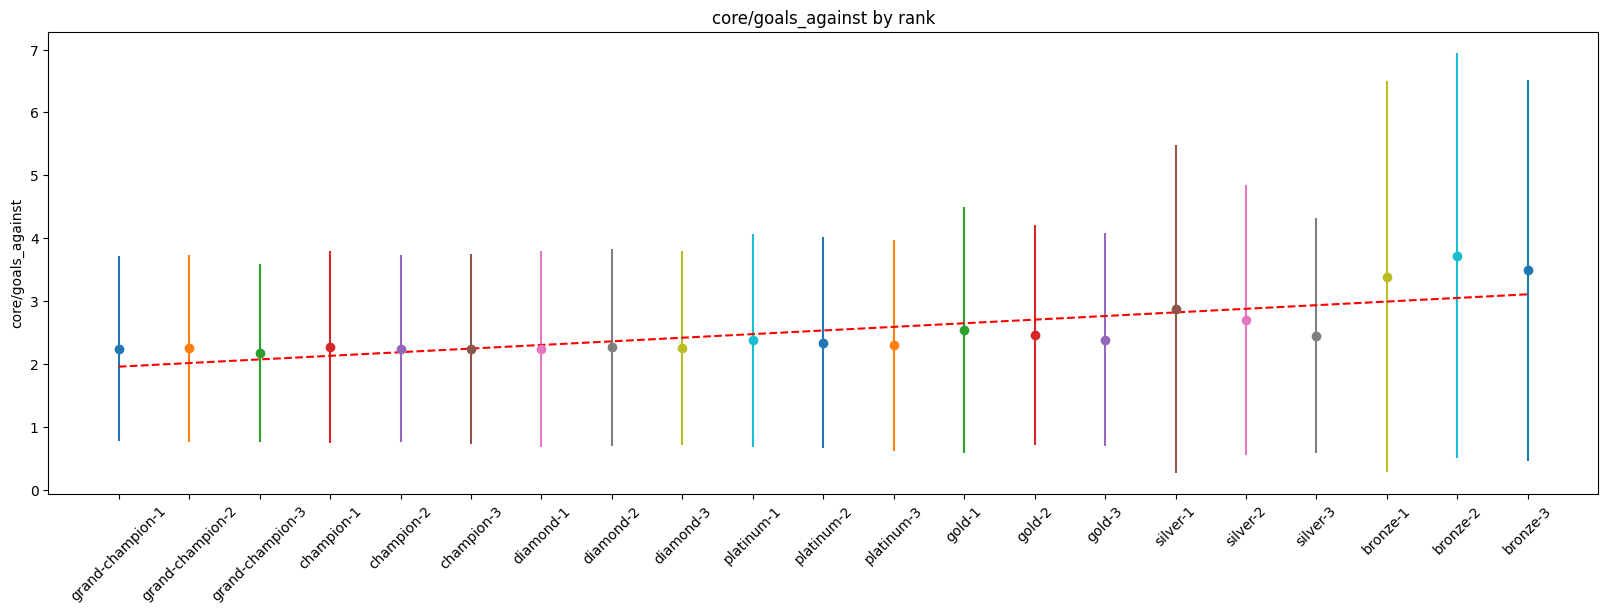

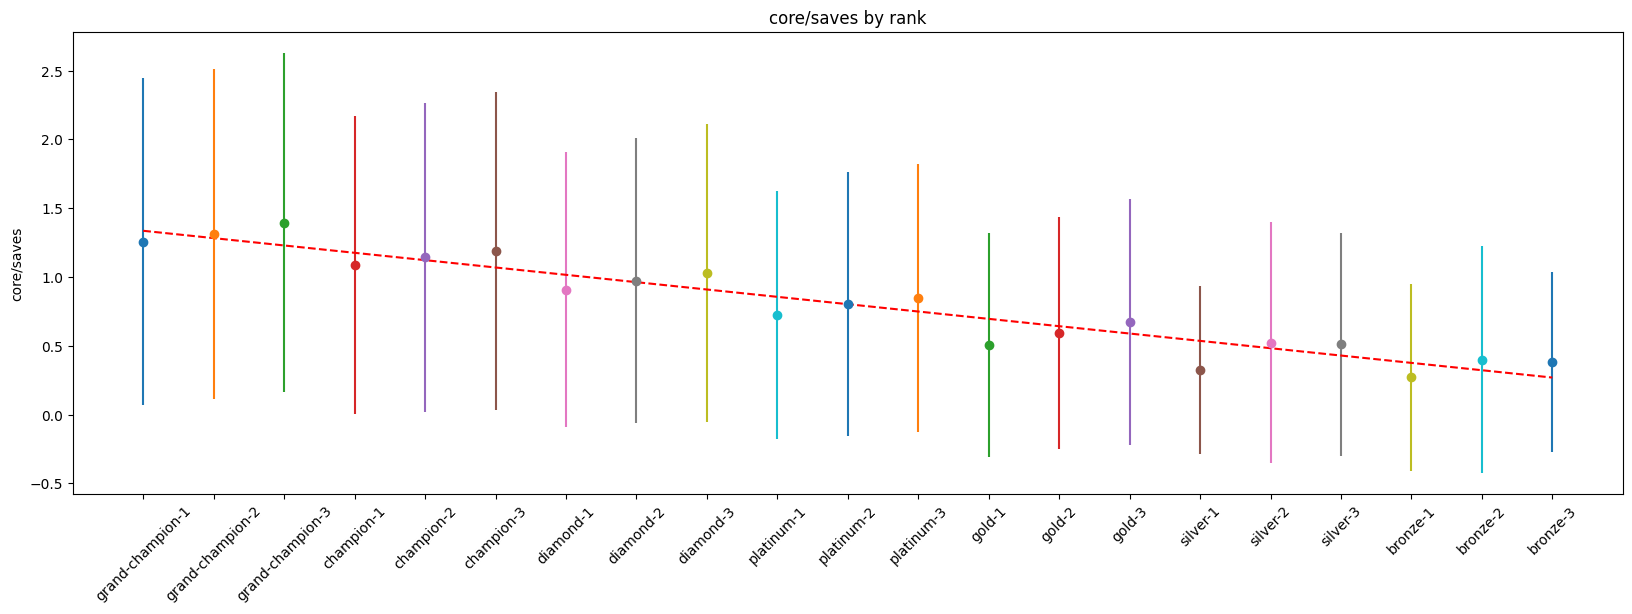

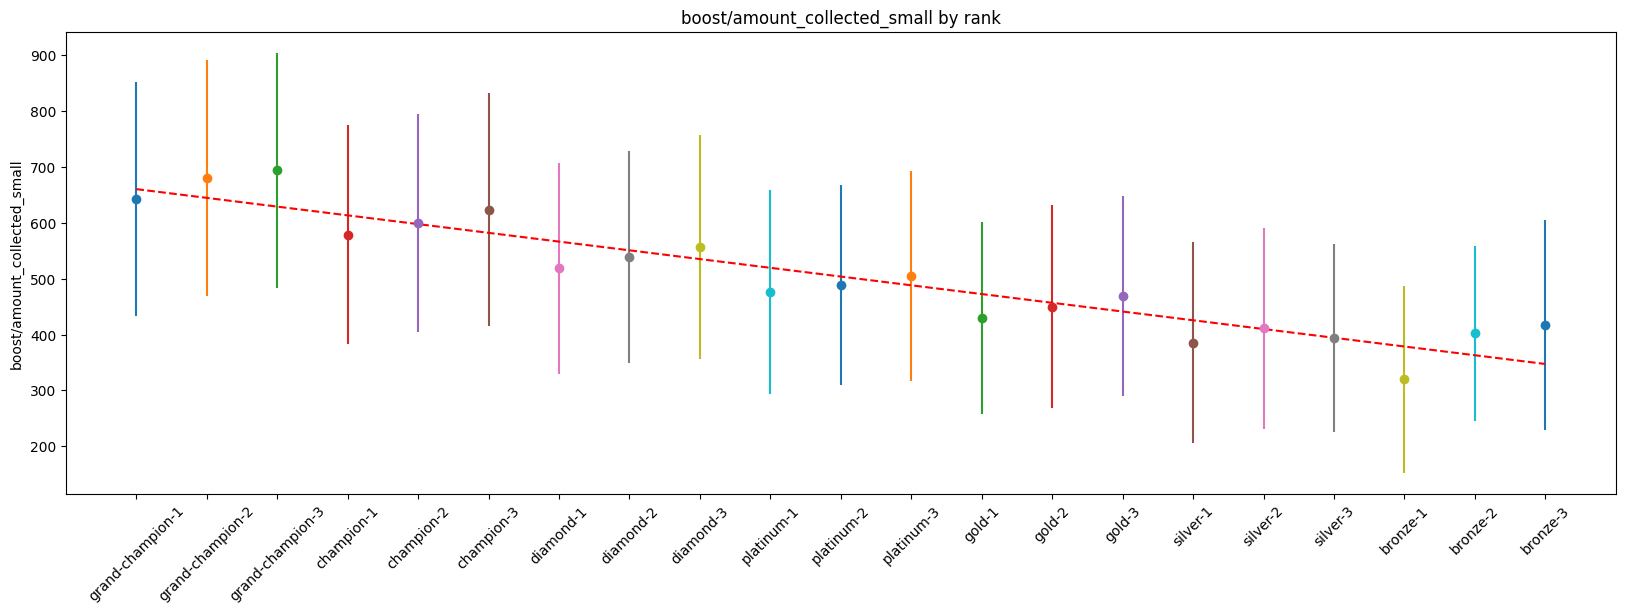

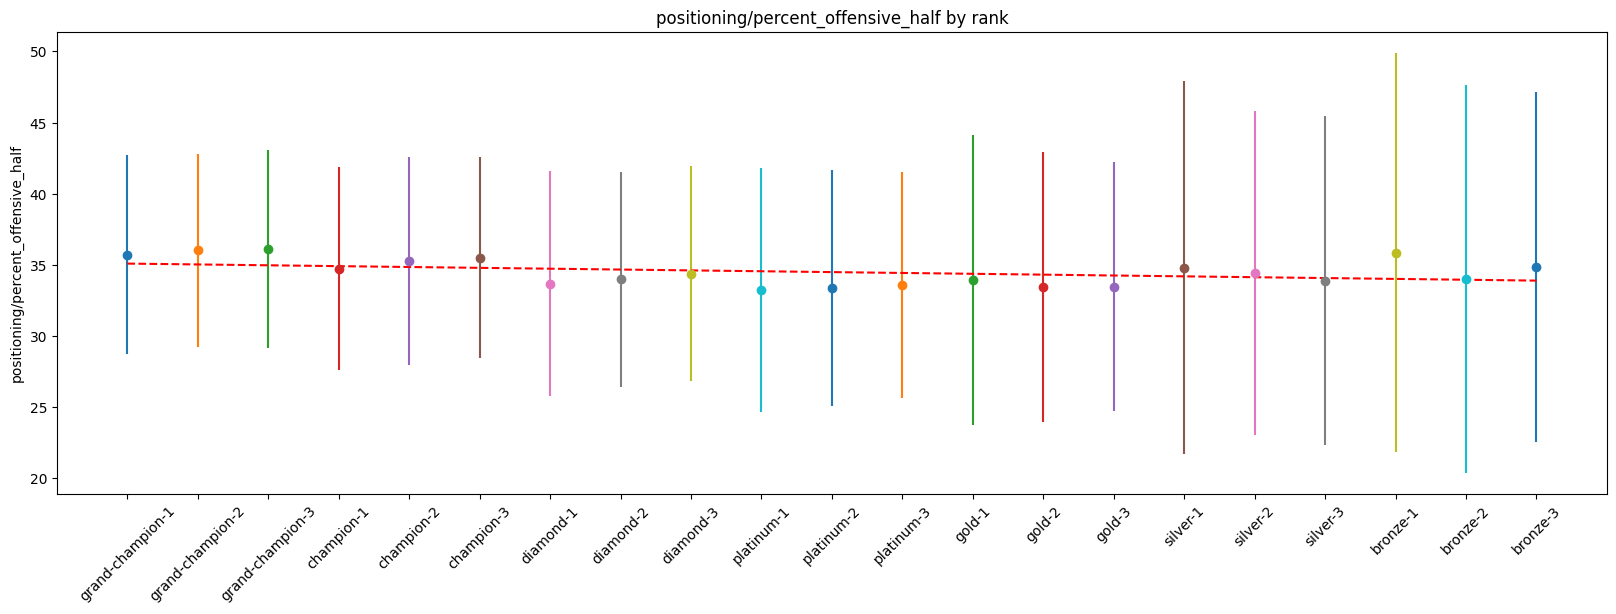

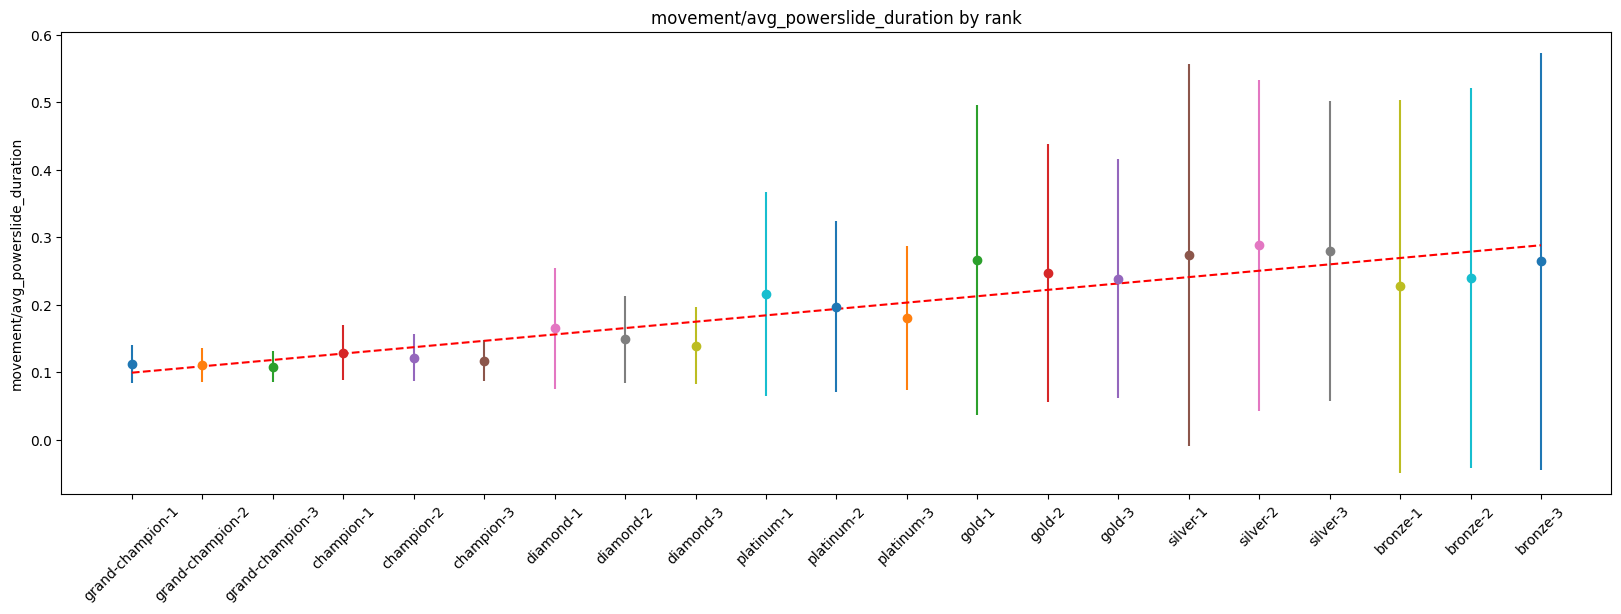

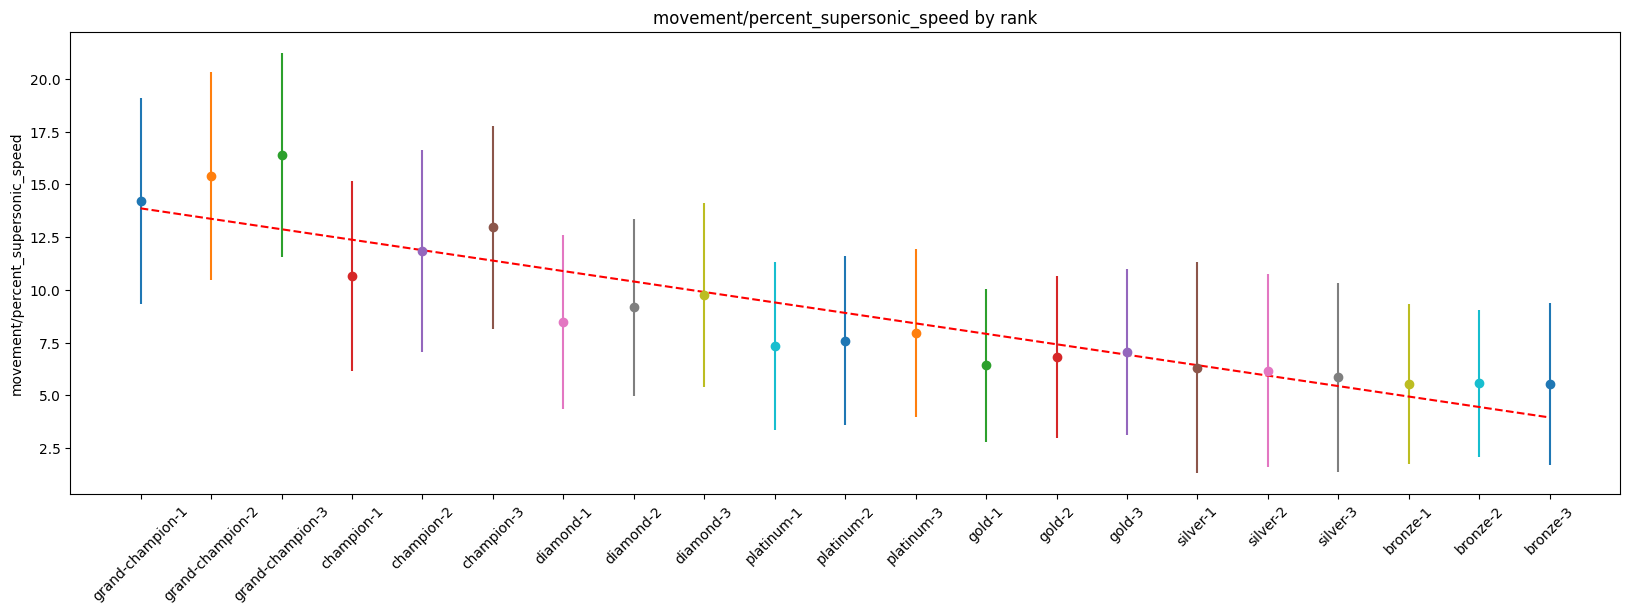

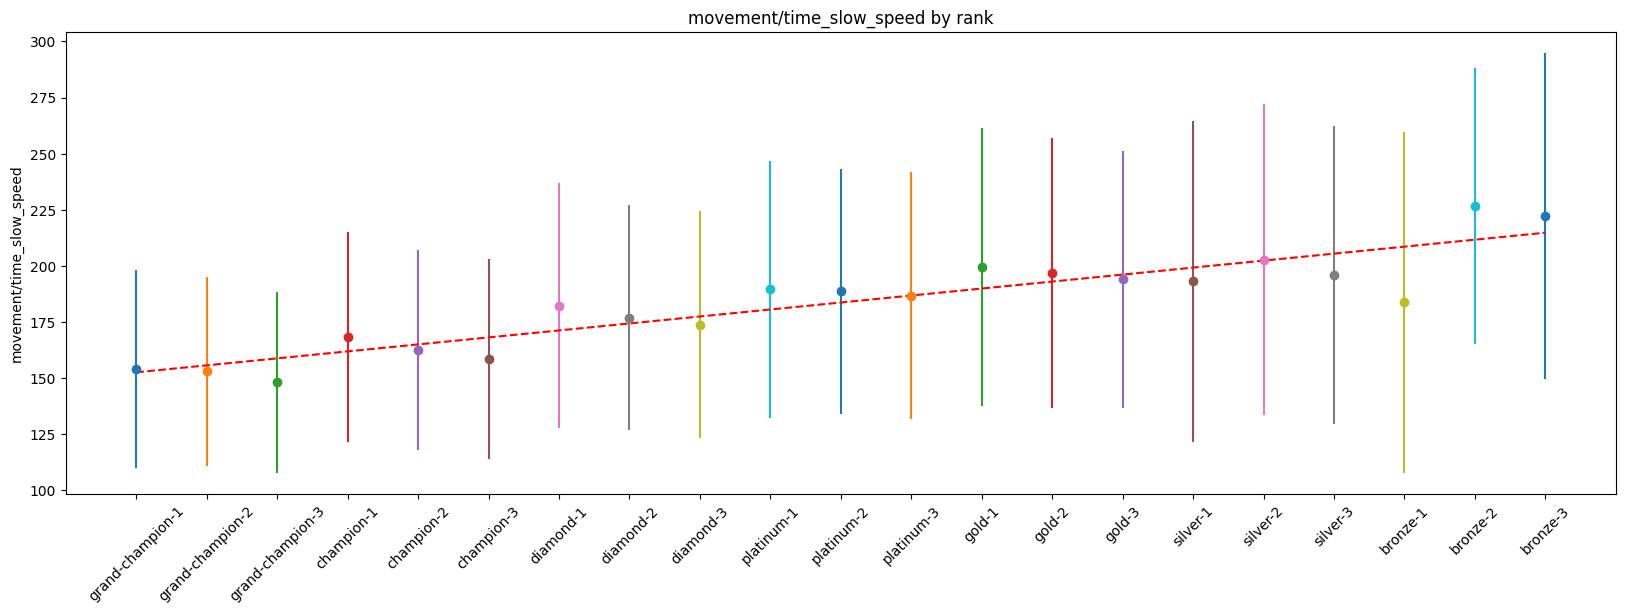

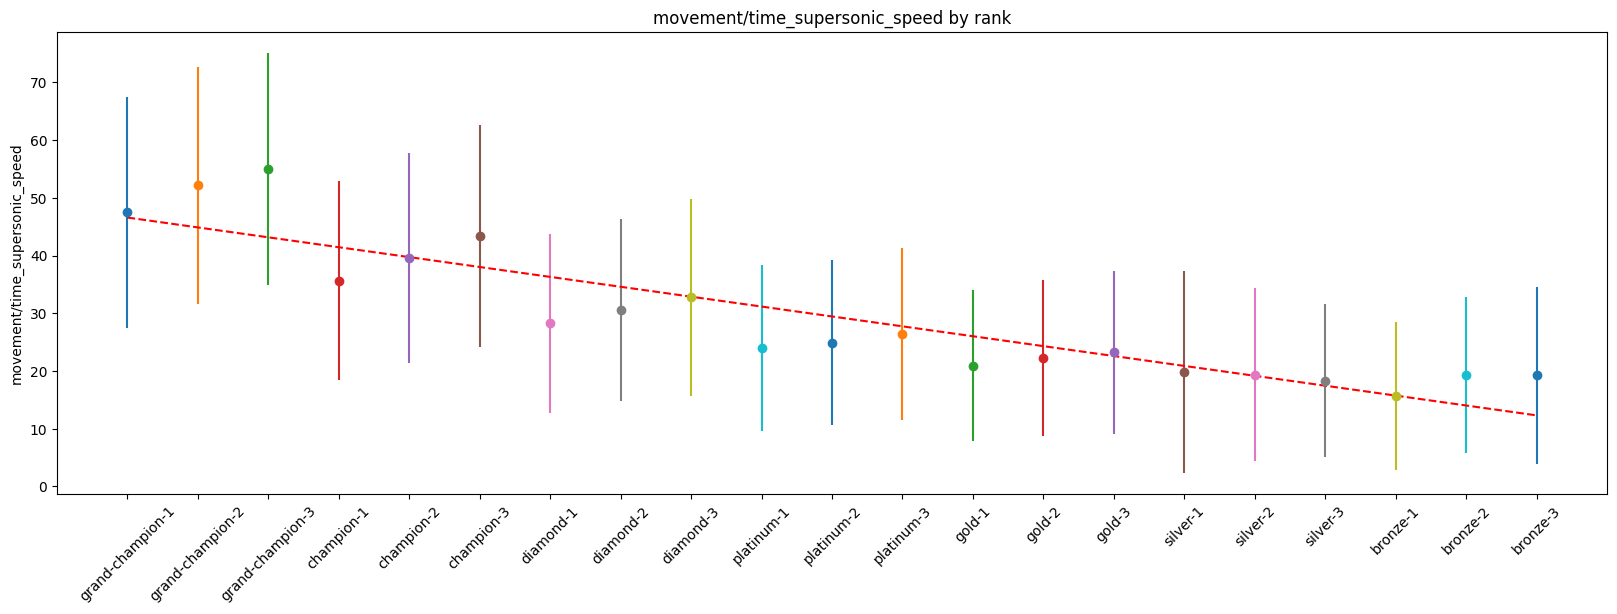

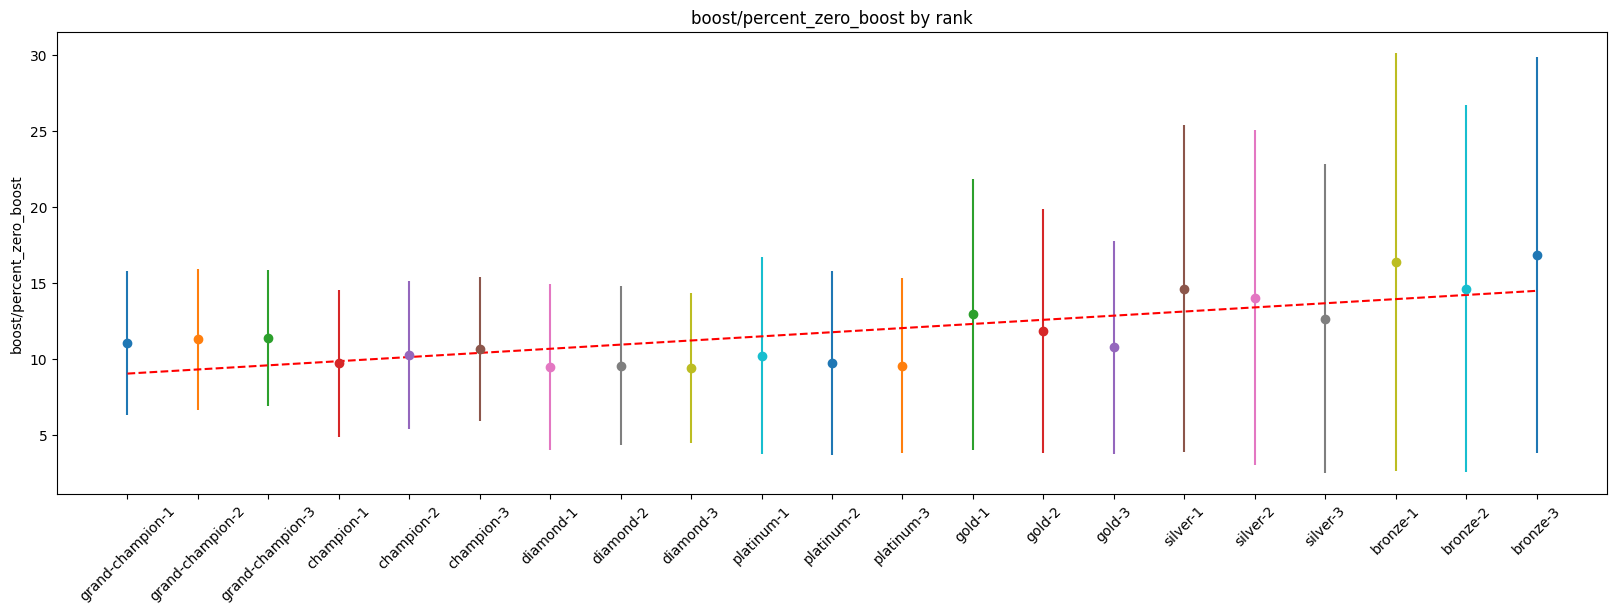

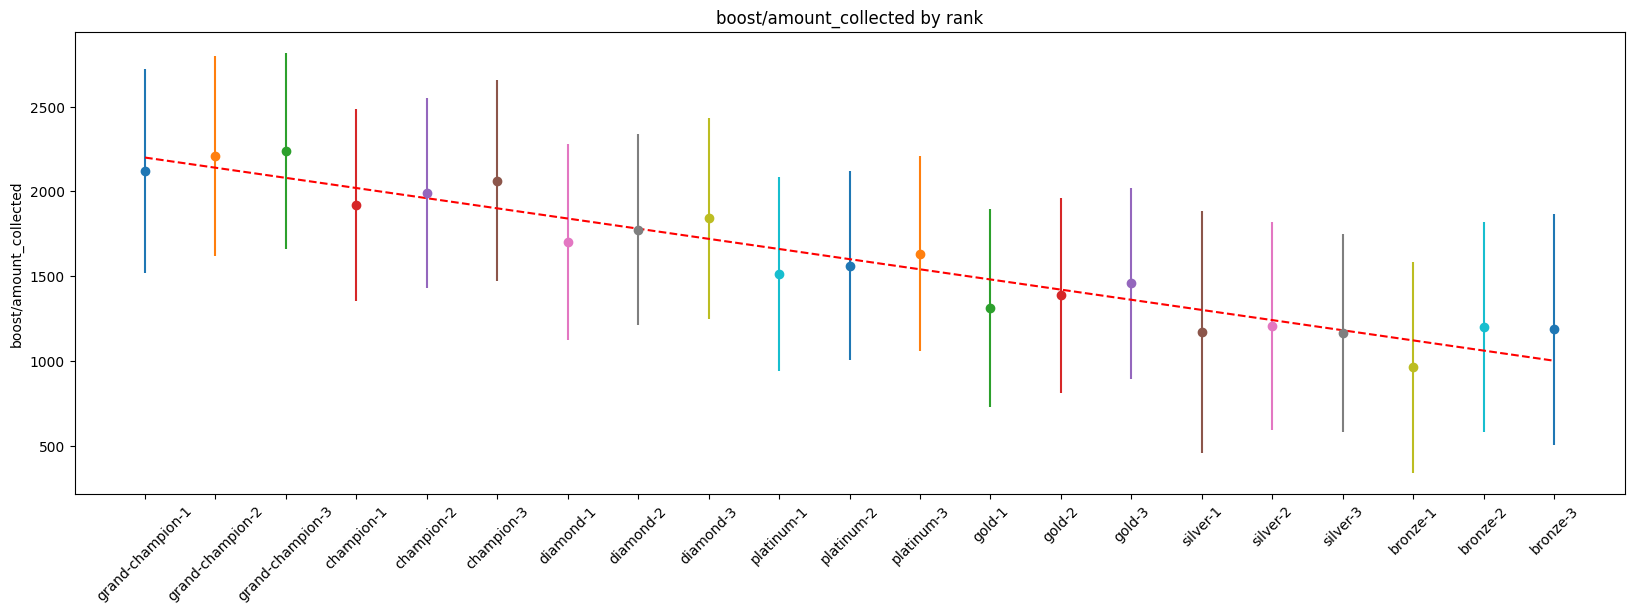

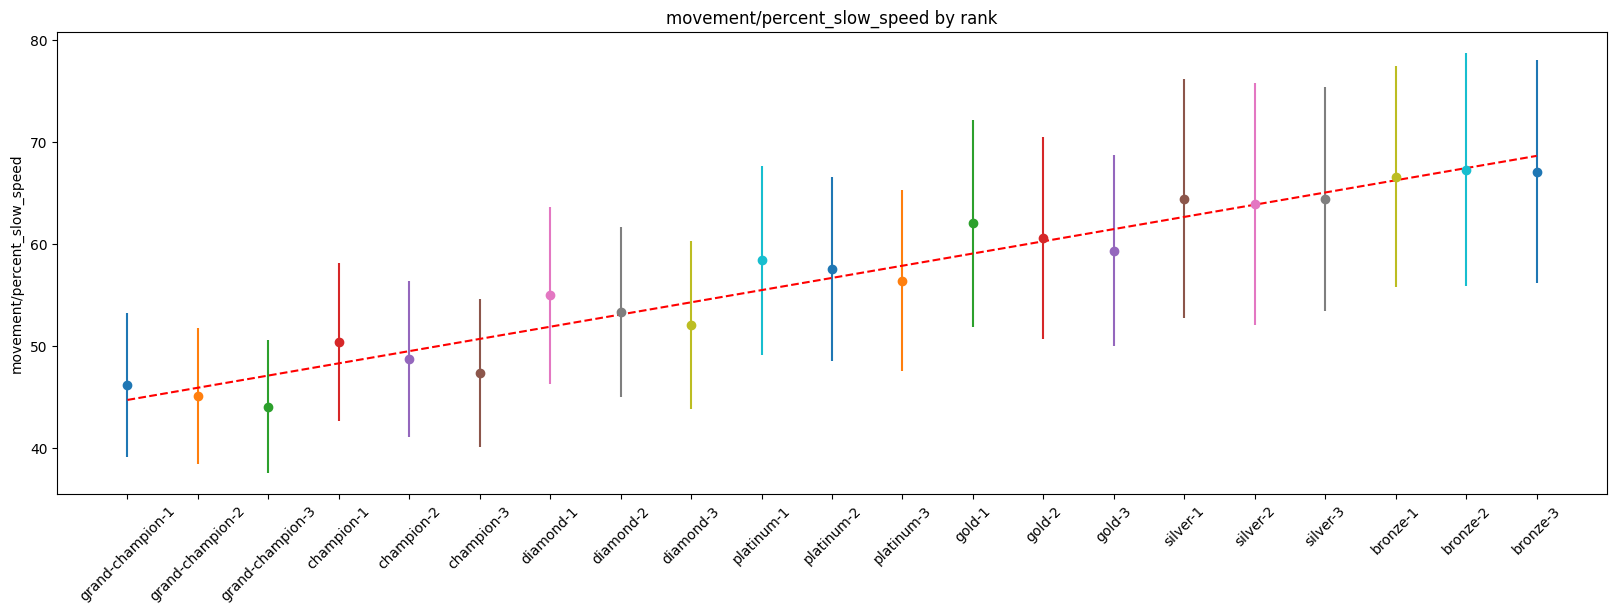

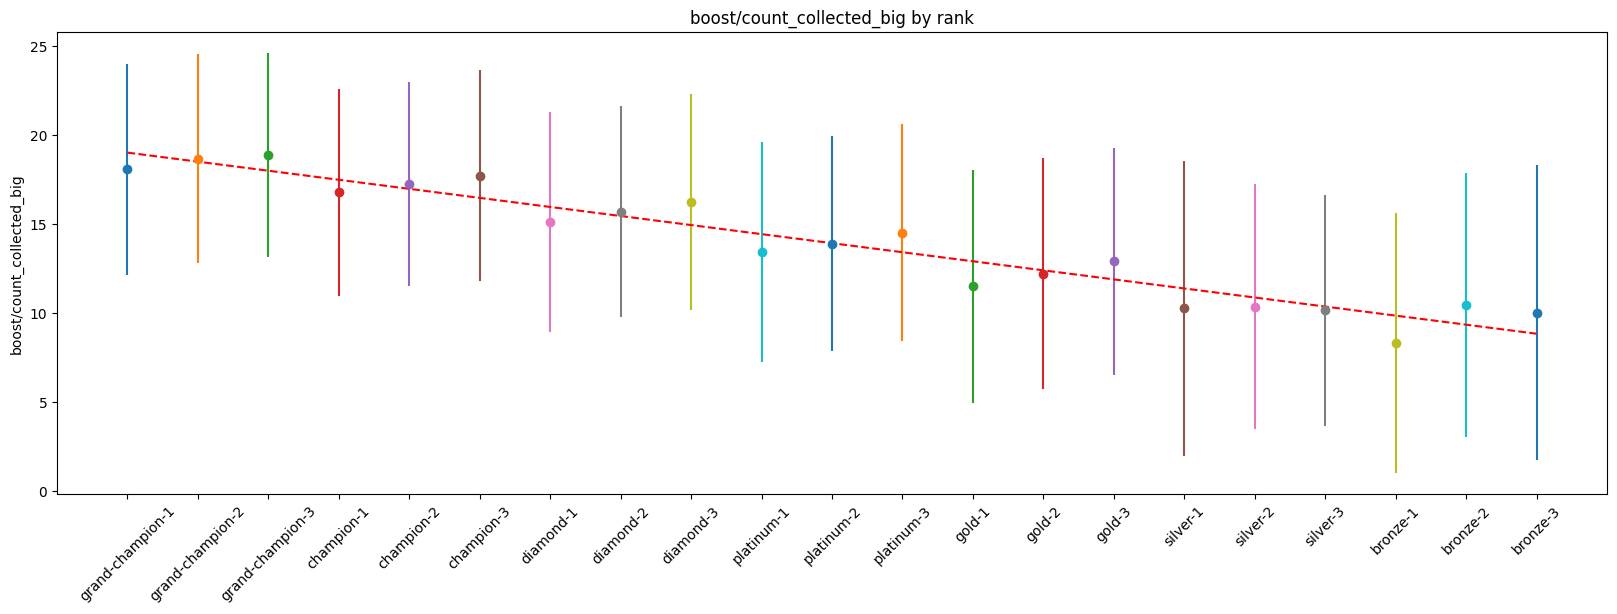

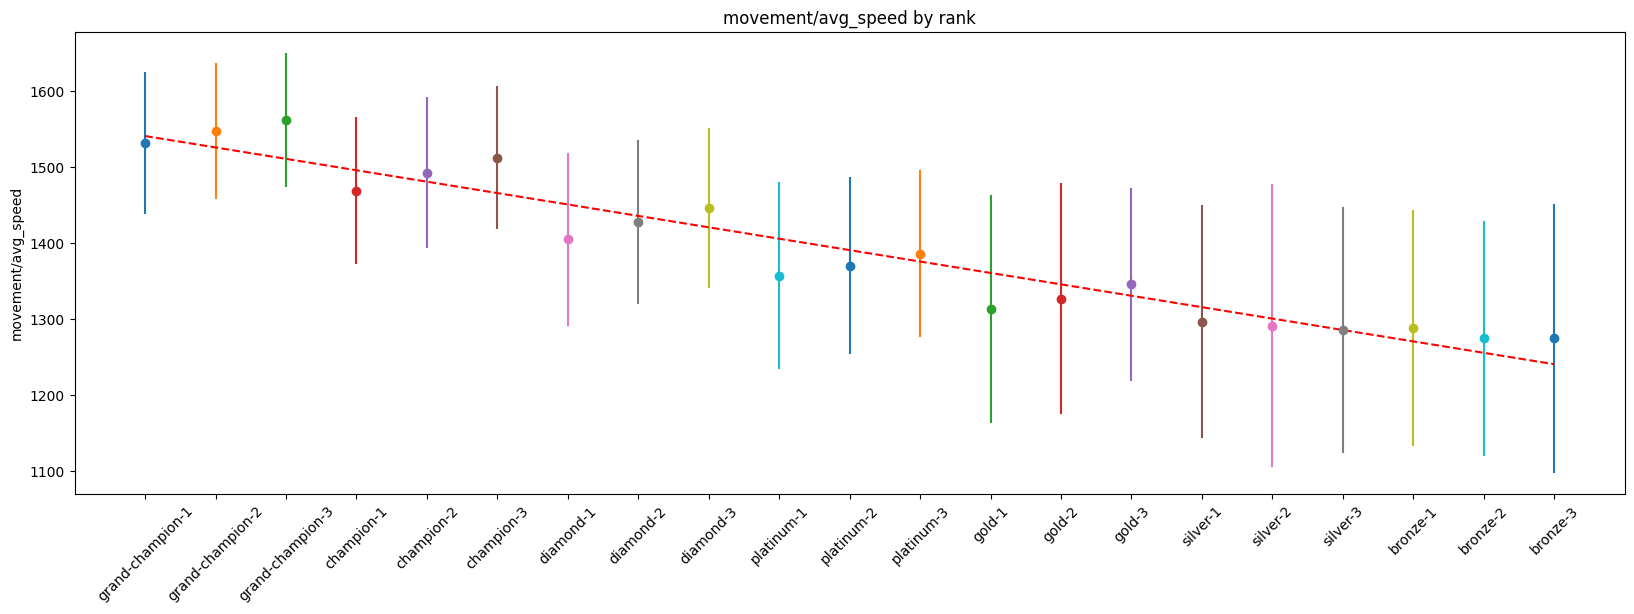

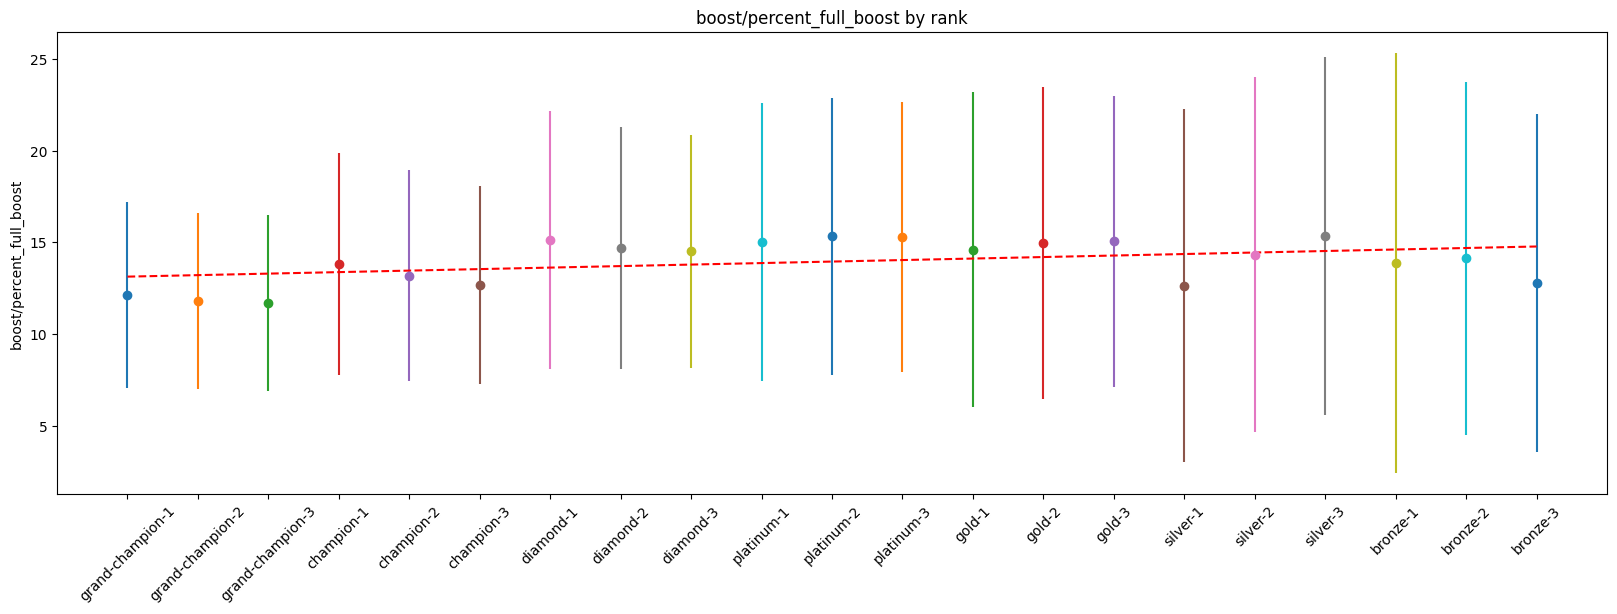

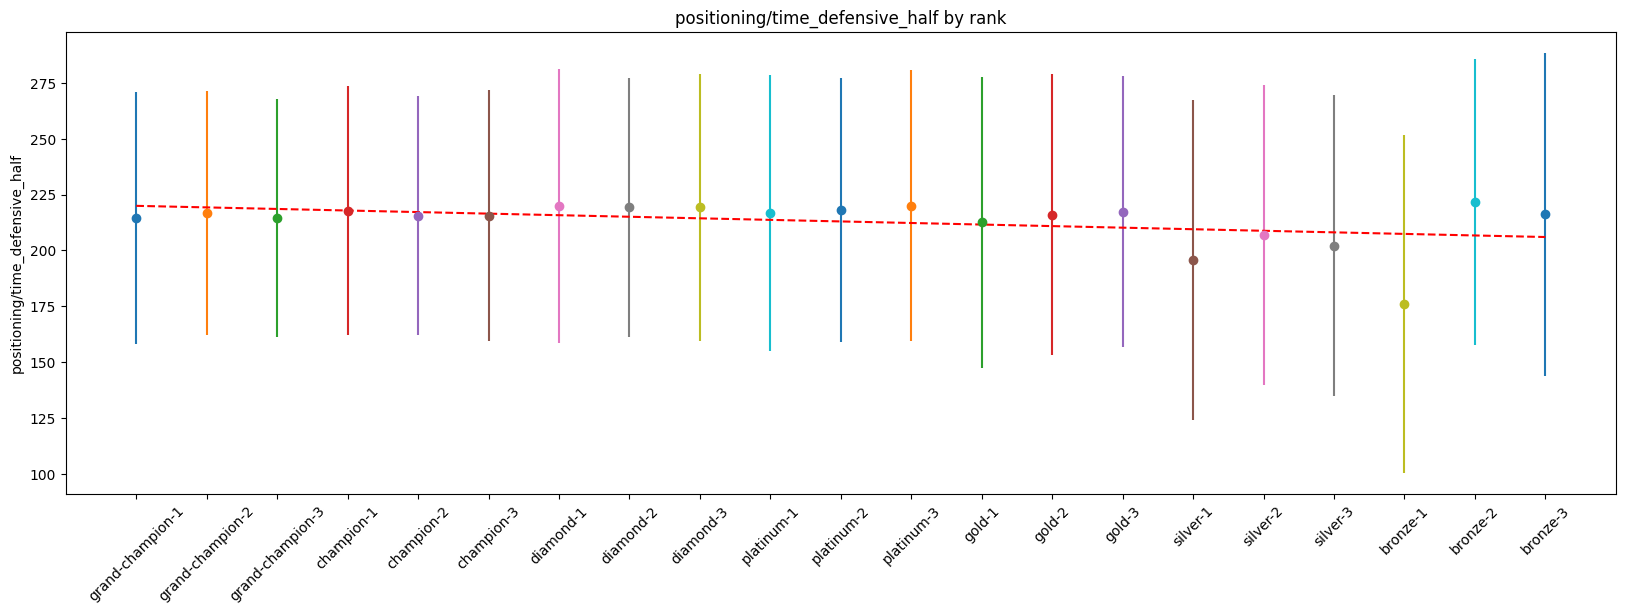

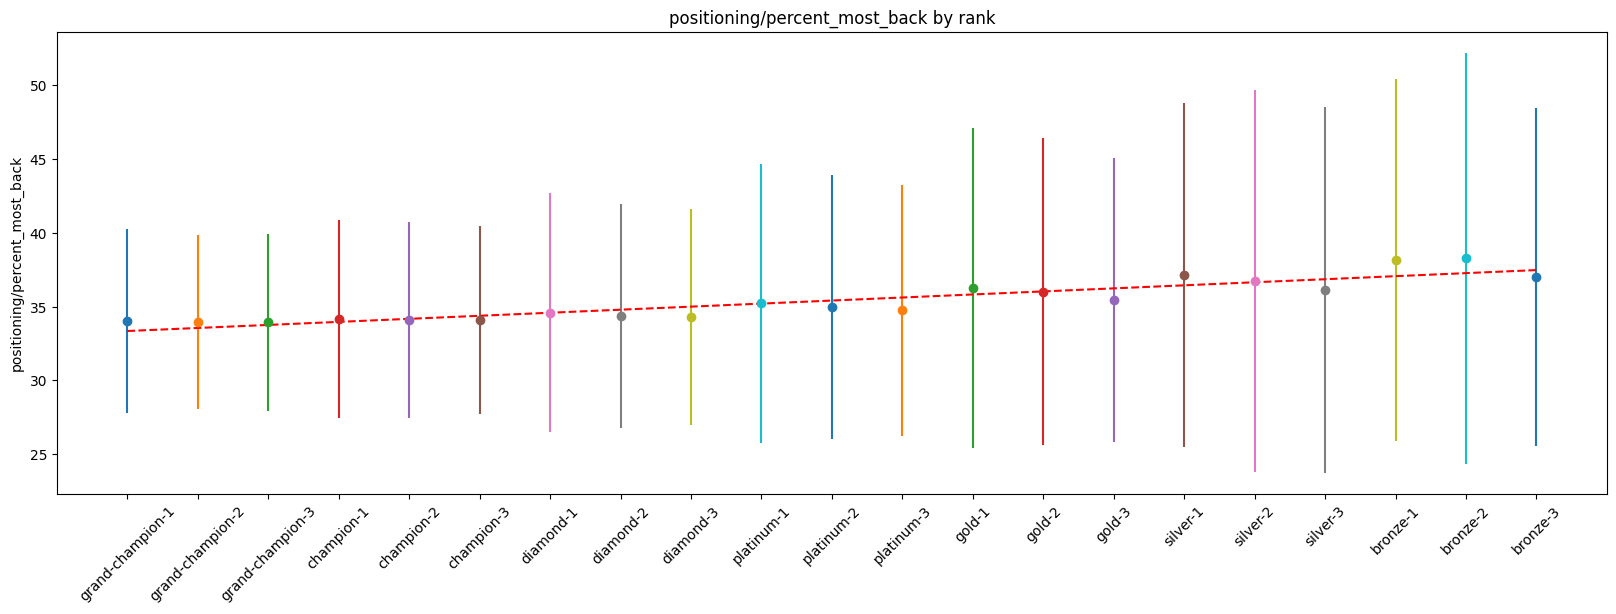

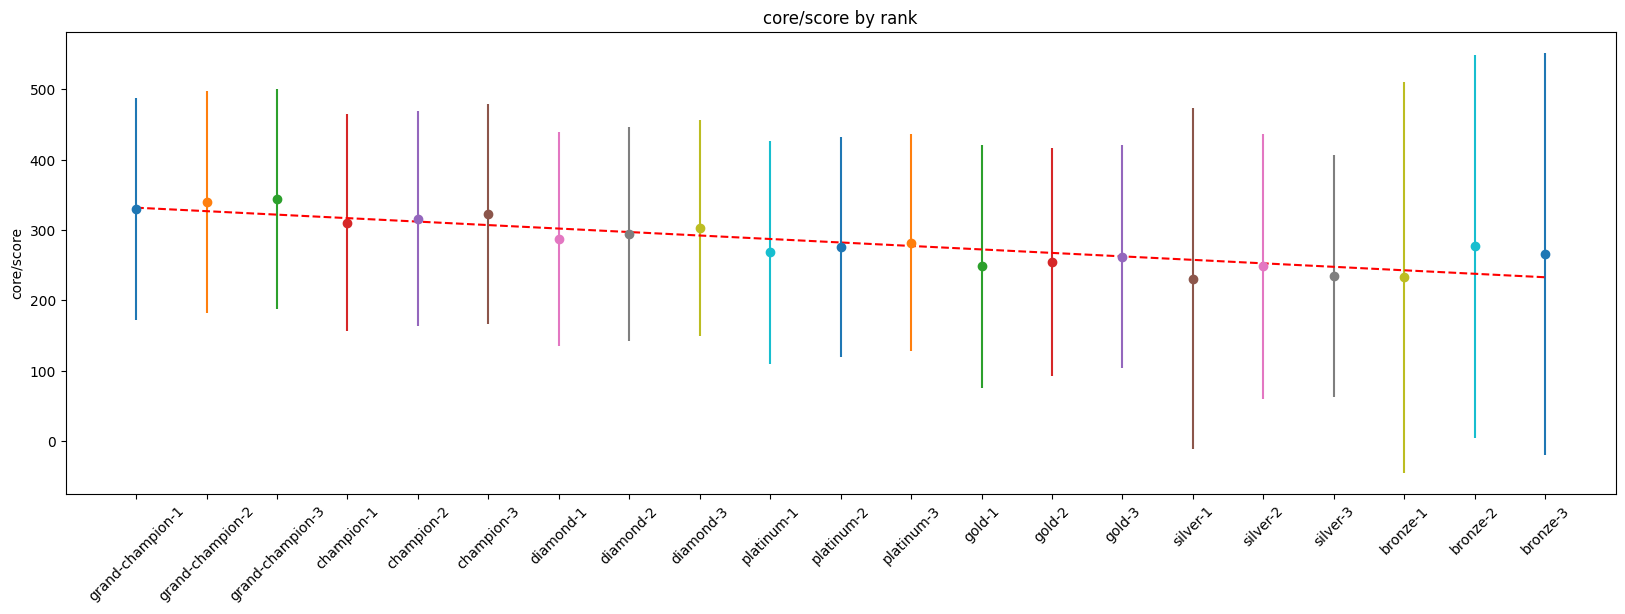

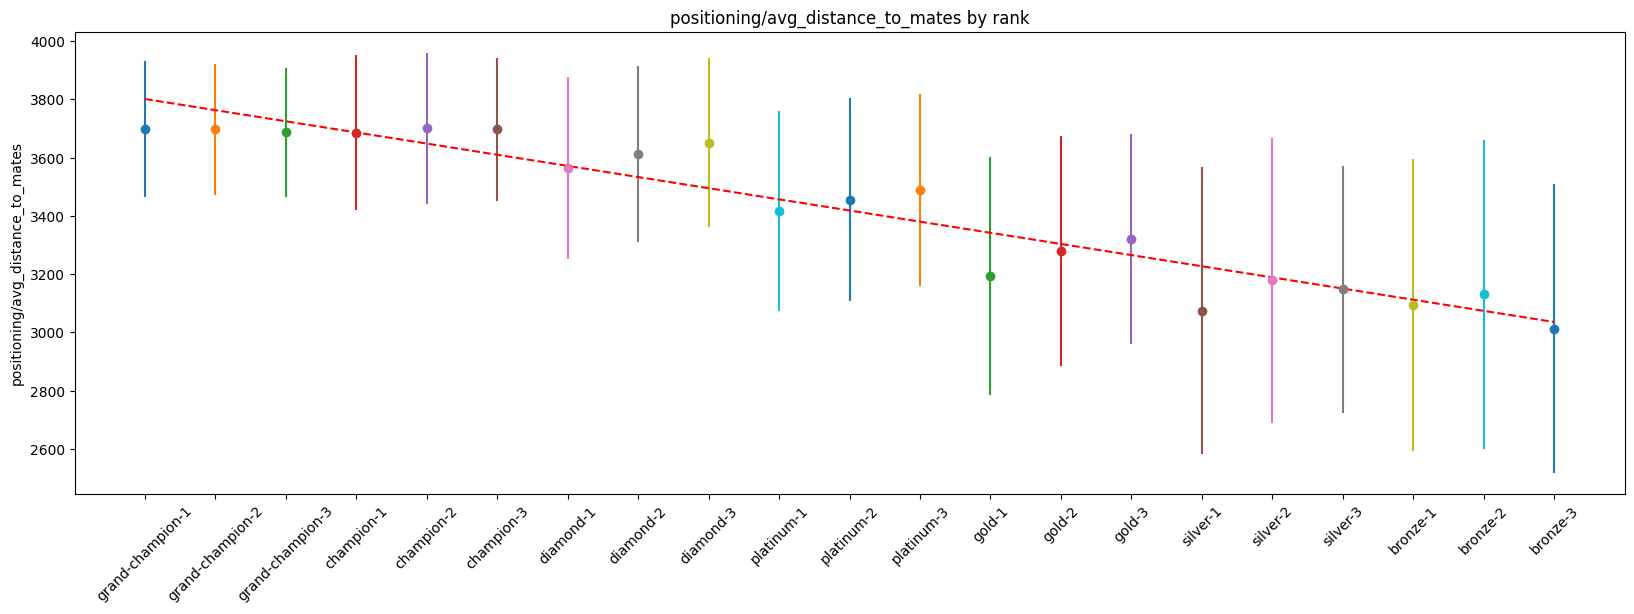

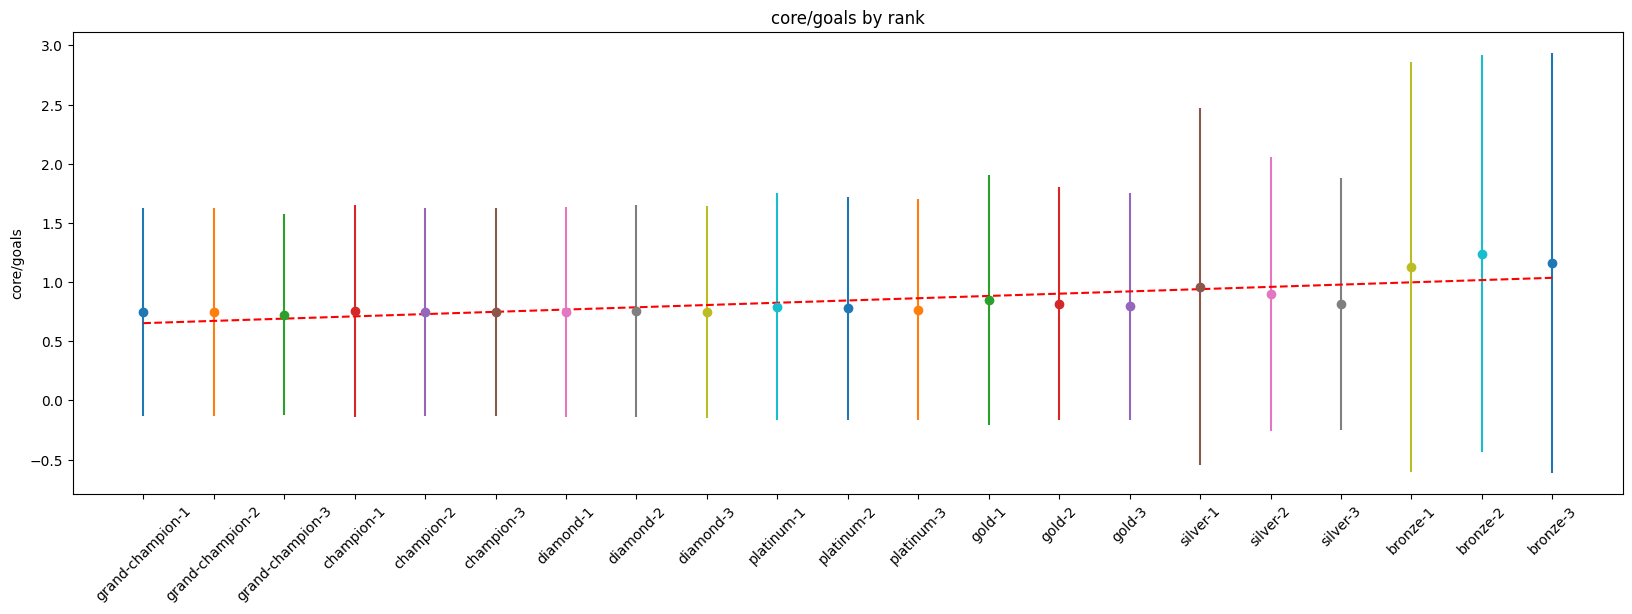

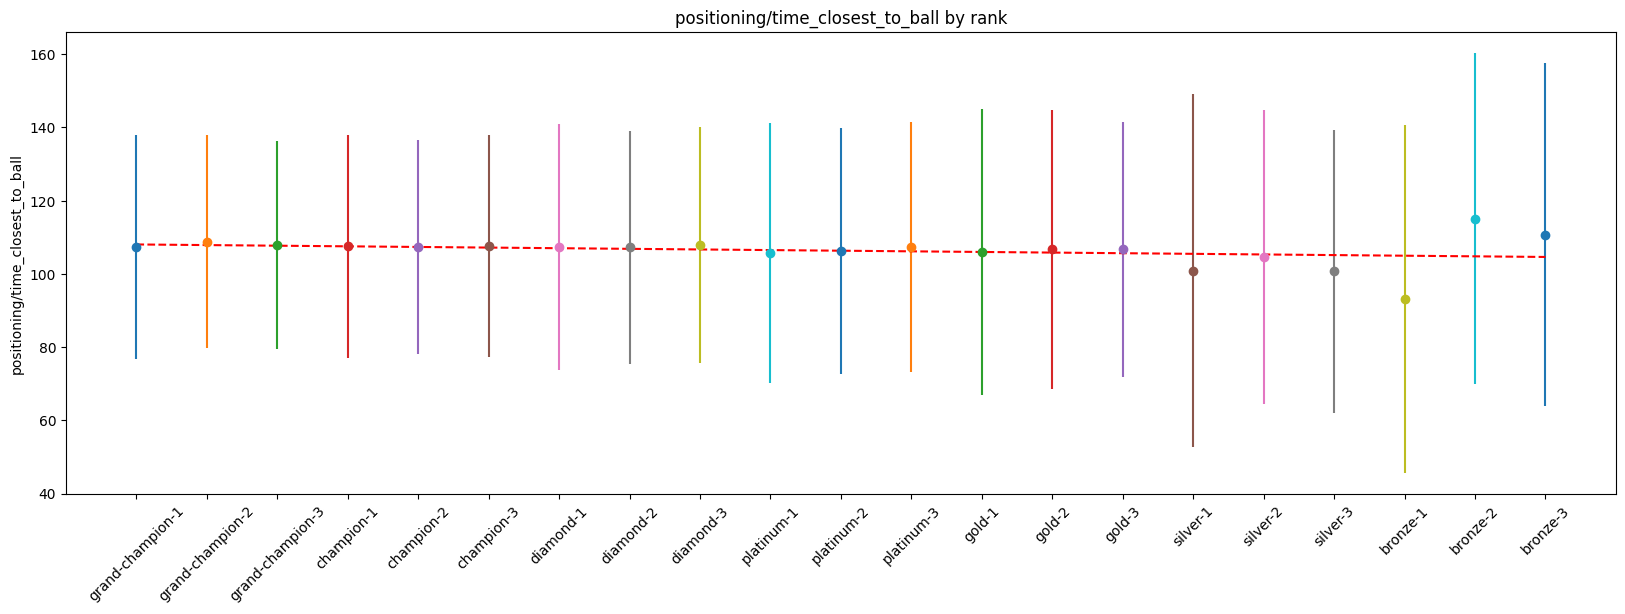

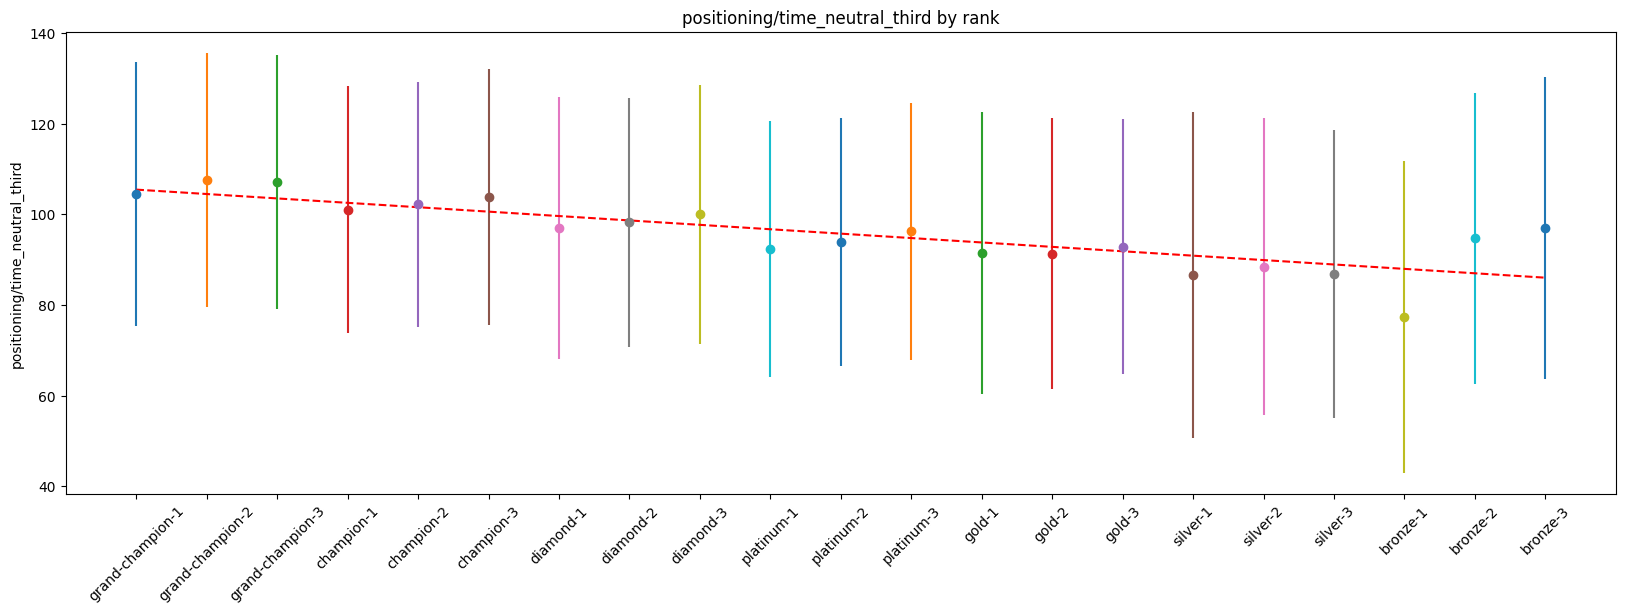

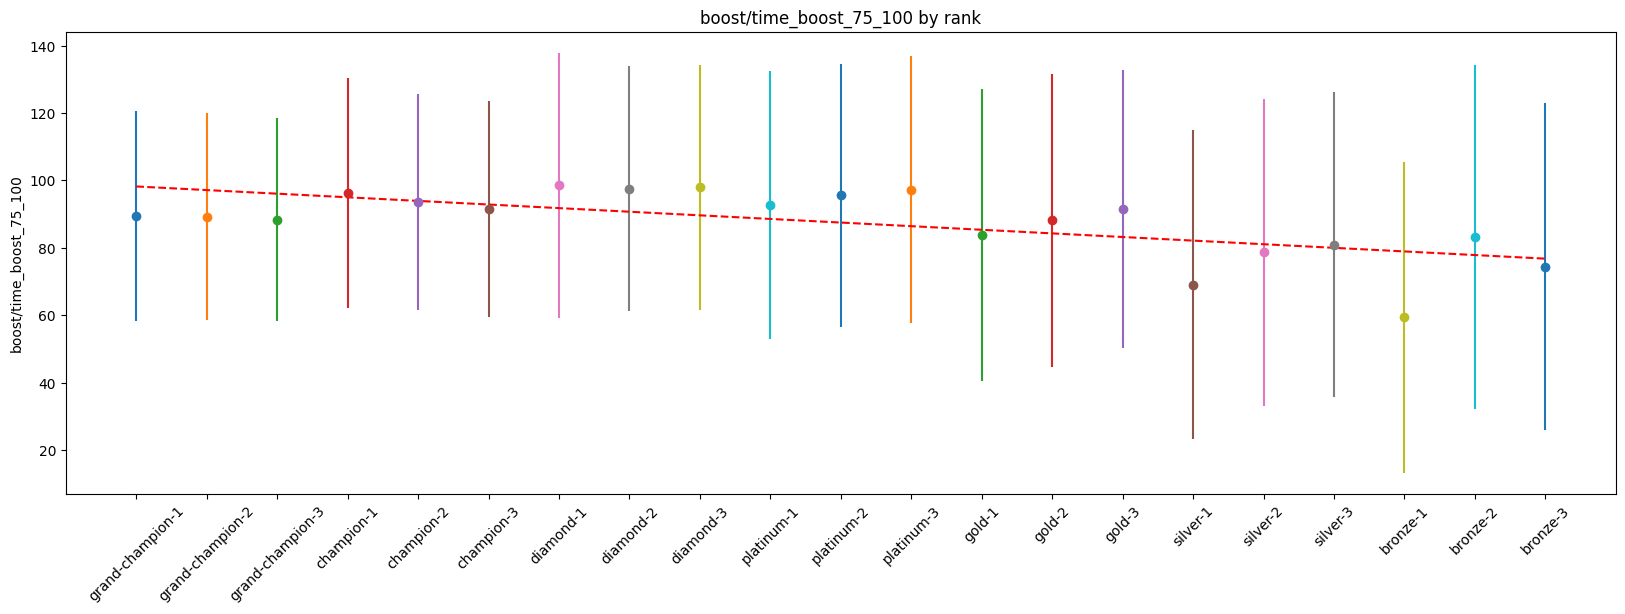

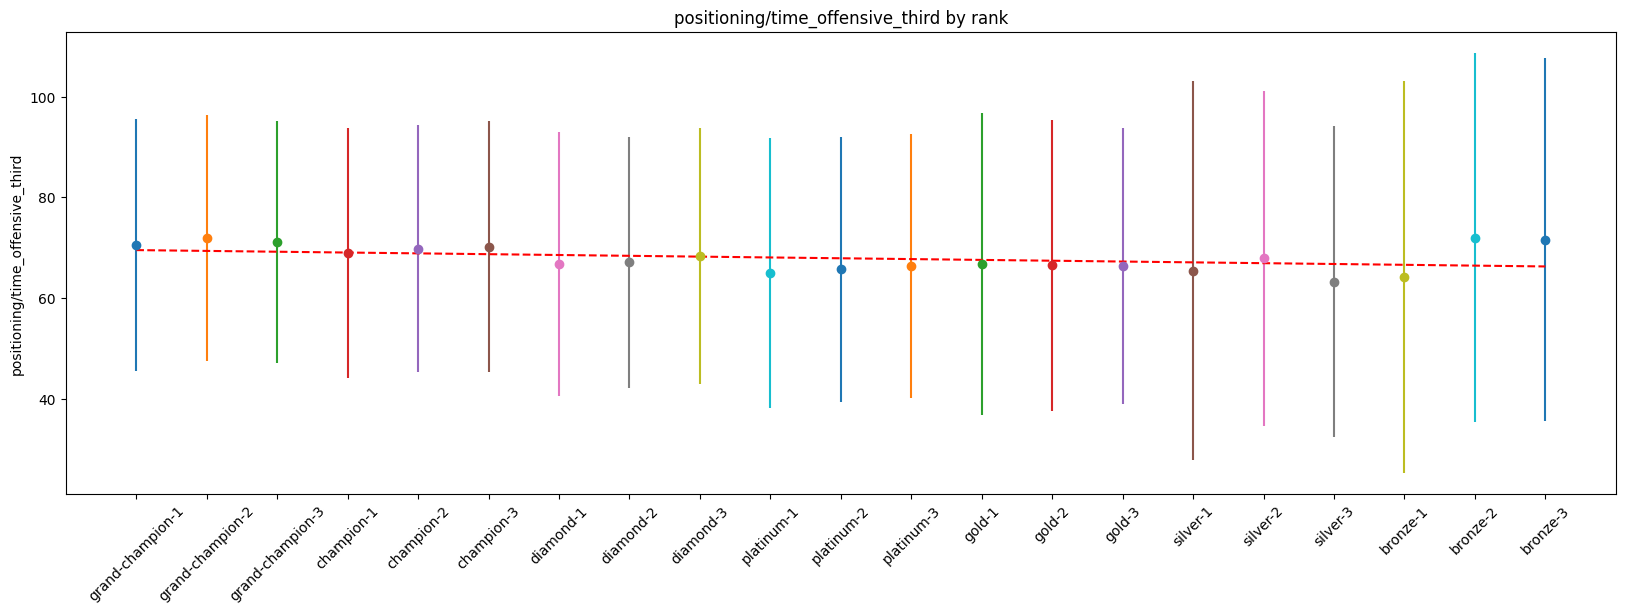

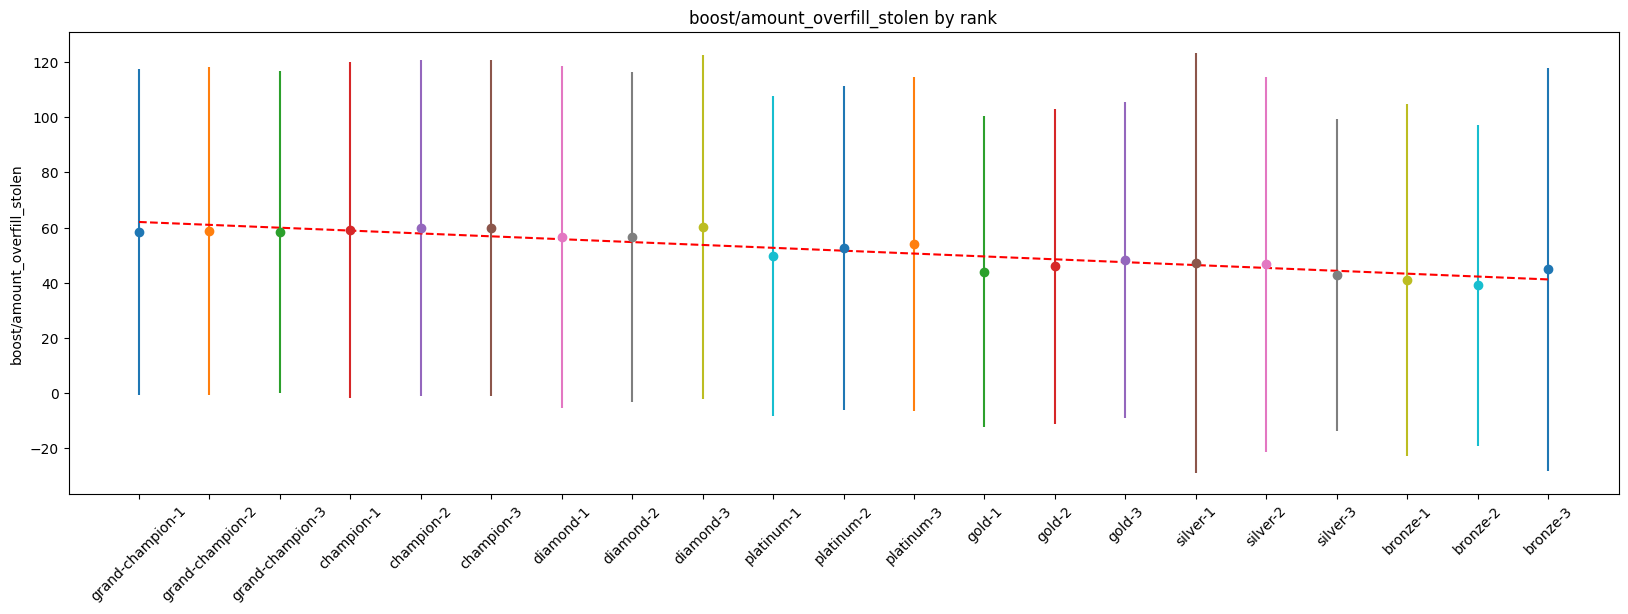

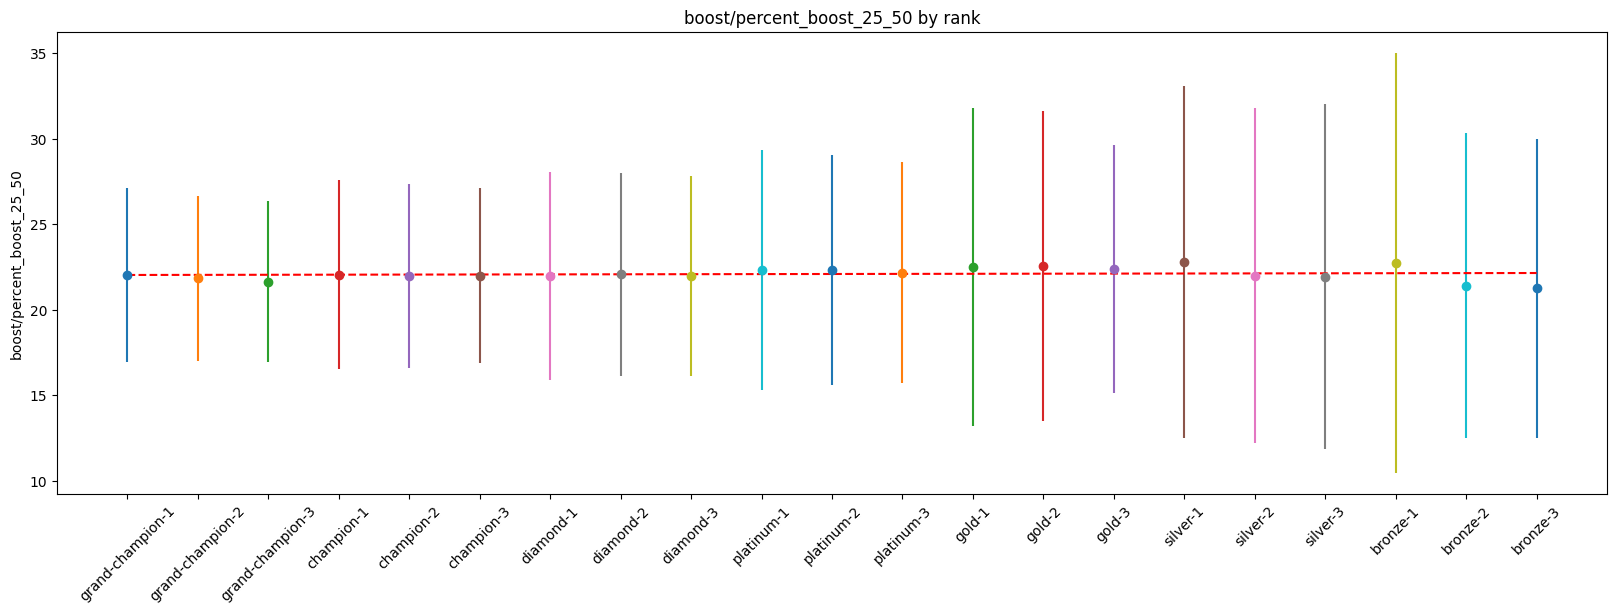

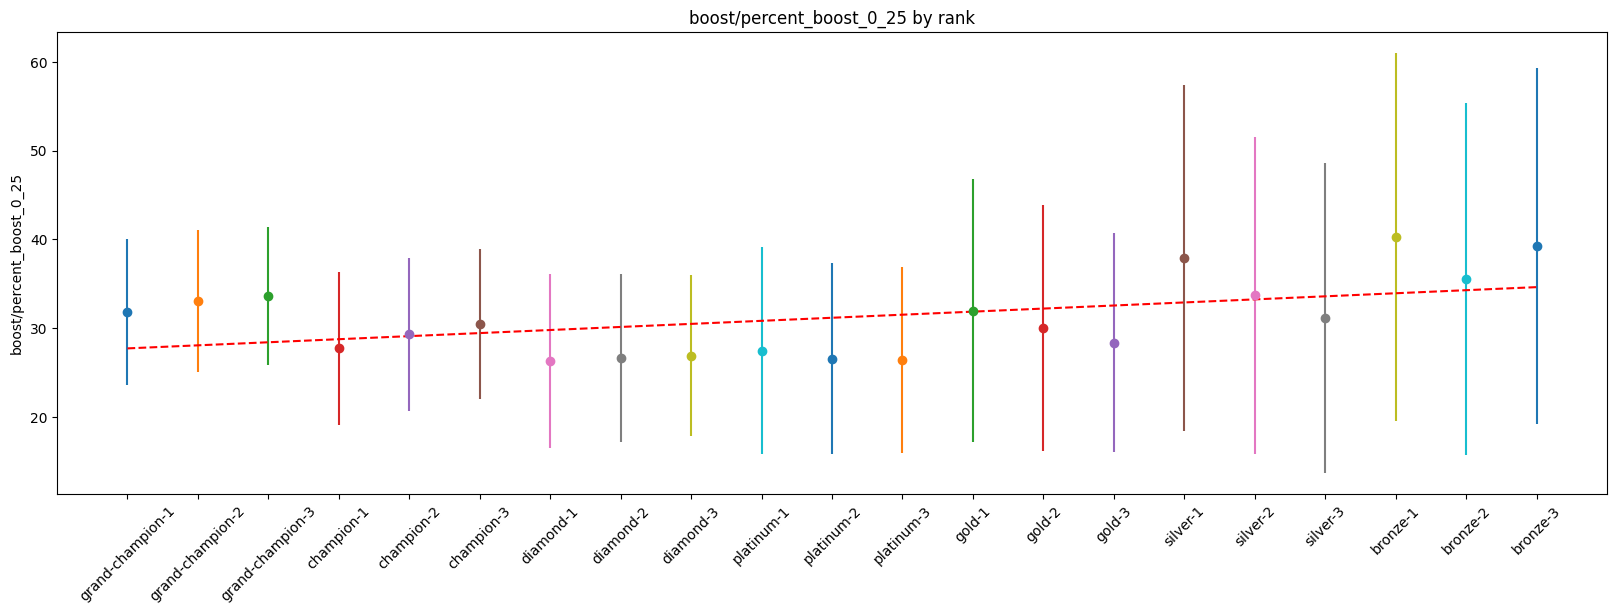

In [33]:
stat_keys = list(rank_data["bronze-1"].keys())

rank_names = [
    "grand-champion",
    "champion",
    "diamond",
    "platinum",
    "gold",
    "silver",
    "bronze",
]

rank_divs = [str(i) for i in range(1, 4)]

rank_order = [f"{name}-{div}" for name in rank_names for div in rank_divs]

# plot the mean and std of the ranks
for stat in stat_keys:
    fig, ax = plt.subplots()

    # mean & std
    rank_means = []
    for key in rank_order:
        data = rank_data[key]
        mean = data[stat].mean()
        rank_means.append(mean)
        std = data[stat].std()
        ax.errorbar(key, mean, yerr=std, fmt="o", label=key)
    
    # line of best fit
    x = np.arange(len(rank_order))
    y = np.array(rank_means)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), "r--", label=f"y={z[0]:.2f}x+{z[1]:.2f}")
    
    ax.set_ylabel(stat)
    ax.set_title(f"{stat} by rank")
    fig.set_size_inches(20, 6)
    plt.xticks(rotation=45)

    plt.show()

